# Stock Market Prediction

In this notebook, I will create a machine learning algorithm to predict the stock price and make a trading recommendation for the user. 

For the following stocks, I will create a trained algorithm:
- Blue chip stocks: Blue chip stocks are shares of large, established companies with stable financial performance and low risk.
    - BMW (BMW.DE)
- Growth stocks: growth stocks are stocks of companies with high potential for future growth. These stocks often carry higher risks, but also offer higher potential returns
    - Tesla, Inc. (TSLA)
    - Bitcoin (BTC-USD)
- Dividend stocks: dividend stocks are stocks of companies that pay regular dividends to their shareholders. These stocks often carry lower risks and offer a regular source of income. 
    - Johnson & Johnson (JNJ)
- Small-cap stocks: small-cap stocks are stocks of small companies with higher risk and higher potential for growth and return.
     - Etsy, Inc (ETSY)
     
The following algorithms will be tested on their performance:
- Non-Linear regression (Simple)
- Random Forest (intermediate)
- LSTM (advanced)

The goal is to create an algorithm which can predict the stock prices with a tolerance of ± 5%.
Also, I want to show how the different stock categories influence the accuracy of the algorithm. 

## Table Of Contents 

#### 1. [Exploratory Data Analysis](#eda)  
#### 2. [Feature Engineering](#fe)
#### 3. [Modelling And Validation](#mav)
#### 4. [Final Model](#fm)

In [46]:
# import libraries
import numpy as np
import sklearn
import pandas as pd
import yfinance as yf
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

## <a class="anchor" id="eda"> 1. Exploratory Data Analysis </a>

Before I start with the loading of the stocks, I will define a range of the data. This is necessary to have a period of time there the course is similar.

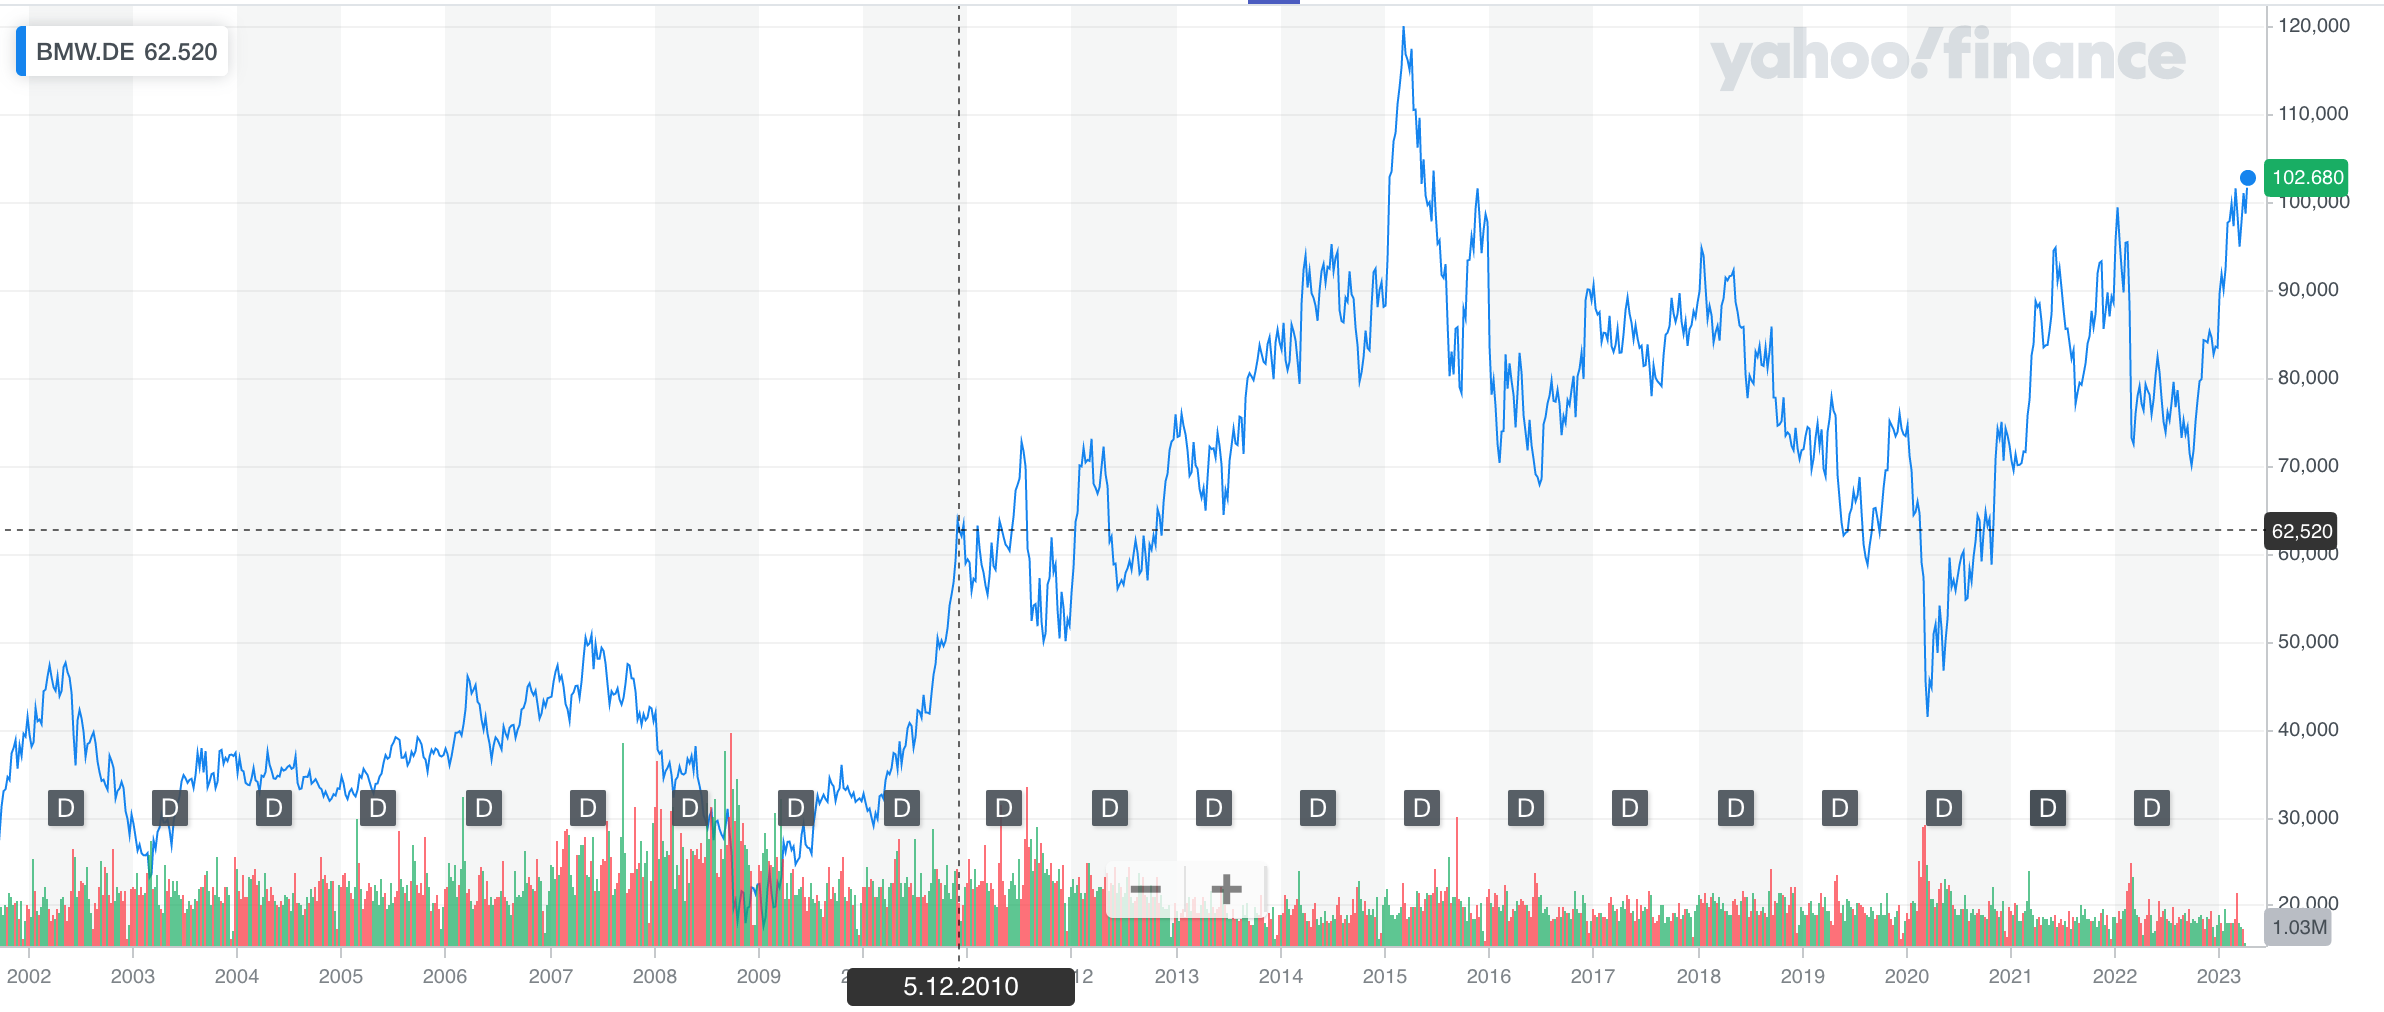

In [11]:
# BMW.DE
Image(filename='/Users/maximkiesel/PycharmProjects/Stock_Market_Prediction/Data/BMW.DE.png')

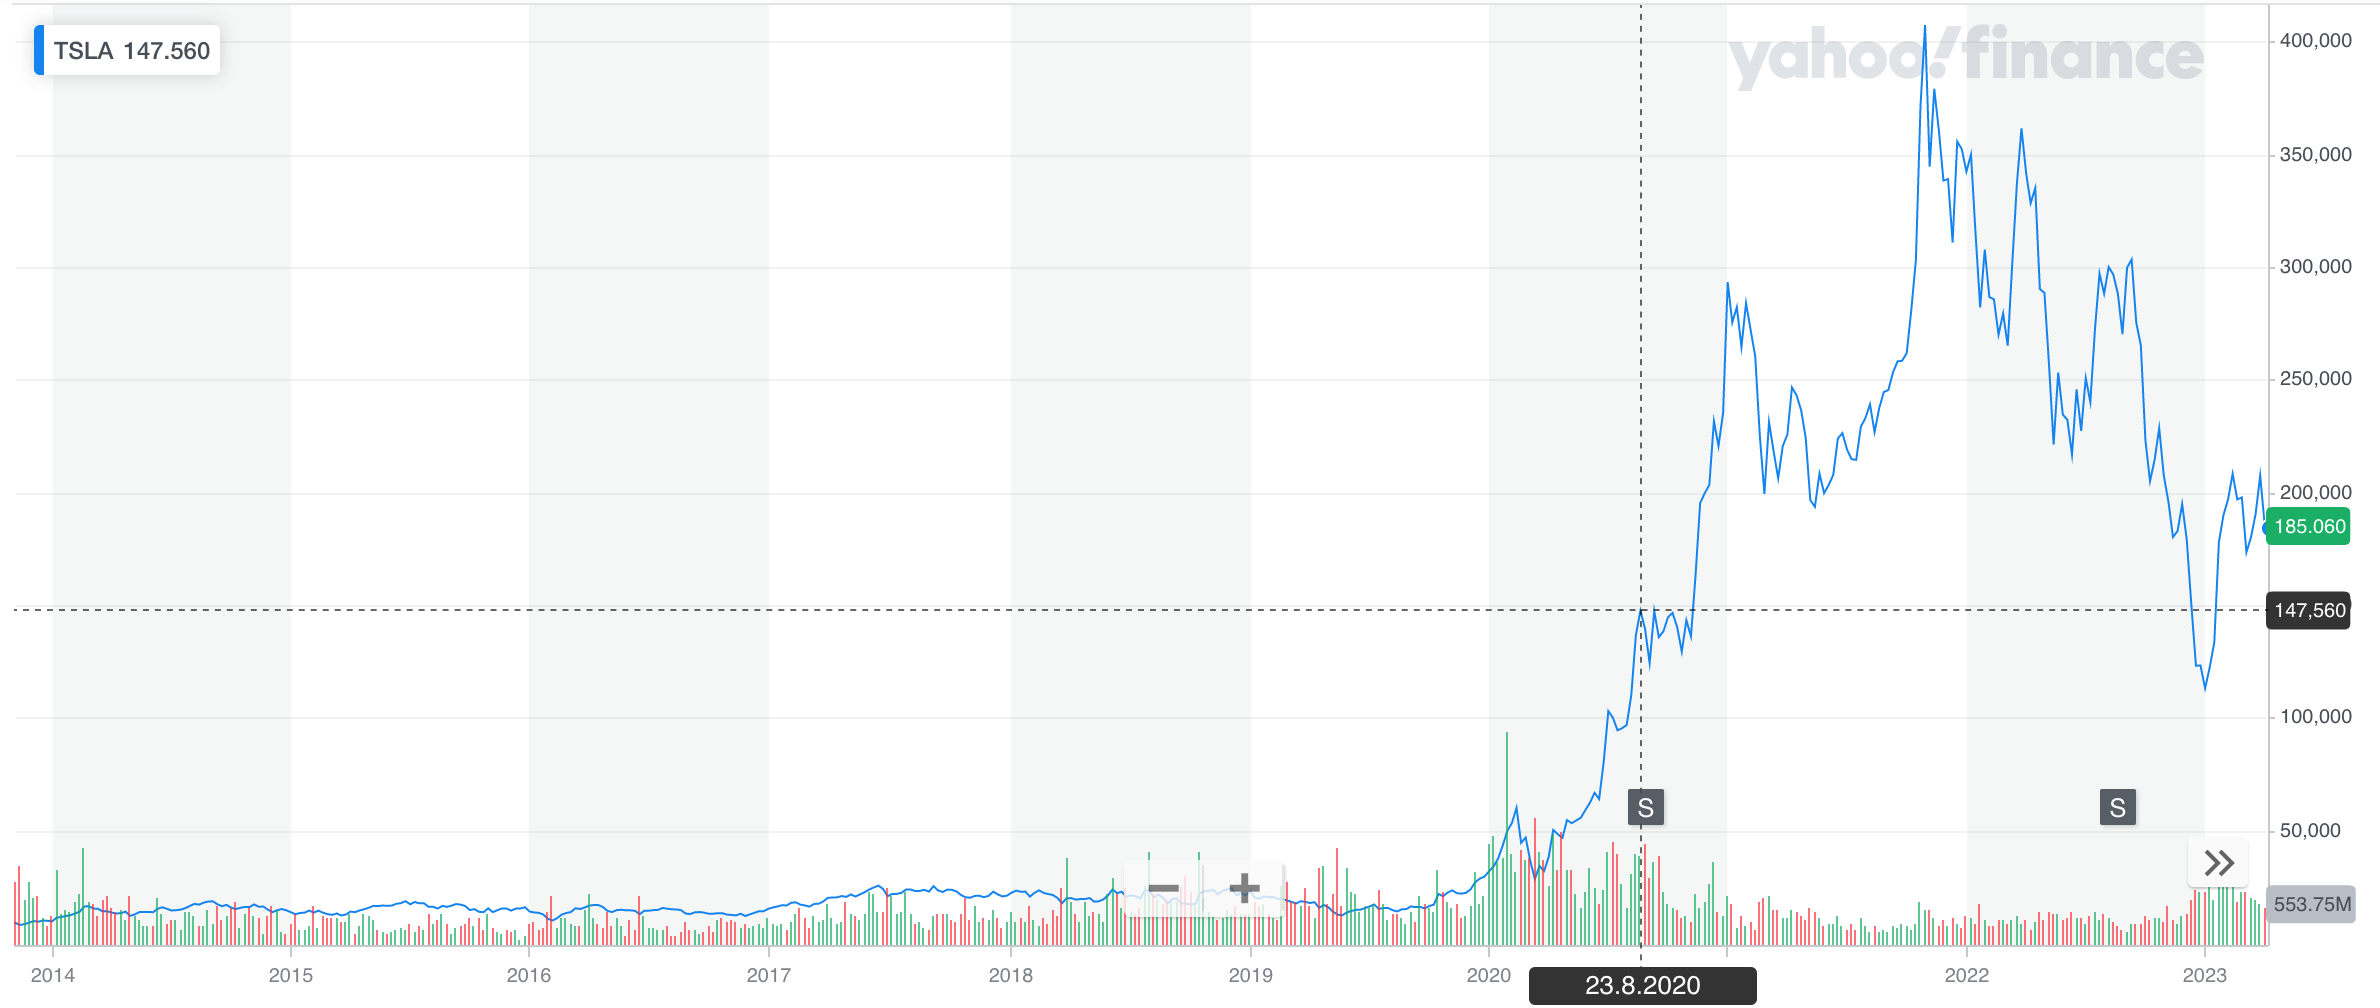

In [12]:
# TSLA
Image(filename='/Users/maximkiesel/PycharmProjects/Stock_Market_Prediction/Data/TSLA.png')

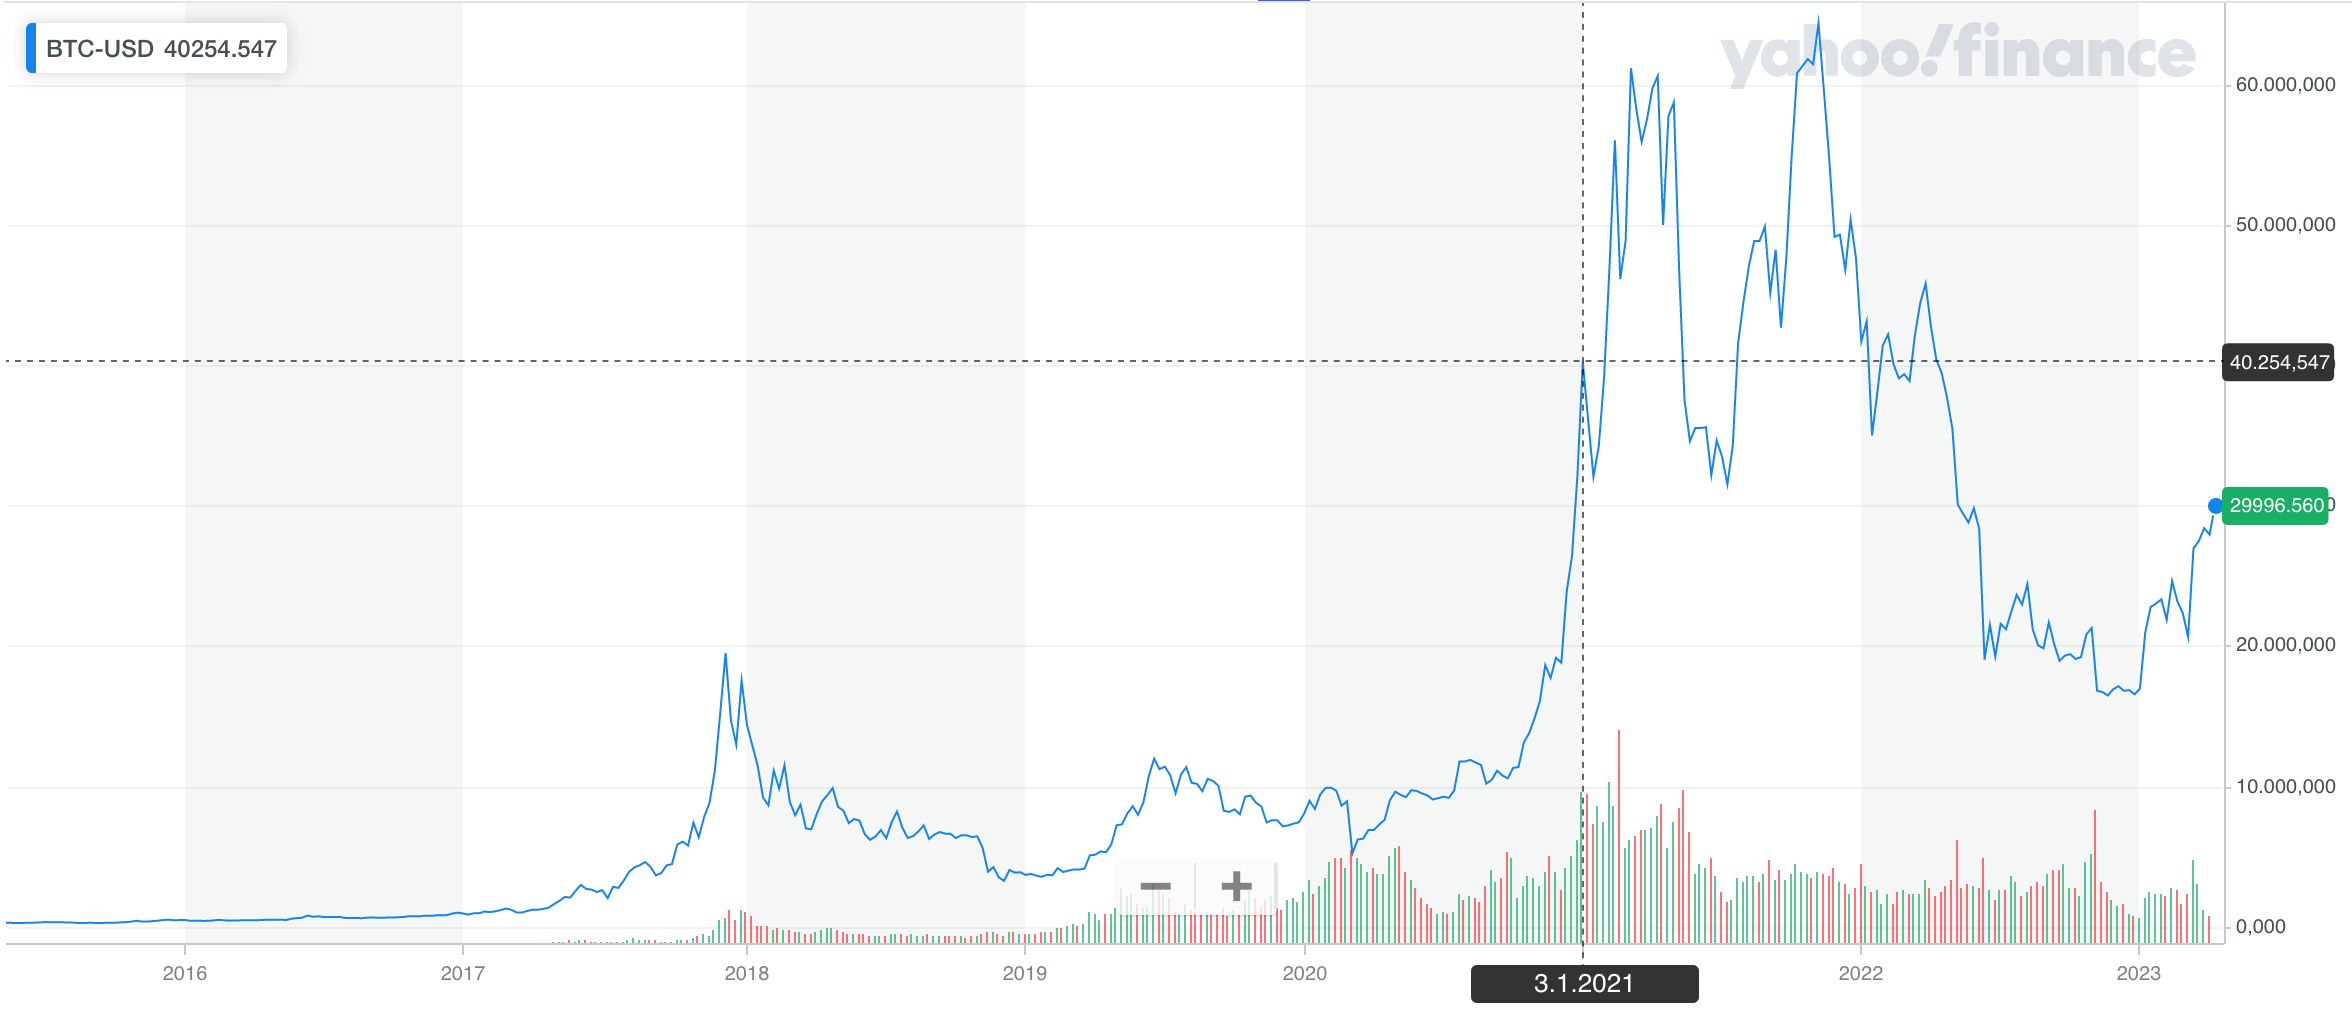

In [13]:
# BTC-USD
Image(filename='/Users/maximkiesel/PycharmProjects/Stock_Market_Prediction/Data/BTC-USD.png')

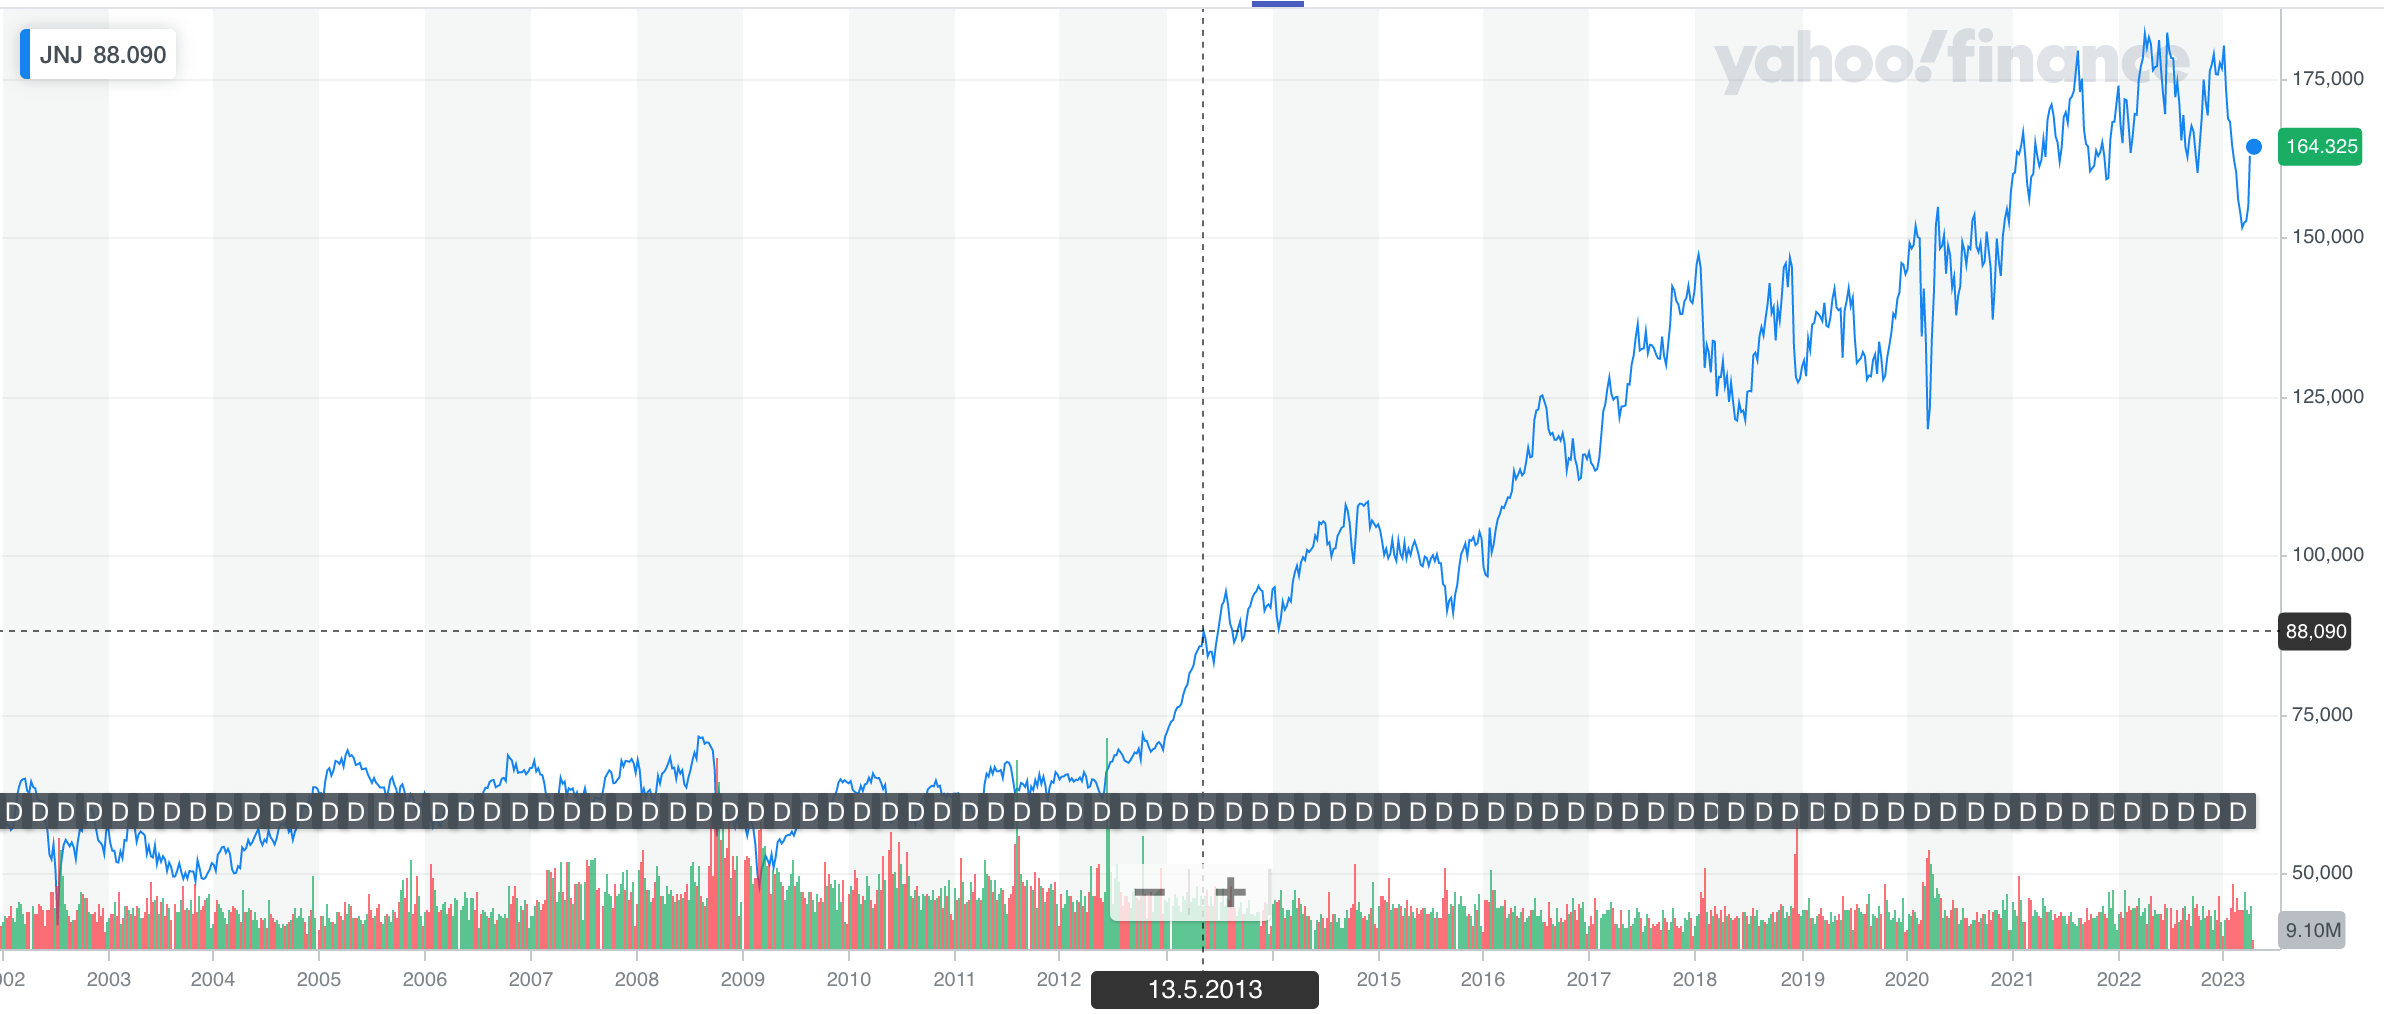

In [14]:
# JNJ
Image(filename='/Users/maximkiesel/PycharmProjects/Stock_Market_Prediction/Data/JNJ.png')

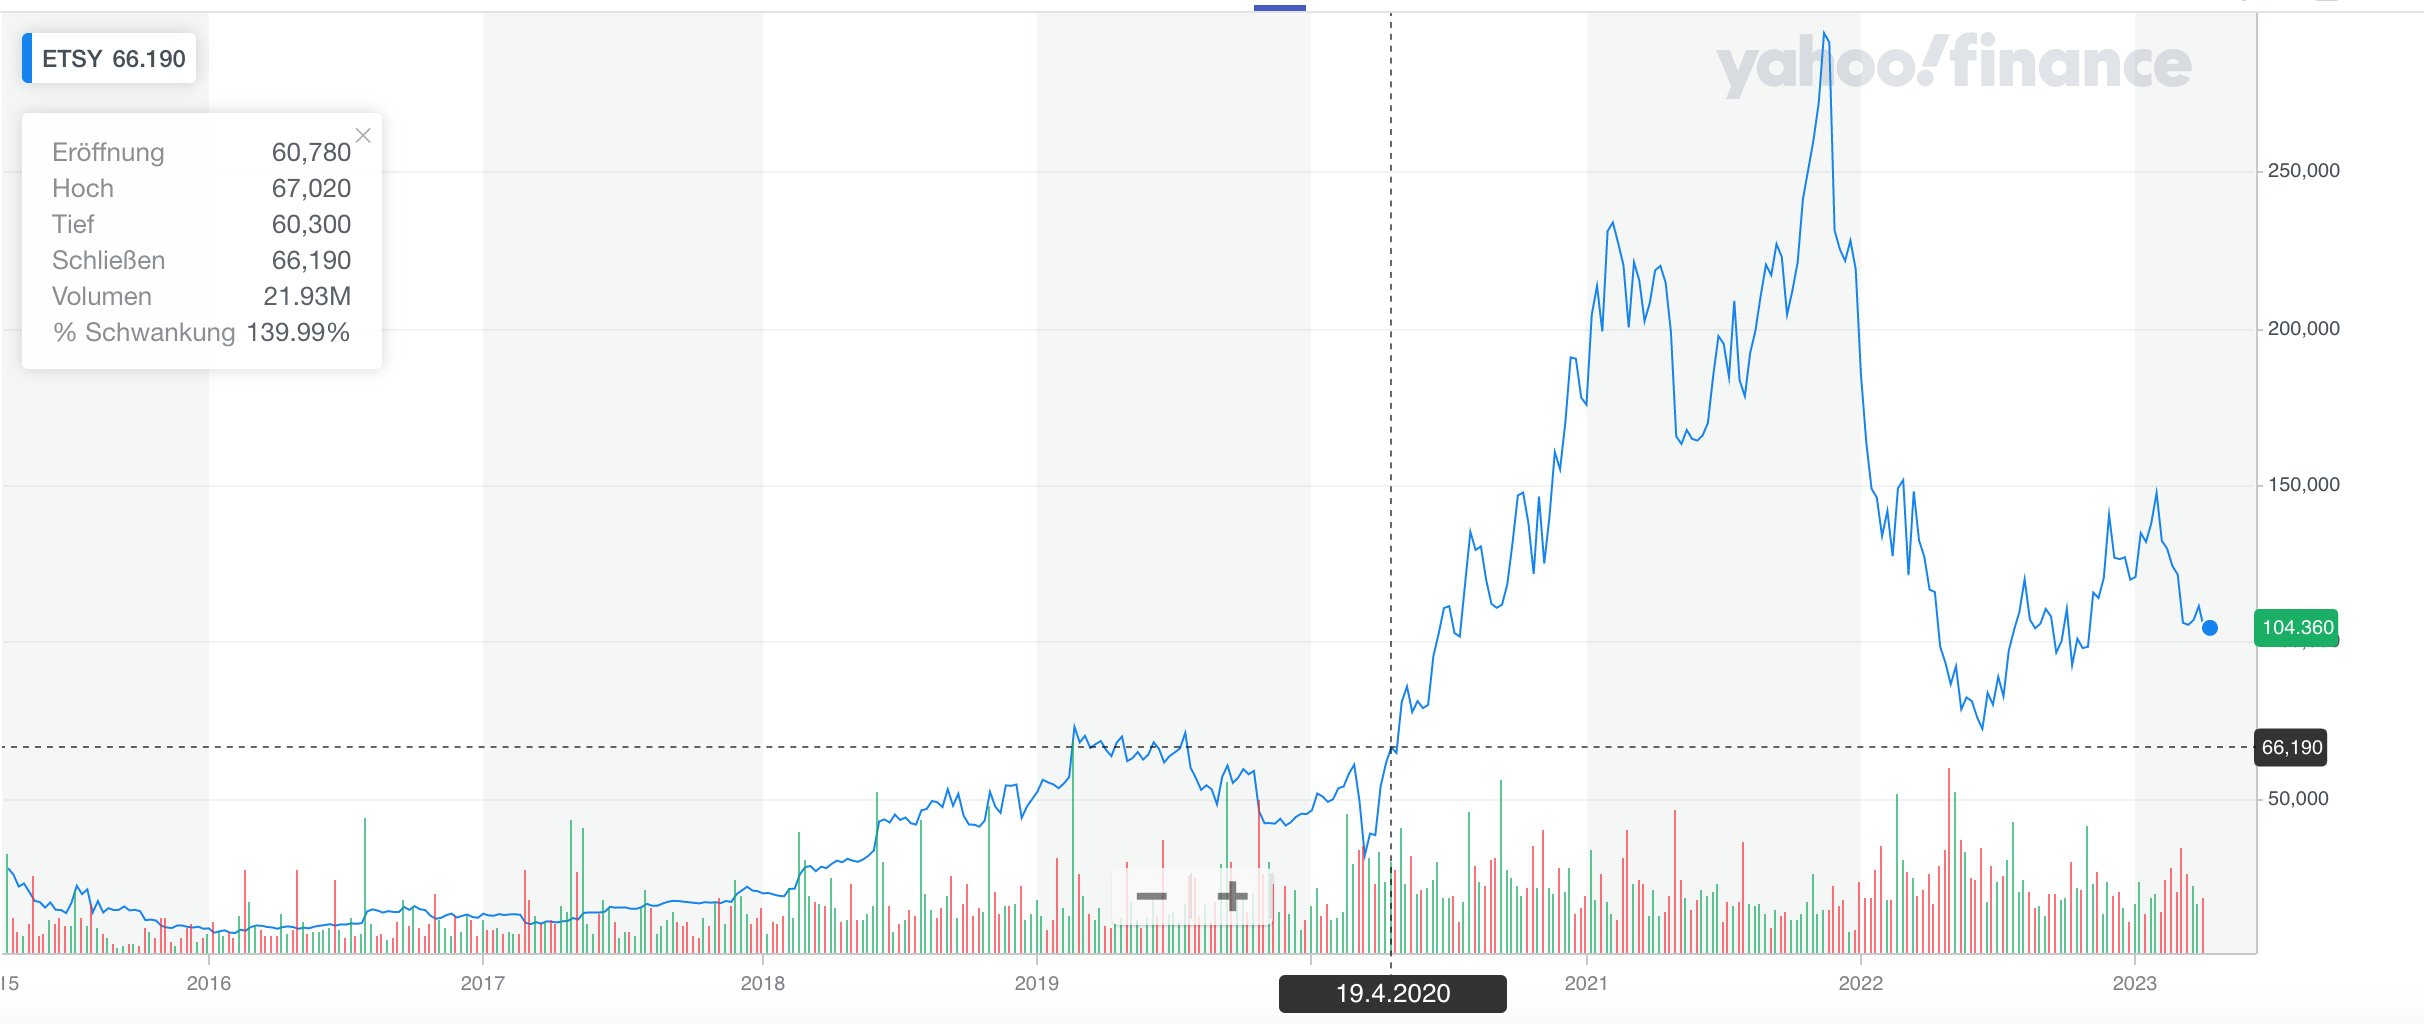

In [15]:
# ETSY
Image(filename='/Users/maximkiesel/PycharmProjects/Stock_Market_Prediction/Data/ETSY.png')

We see, that the course is quite different before the marked time. To improve the prediction, I choose the latest period of time to get a similar course of the stock price. 

In [17]:
# download the data from Yahoo Finance API

# create list with stock names
list_stocks = ['BMW.DE', 'TSLA', 'BTC-USD', 'JNJ', 'ETSY']

# create list with start dates 
list_start_date = ['2010-12-05', '2020-08-23', '2021-01-03', '2013-05-13', '2020-04-19']

end_date = "2023-04-12"

# load the data
df_bmw = yf.download(list_stocks[0], start=list_start_date[0], end=end_date)
df_tsla = yf.download(list_stocks[1], start=list_start_date[1], end=end_date)
df_btc = yf.download(list_stocks[2], start=list_start_date[2], end=end_date)
df_jnj = yf.download(list_stocks[3], start=list_start_date[3], end=end_date)
df_etsy = yf.download(list_stocks[4], start=list_start_date[4], end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BMW.DE
Dataframe
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2010-12-06  64.000000  64.529999  62.750000  62.810001  38.073082  2530327
2010-12-07  63.000000  64.489998  62.400002  63.980000  38.782284  2748638
2010-12-08  63.500000  63.500000  61.900002  61.900002  37.521469  3157849
2010-12-09  62.419998  62.660000  58.880001  60.200001  36.490993  5442032
2010-12-10  60.500000  62.990002  60.389999  62.520000  37.897293  3097184

Number Rows & Columns
(3133, 6)

Statistic Values
              Open         High          Low        Close    Adj Close  \
count  3133.000000  3133.000000  3133.000000  3133.000000  3133.000000   
mean     77.115257    77.950860    76.181570    77.089769    59.208005   
std      13.351805    13.367648    13.291933    13.337046    14.452728   
min      38.939999    39.514999    36.595001    37.660000    27.874855   
25%      68.019997    68.800003    67

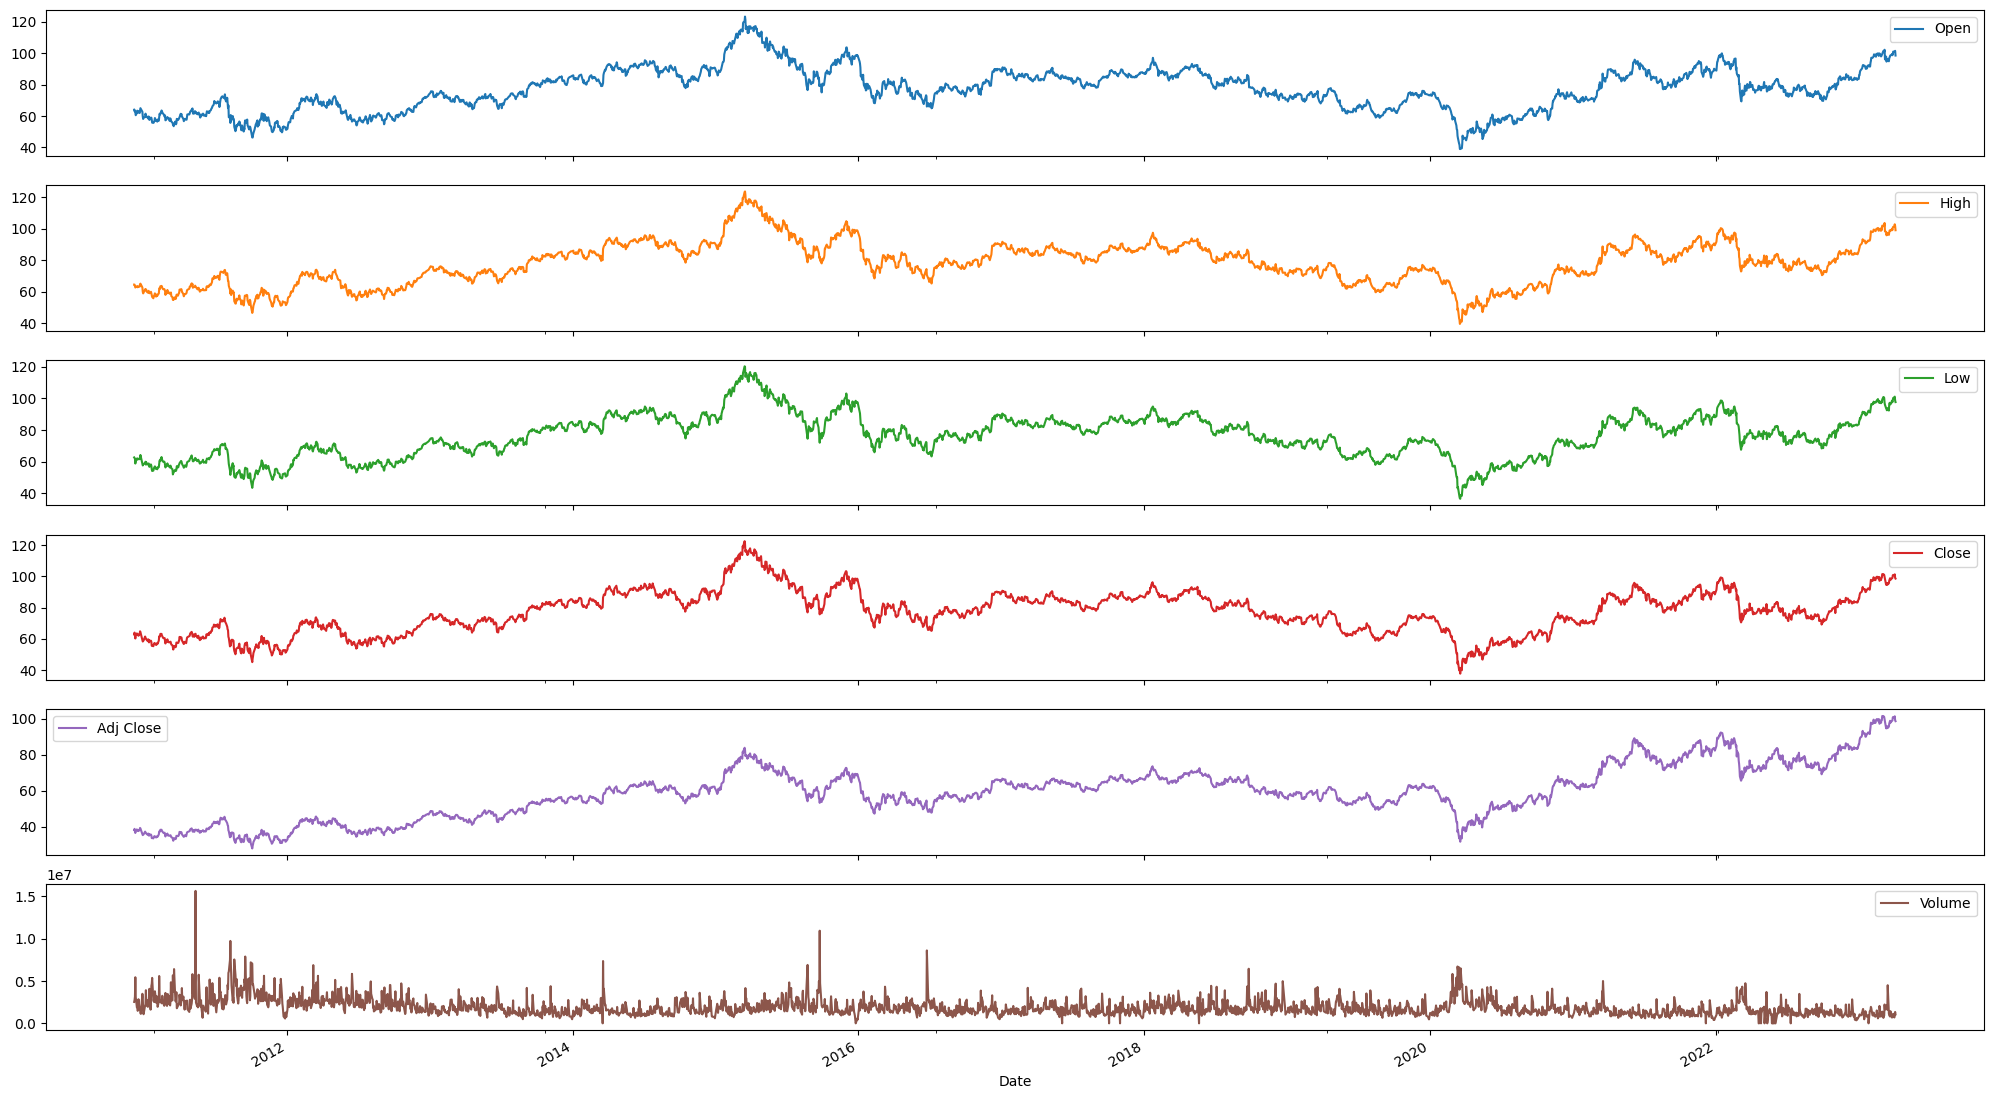


Rolling Mean


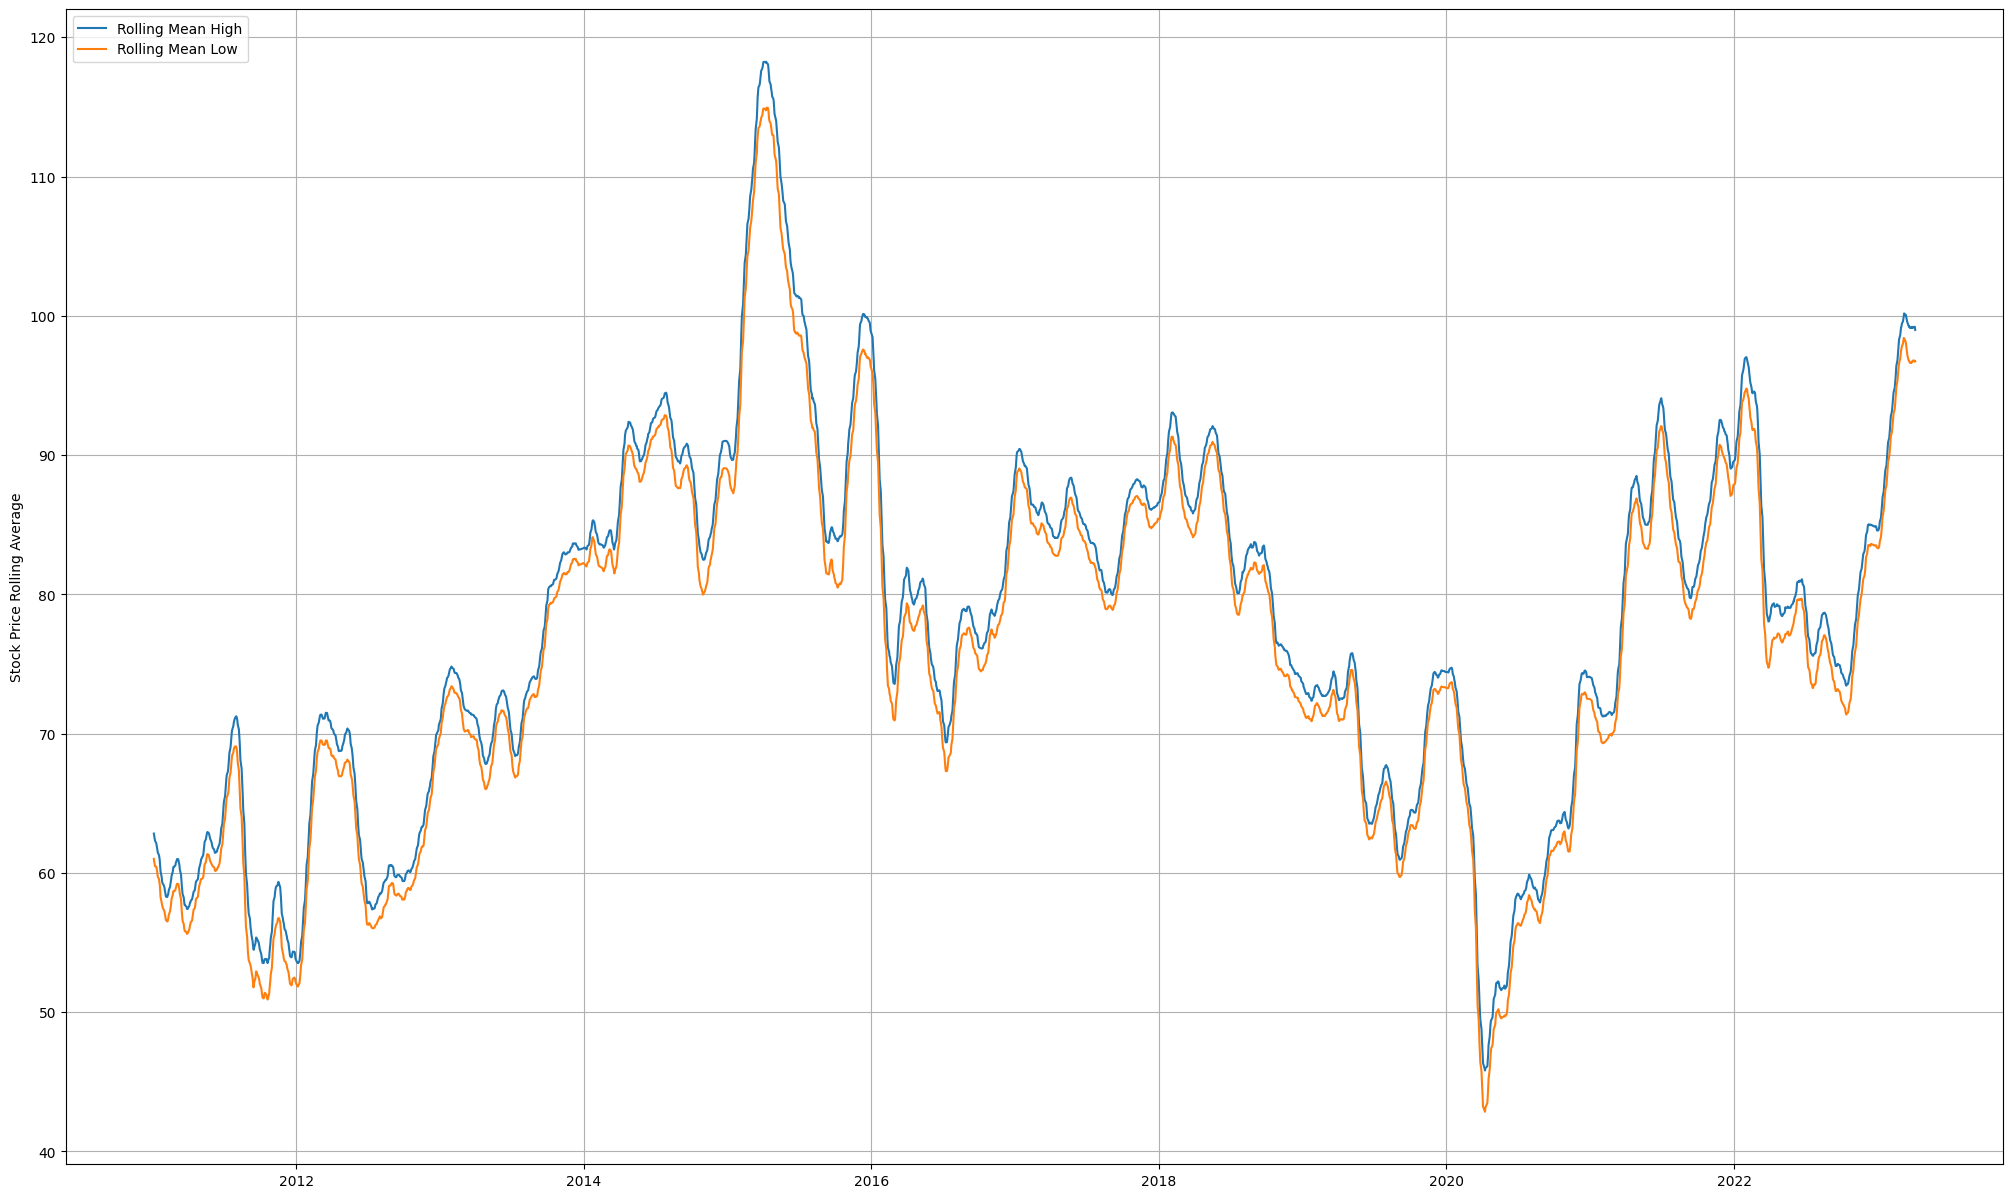

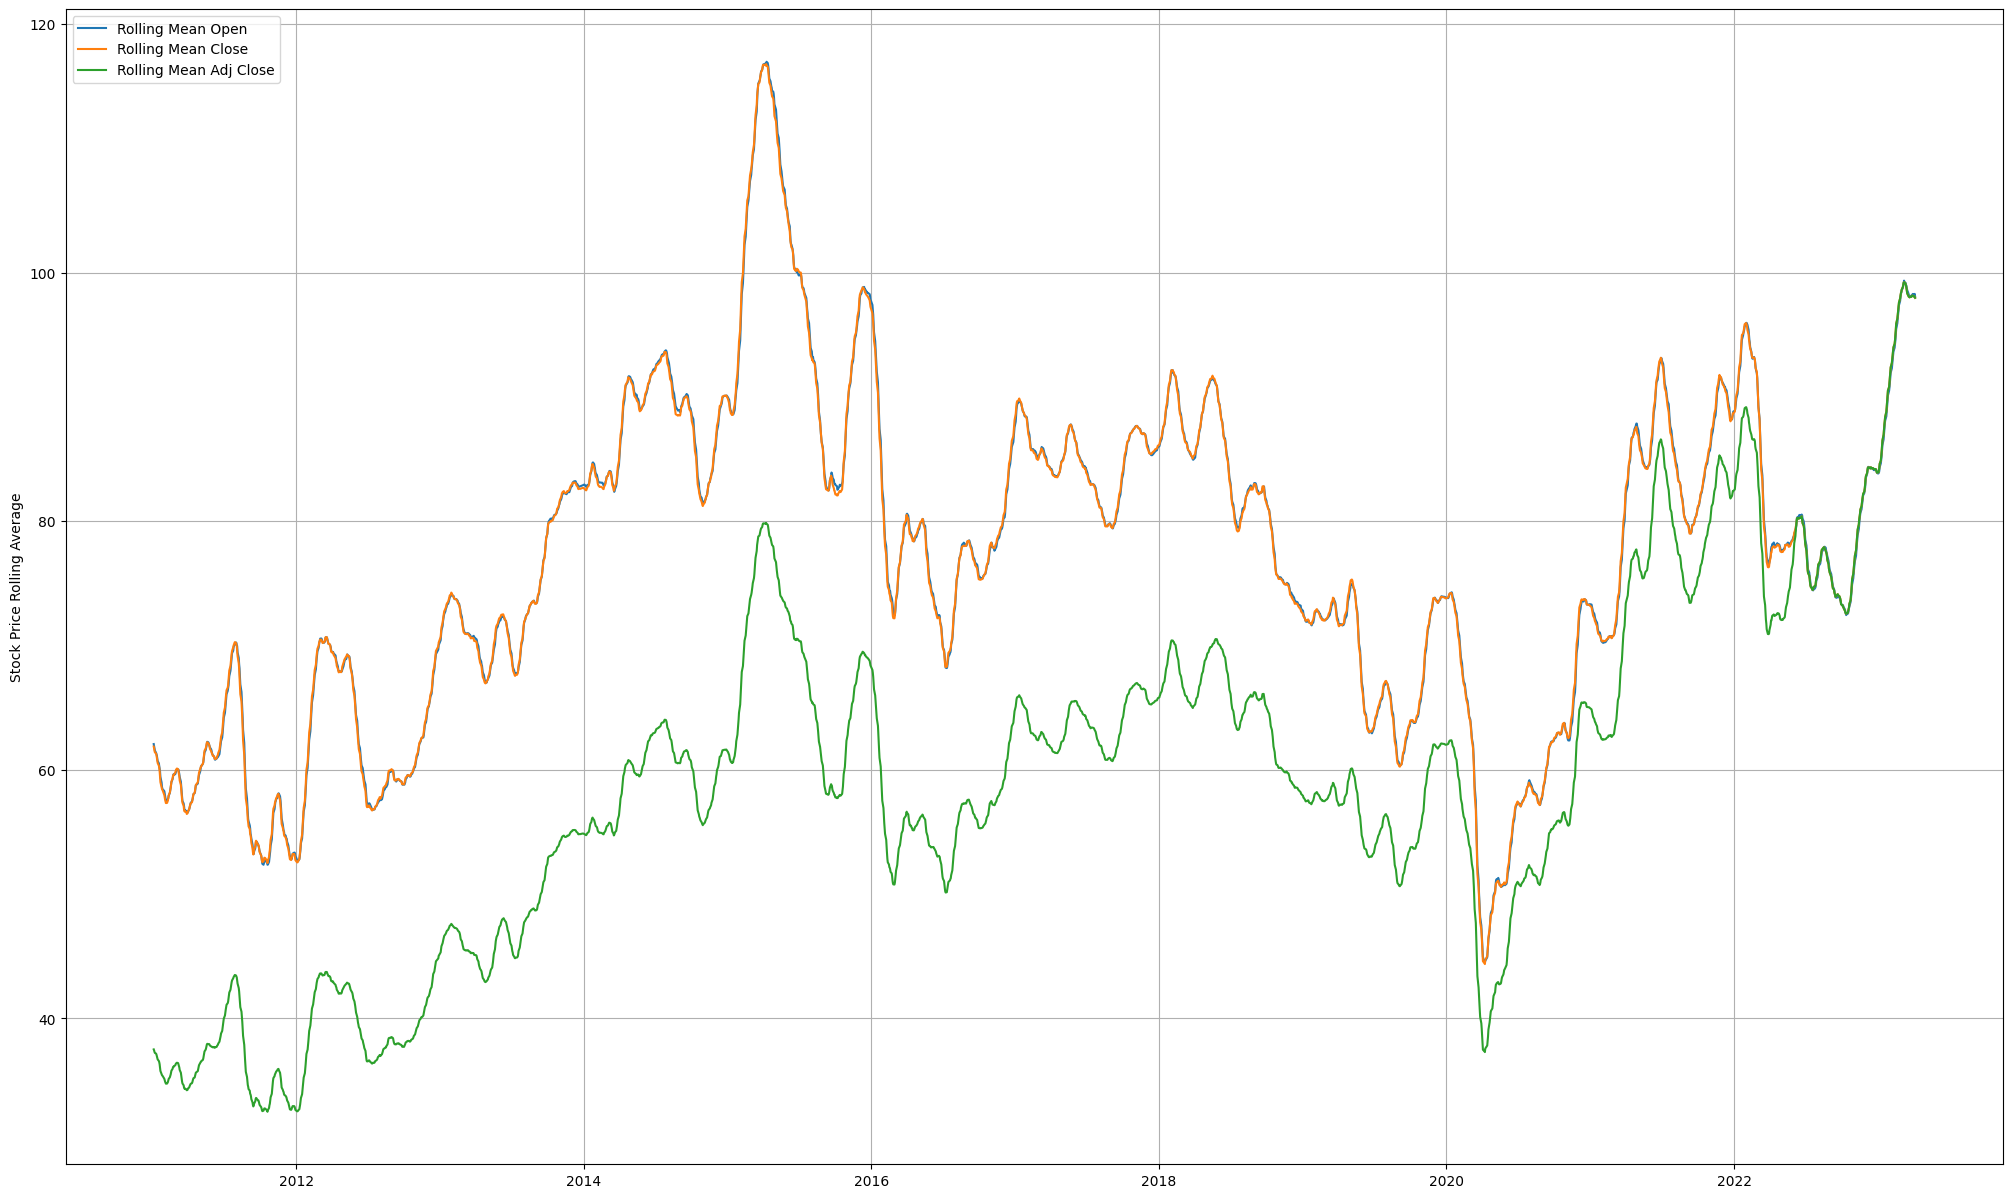


Bollinger-Band


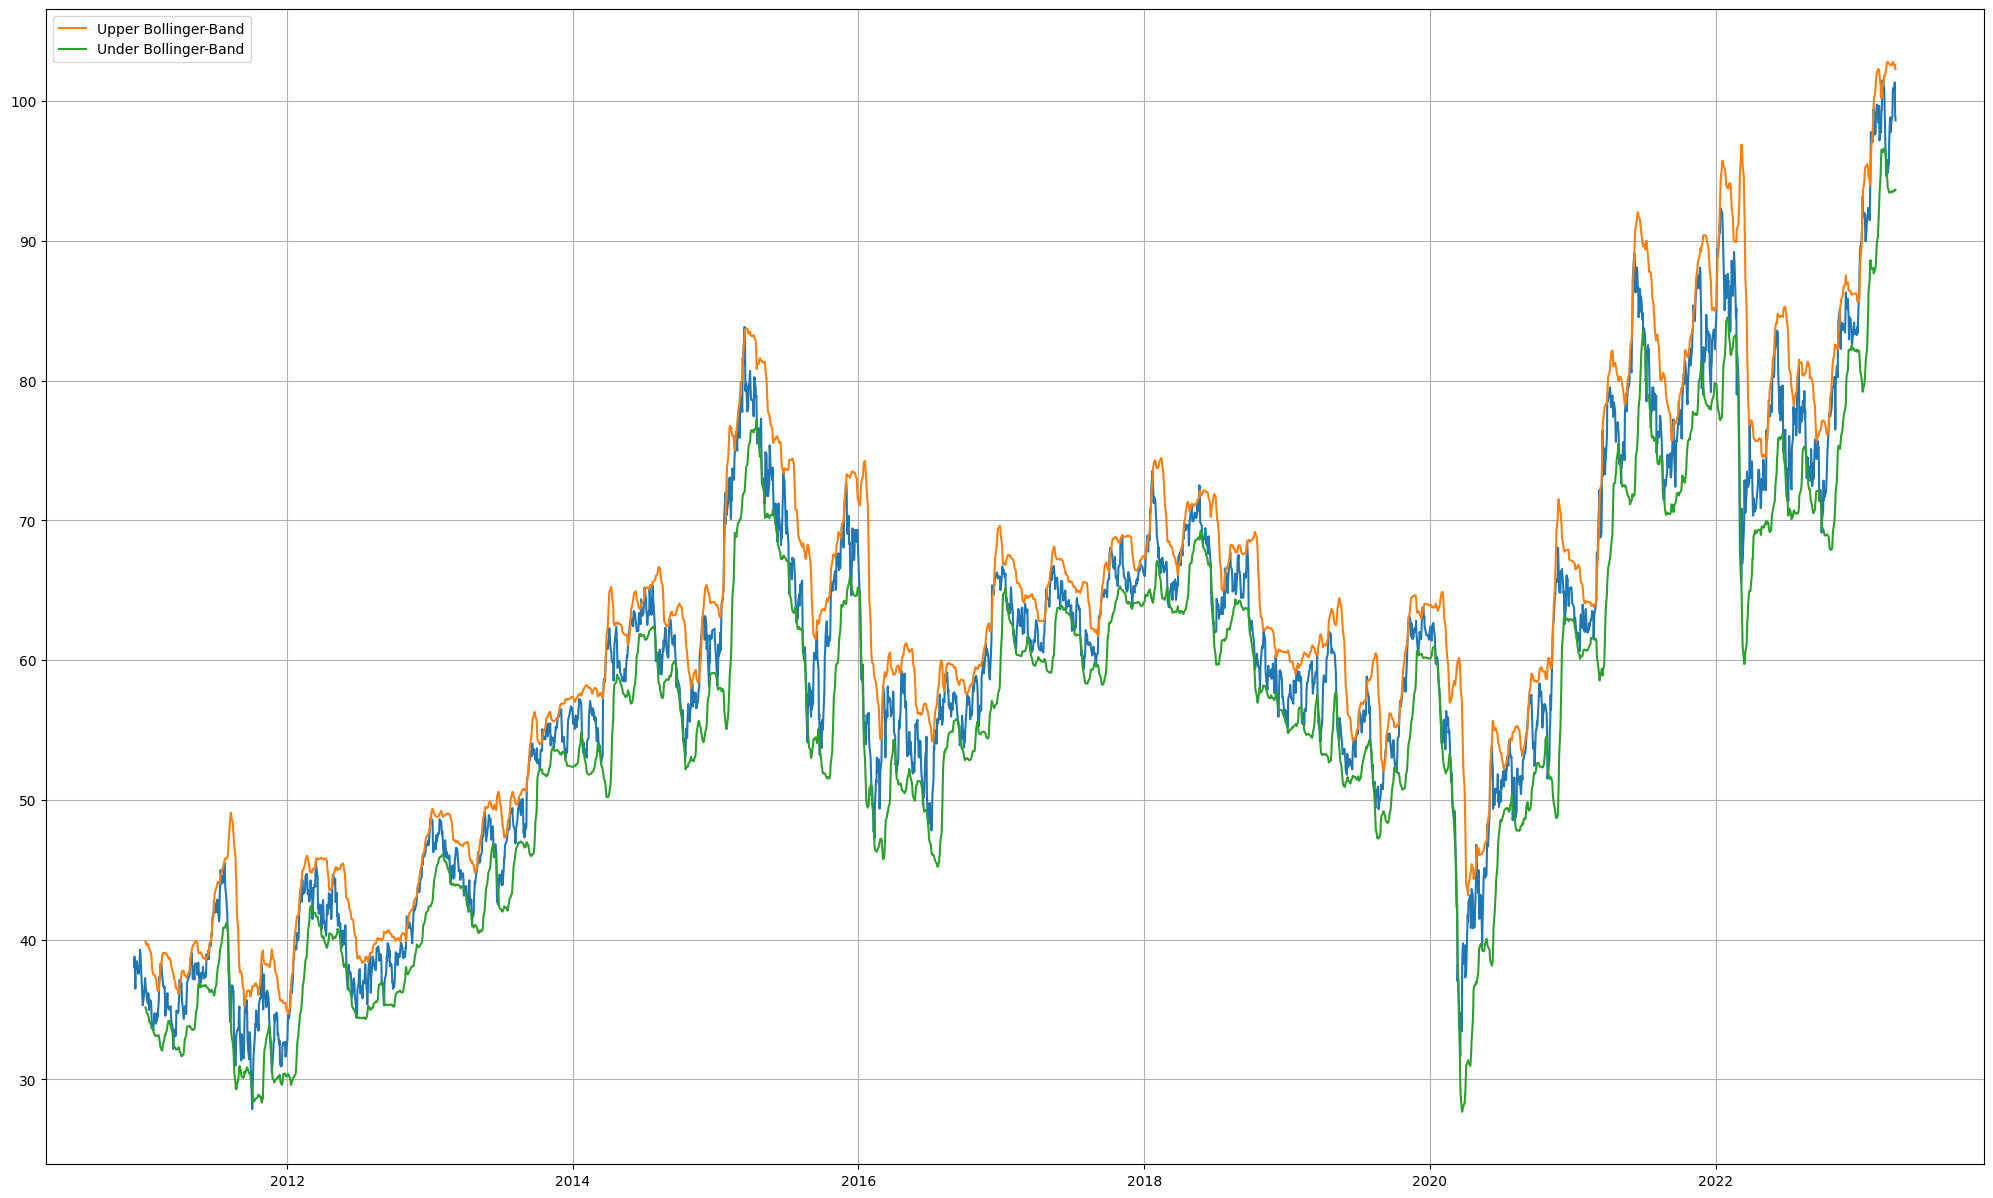


Percentage Of The Daily Price Change


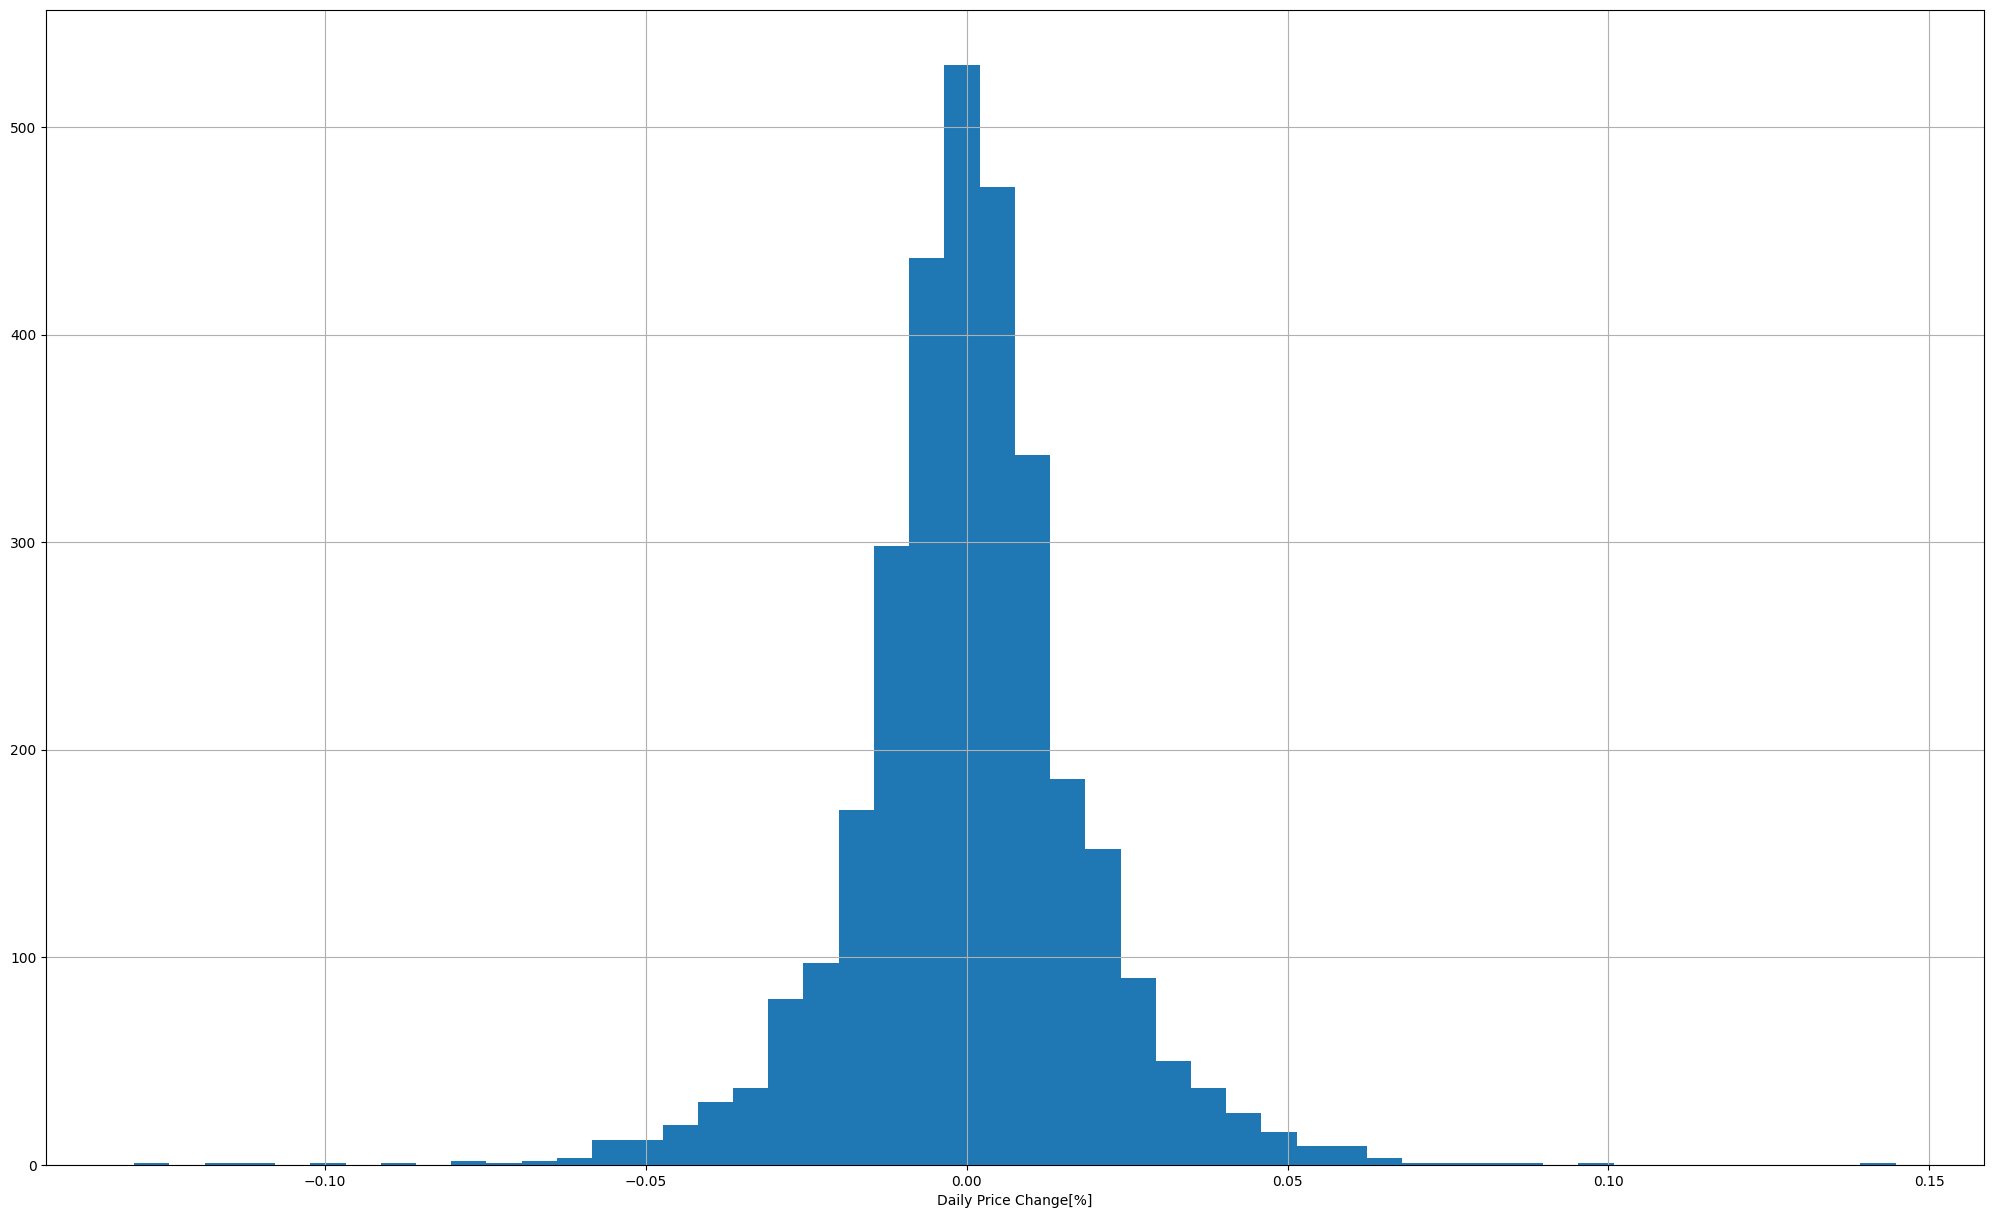


Correlation Between Volume And Adjusted Close


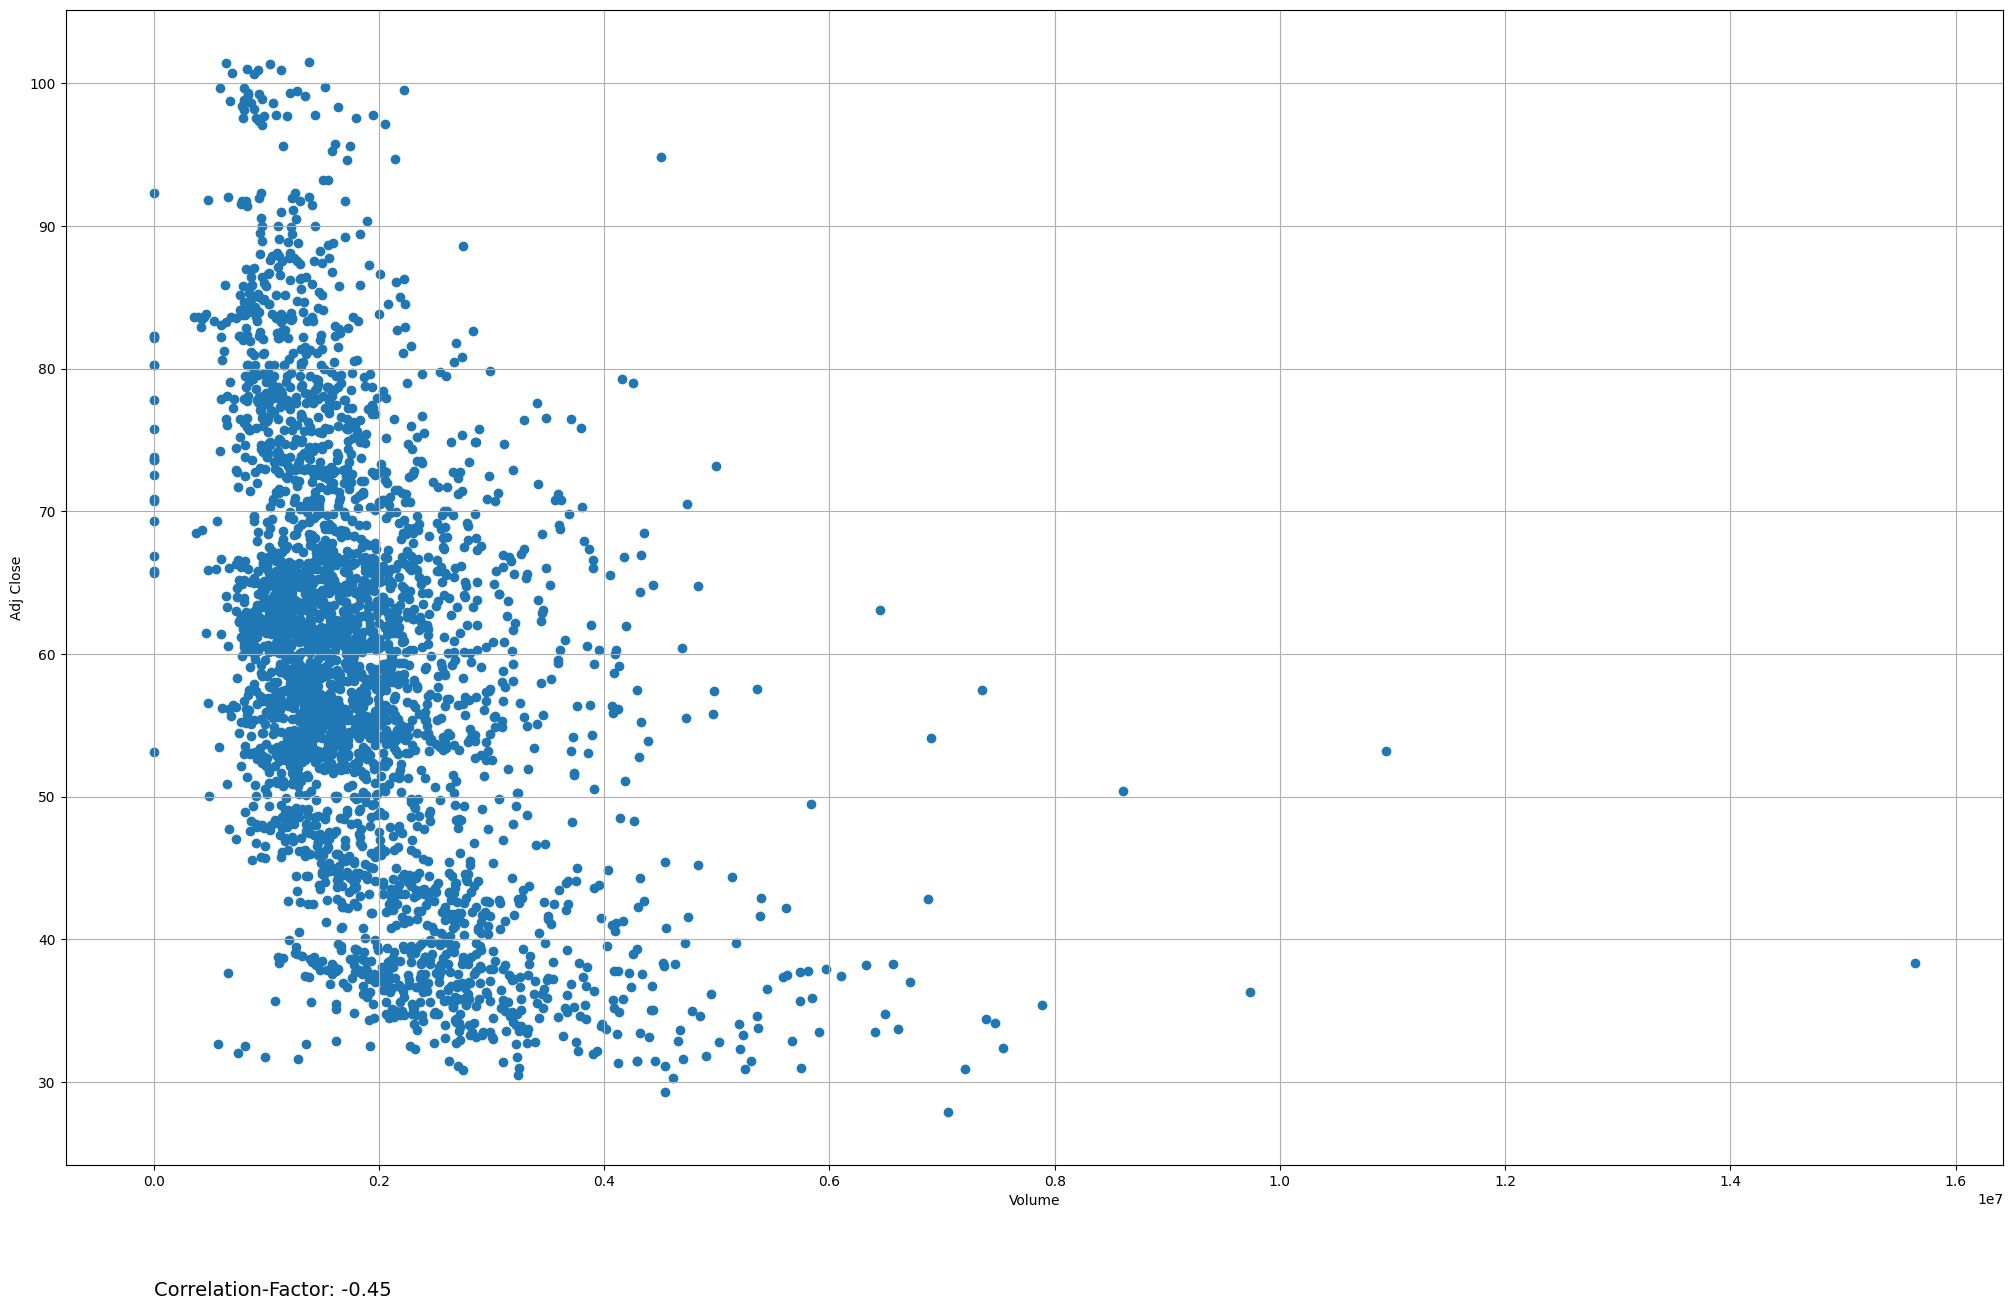


Monthly mean value of "Adjusted Close"


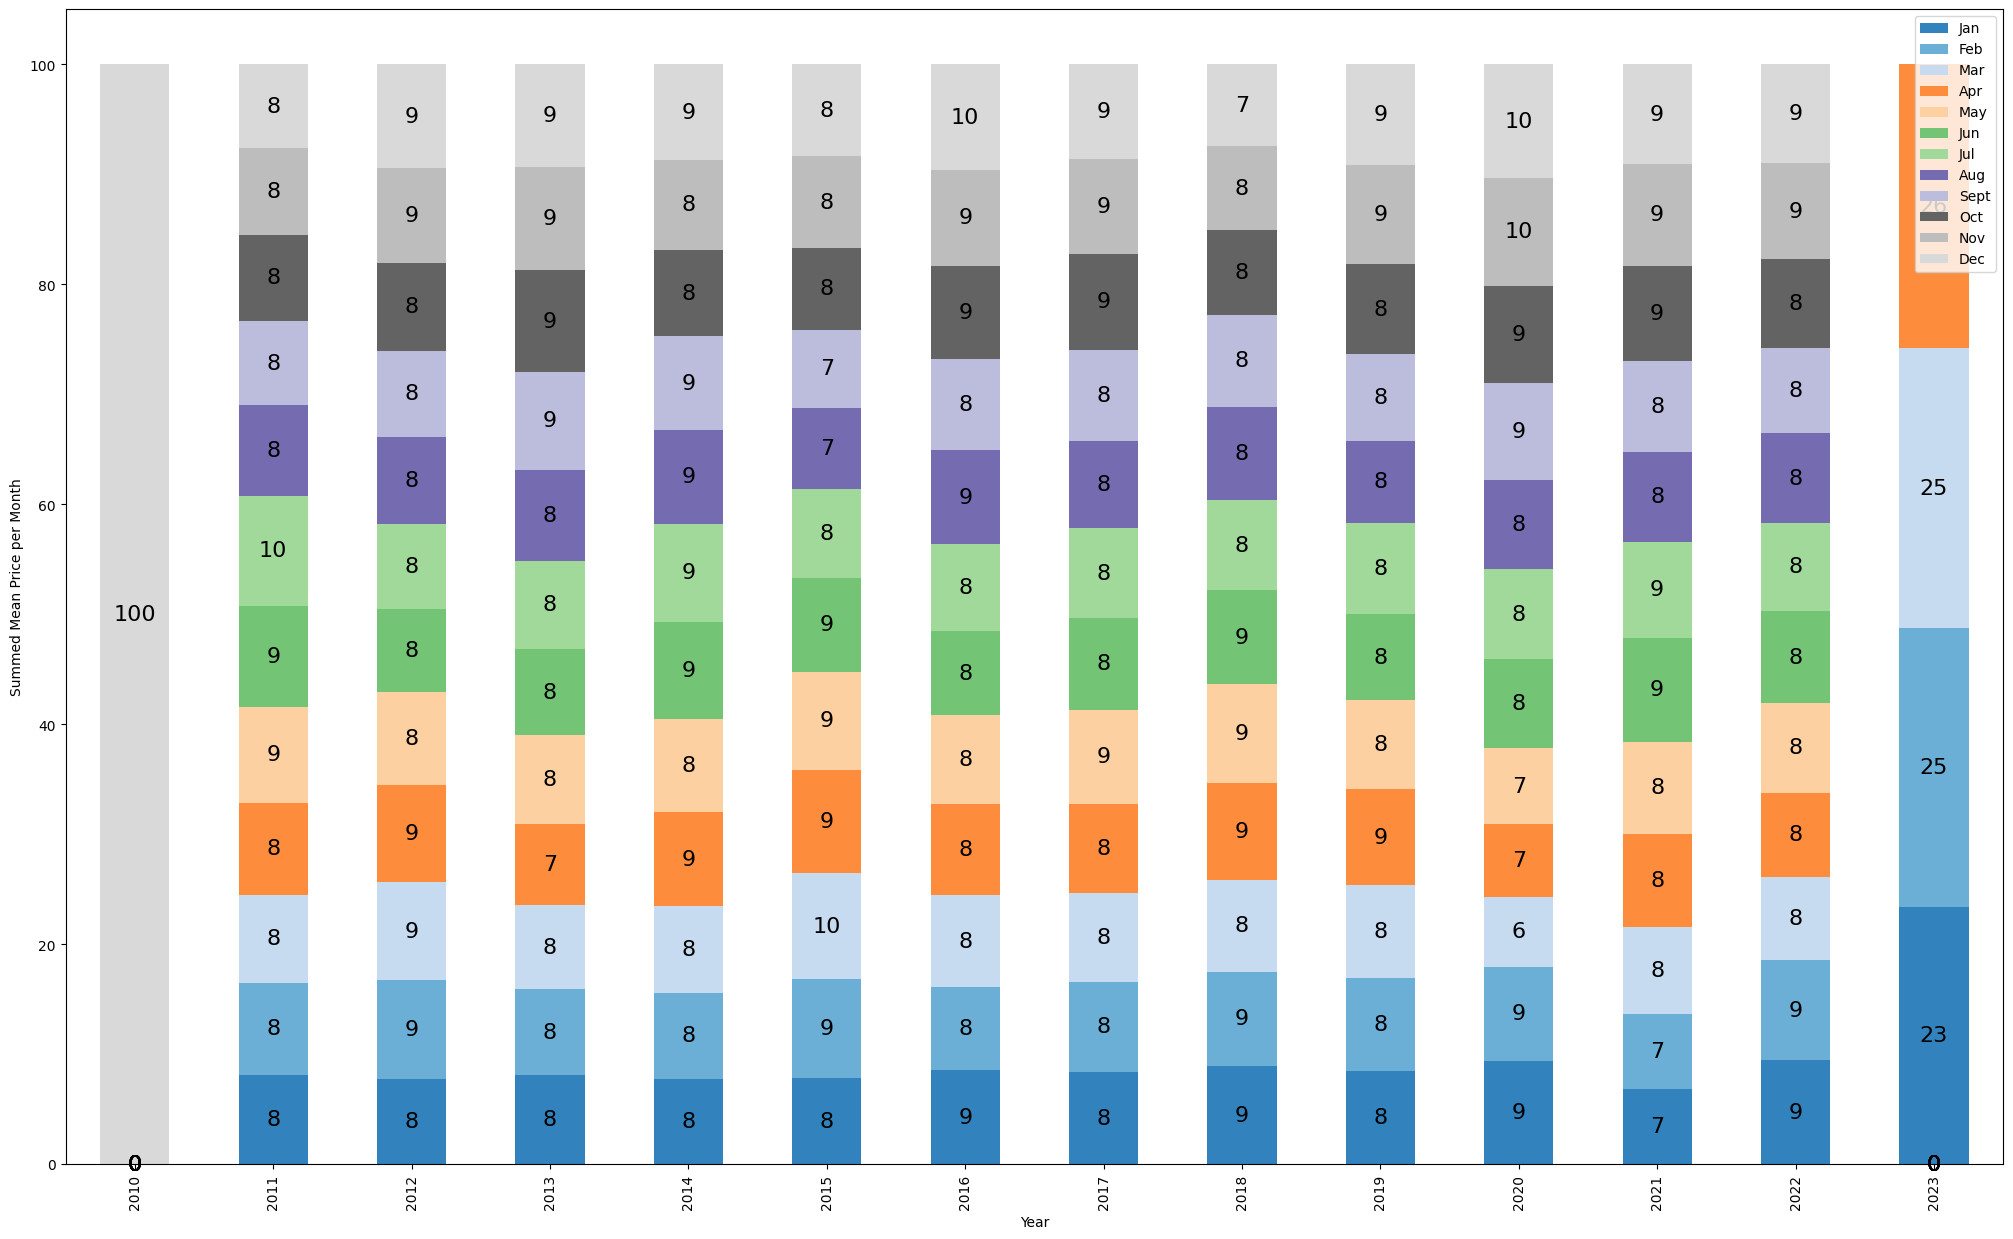

In [302]:
# show all relevant information for stock 'BMW.DE'
# first 5 rows of the df
print('BMW.DE')
print('Dataframe')
print(df_bmw.head())
# shape of the df
print()
print('Number Rows & Columns')
print(df_bmw.shape)
# statistical values
print()
print('Statistic Values')
print(df_bmw.describe())
# nan values
print()
print('NaN Values')
print(df_bmw.isna().sum())
# datatypes
print()
print('Data Types')
print(df_bmw.dtypes)

# plotting all columns to get an overview about the data (outlier)
print()
print('Column Plots For Outlier Detection')
df_bmw.plot(subplots=True, figsize=(25,15));
plt.show()

# plot high and low (as rolling averages) in one plot
print()
print('Rolling Mean')

# define area to calculate rolling average
window_size = 20

plt.figure(figsize=(25, 15))
# calculate the rolling average
rolling_mean_high = df_bmw['High'].rolling(window_size).mean()
rolling_mean_low = df_bmw['Low'].rolling(window_size).mean()

# plot rolling mean variants
plt.plot(rolling_mean_high, label="Rolling Mean High")
plt.plot(rolling_mean_low, label="Rolling Mean Low")
plt.legend(loc='upper left')
plt.ylabel('Stock Price Rolling Average')
plt.grid()
plt.show()

# plot open, close and adj close (as rolling averager) in one plot
plt.figure(figsize=(25, 15))

# calculate the rolling average
rolling_mean_open = df_bmw['Open'].rolling(window_size).mean()
rolling_mean_close = df_bmw['Close'].rolling(window_size).mean()
rolling_mean_adjclose = df_bmw['Adj Close'].rolling(window_size).mean()

# plot rolling mean variants
plt.plot(rolling_mean_open, label="Rolling Mean Open")
plt.plot(rolling_mean_close, label="Rolling Mean Close")
plt.plot(rolling_mean_adjclose, label="Rolling Mean Adj Close")
plt.legend(loc='upper left')
plt.ylabel('Stock Price Rolling Average')
plt.grid()
plt.show()

# plot Bollinger-Band 
print()
print('Bollinger-Band')

# calculate the standard deviation
std = df_bmw["Adj Close"].rolling(window=window_size).std()

# calculate Bollinger-Band 
upper_band = rolling_mean_adjclose + 2*std
lower_band = rolling_mean_adjclose - 2*std

plt.figure(figsize=(25, 15))
plt.plot(df_bmw.index, df_bmw['Adj Close'])
plt.plot(upper_band, label="Upper Bollinger-Band")
plt.plot(lower_band, label="Under Bollinger-Band")
plt.legend(loc='upper left')
plt.grid()
plt.show()

# plot the percentage of the daily price change
print()
print('Percentage Of The Daily Price Change')
# calculate the percentage of the daily price change
daily_pct_change = df_bmw['Adj Close'].pct_change()

plt.figure(figsize=(25, 15))
# histogram for the daily price change
daily_pct_change.hist(bins=50)
plt.xlabel('Daily Price Change[%]')
plt.show()

# plot correlation between volume and adjusted close
print()
print('Correlation Between Volume And Adjusted Close')

plt.figure(figsize=(25, 15))
# scatter plot for correlation
plt.scatter(df_bmw['Volume'], df_bmw['Adj Close'])
plt.text(
    10, 15, 'Correlation-Factor: '+str(
        round(np.corrcoef(df_bmw['Volume'],df_bmw['Adj Close'])[1][0],2)
    ), fontsize=14
)

plt.grid()
plt.xlabel('Volume')
plt.ylabel('Adj Close')
plt.show()

# plot the monthly mean value of 'Adjusted Close'
print()
print('Monthly mean value of "Adjusted Close"')

# list with all month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# calculate the mean price per month
monthly_mean = df_bmw['Adj Close'].resample('M').mean()

# create list with all years
year = monthly_mean.index.year.unique().tolist()

# create new empty dataframe to fill with the means per year and month
new_df = pd.DataFrame(index=year, columns=sorted(monthly_mean.index.month.unique().tolist()))

# fill nan with 0
new_df.fillna(0)

#fill the new df with the means
for row, date in enumerate(monthly_mean.index):
    new_df.loc[date.year, date.month] = monthly_mean[row]

# calculate the precantage
percent_df = new_df.div(new_df.sum(axis=1), axis=0) * 100

# plot a stacked bar chart with percentages
ax = percent_df.plot(kind='bar', stacked=True, figsize=(25,15), colormap='tab20c')

# loop through each bar
for i in ax.containers:
    # loop through the bar stacks
    for j in i:
        # define the position of the text
        x = j.get_x() + j.get_width() / 2
        y = j.get_y() + j.get_height() / 2
        value = j.get_height()
        # show text
        ax.text(x, y, round(value), ha='center', va='center', fontsize=16, color='black')

plt.xlabel('Year')
plt.ylabel('Summed Mean Price per Month')
plt.legend(labels=months)
plt.show()

TLSA
Dataframe
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-08-24  141.751999  141.933334  128.501328  134.279999  134.279999   
2020-08-25  131.659332  135.196671  131.199997  134.889328  134.889328   
2020-08-26  137.333328  144.399994  136.908661  143.544662  143.544662   
2020-08-27  145.363998  153.039993  142.833328  149.250000  149.250000   
2020-08-28  153.007996  154.565994  145.768005  147.559998  147.559998   

               Volume  
Date                   
2020-08-24  300954000  
2020-08-25  159883500  
2020-08-26  213591000  
2020-08-27  355395000  
2020-08-28  301218000  

Number Rows & Columns
(662, 6)

Statistic Values
             Open        High         Low       Close   Adj Close  \
count  662.000000  662.000000  662.000000  662.000000  662.000000   
mean   239.165871  244.683377  233.027620  238.961512  238.961512   
std     65.254522   66.598112   63.635867

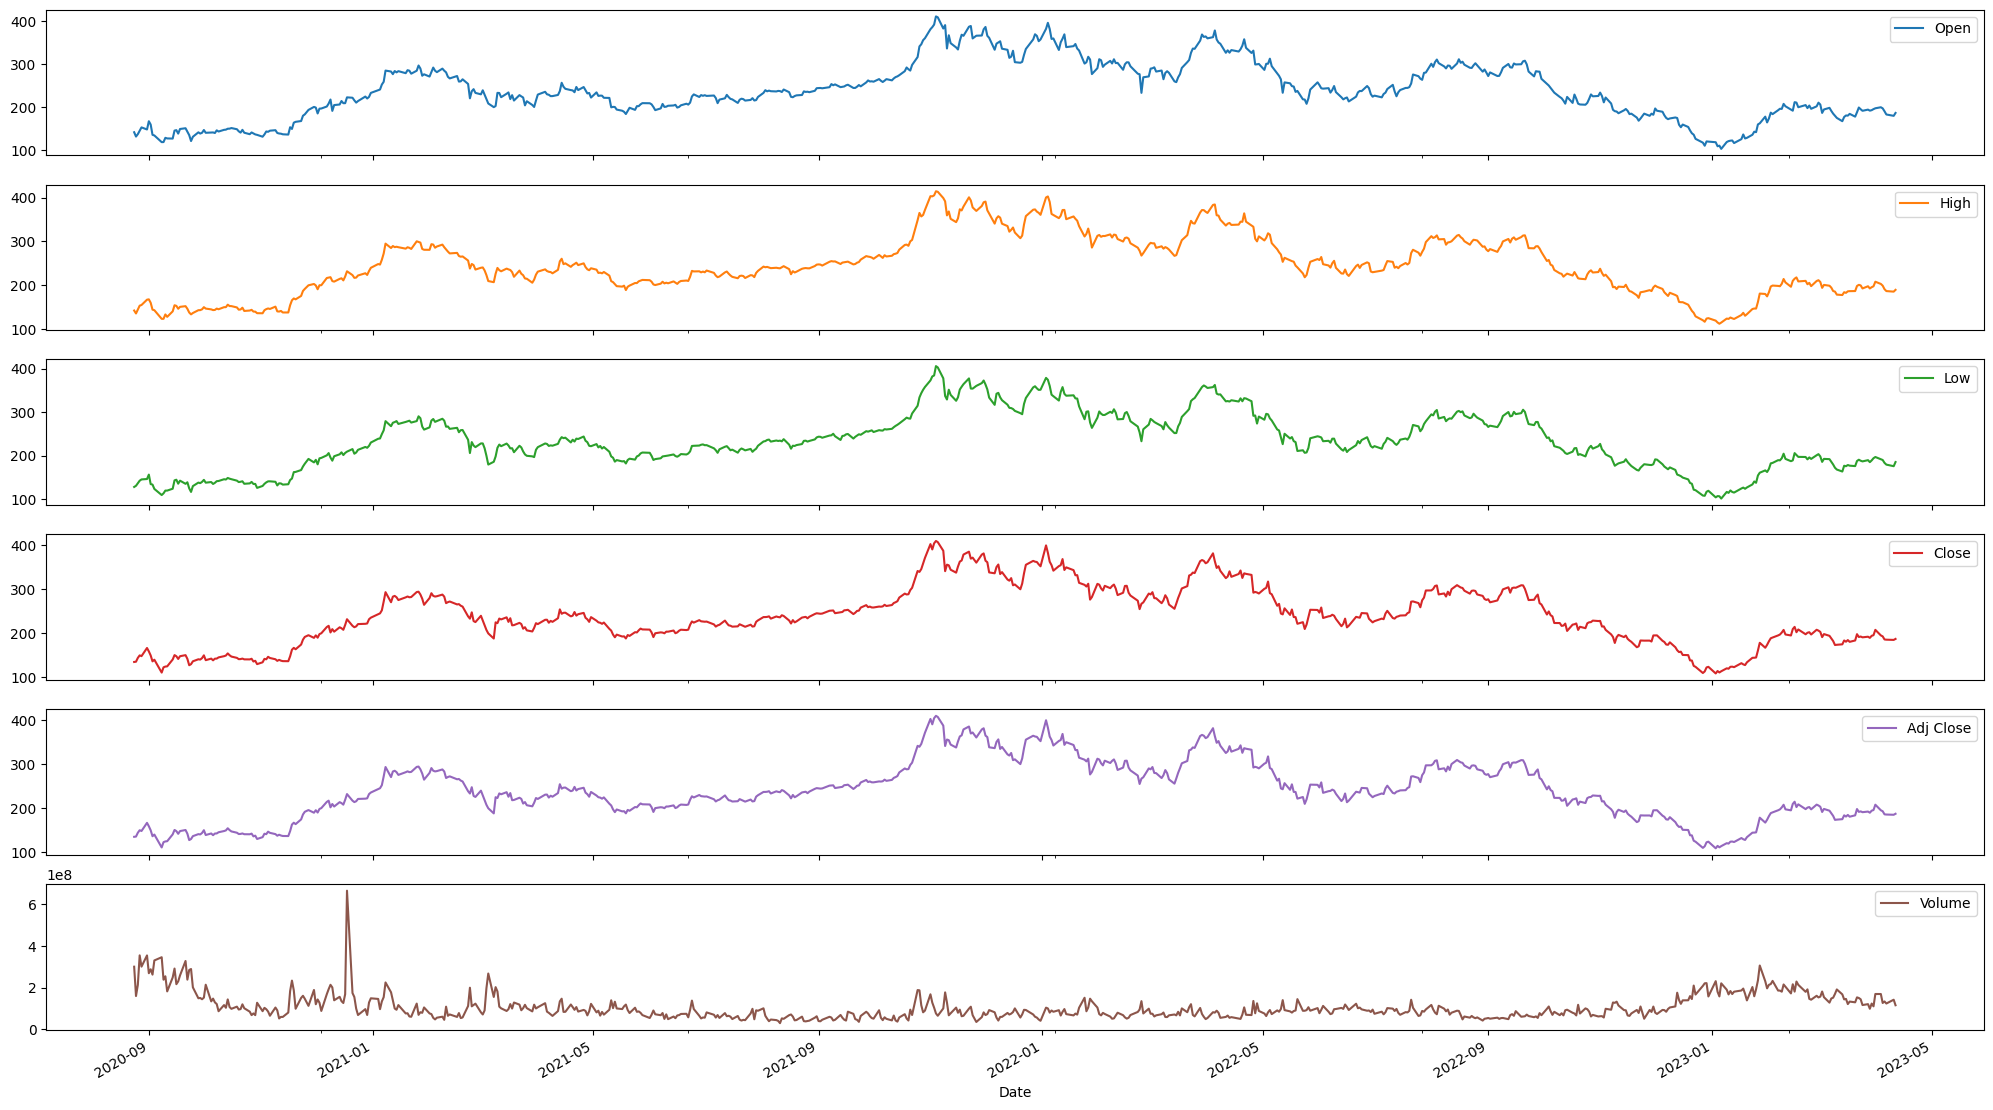


Rolling Mean


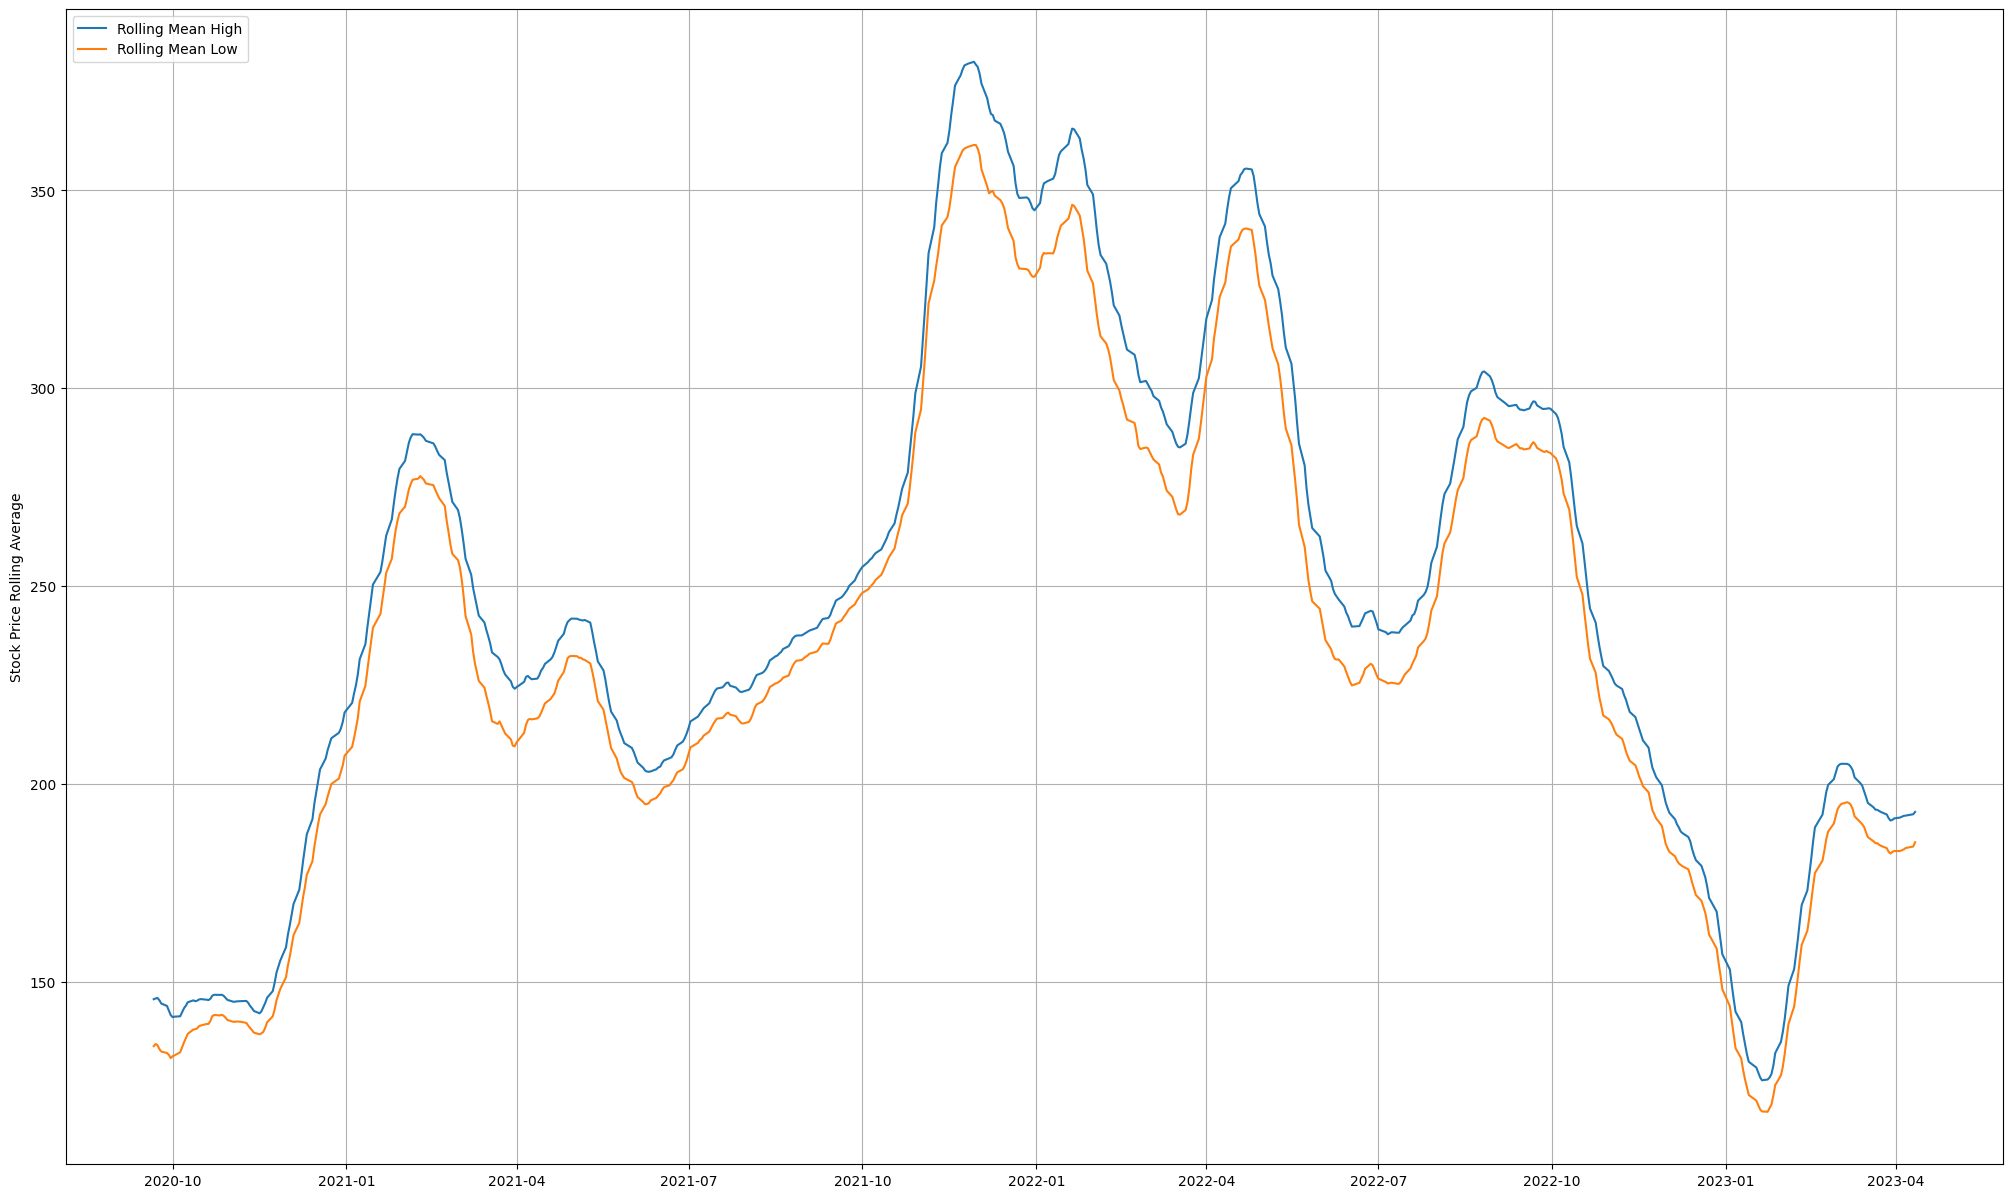

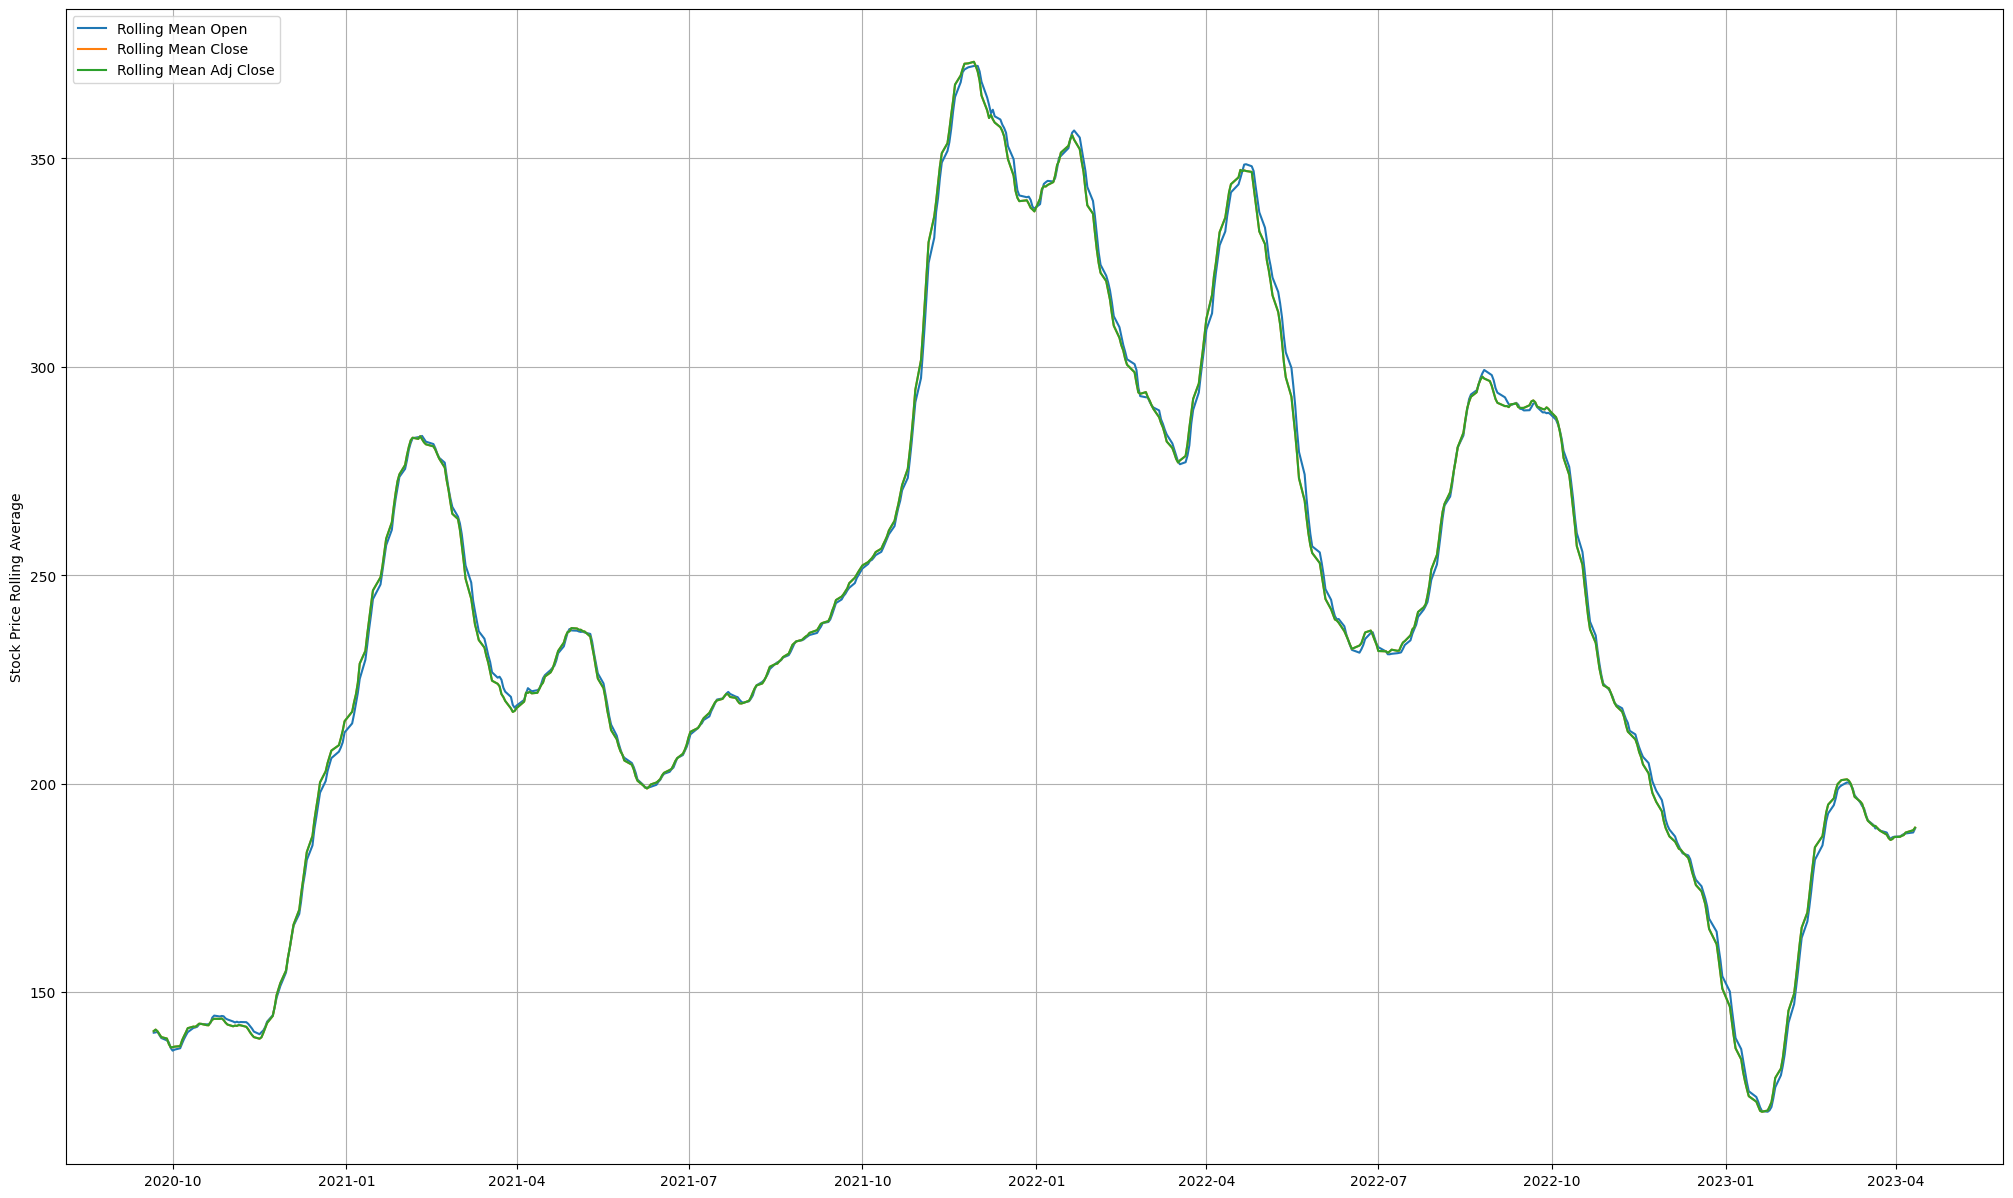


Bollinger-Band


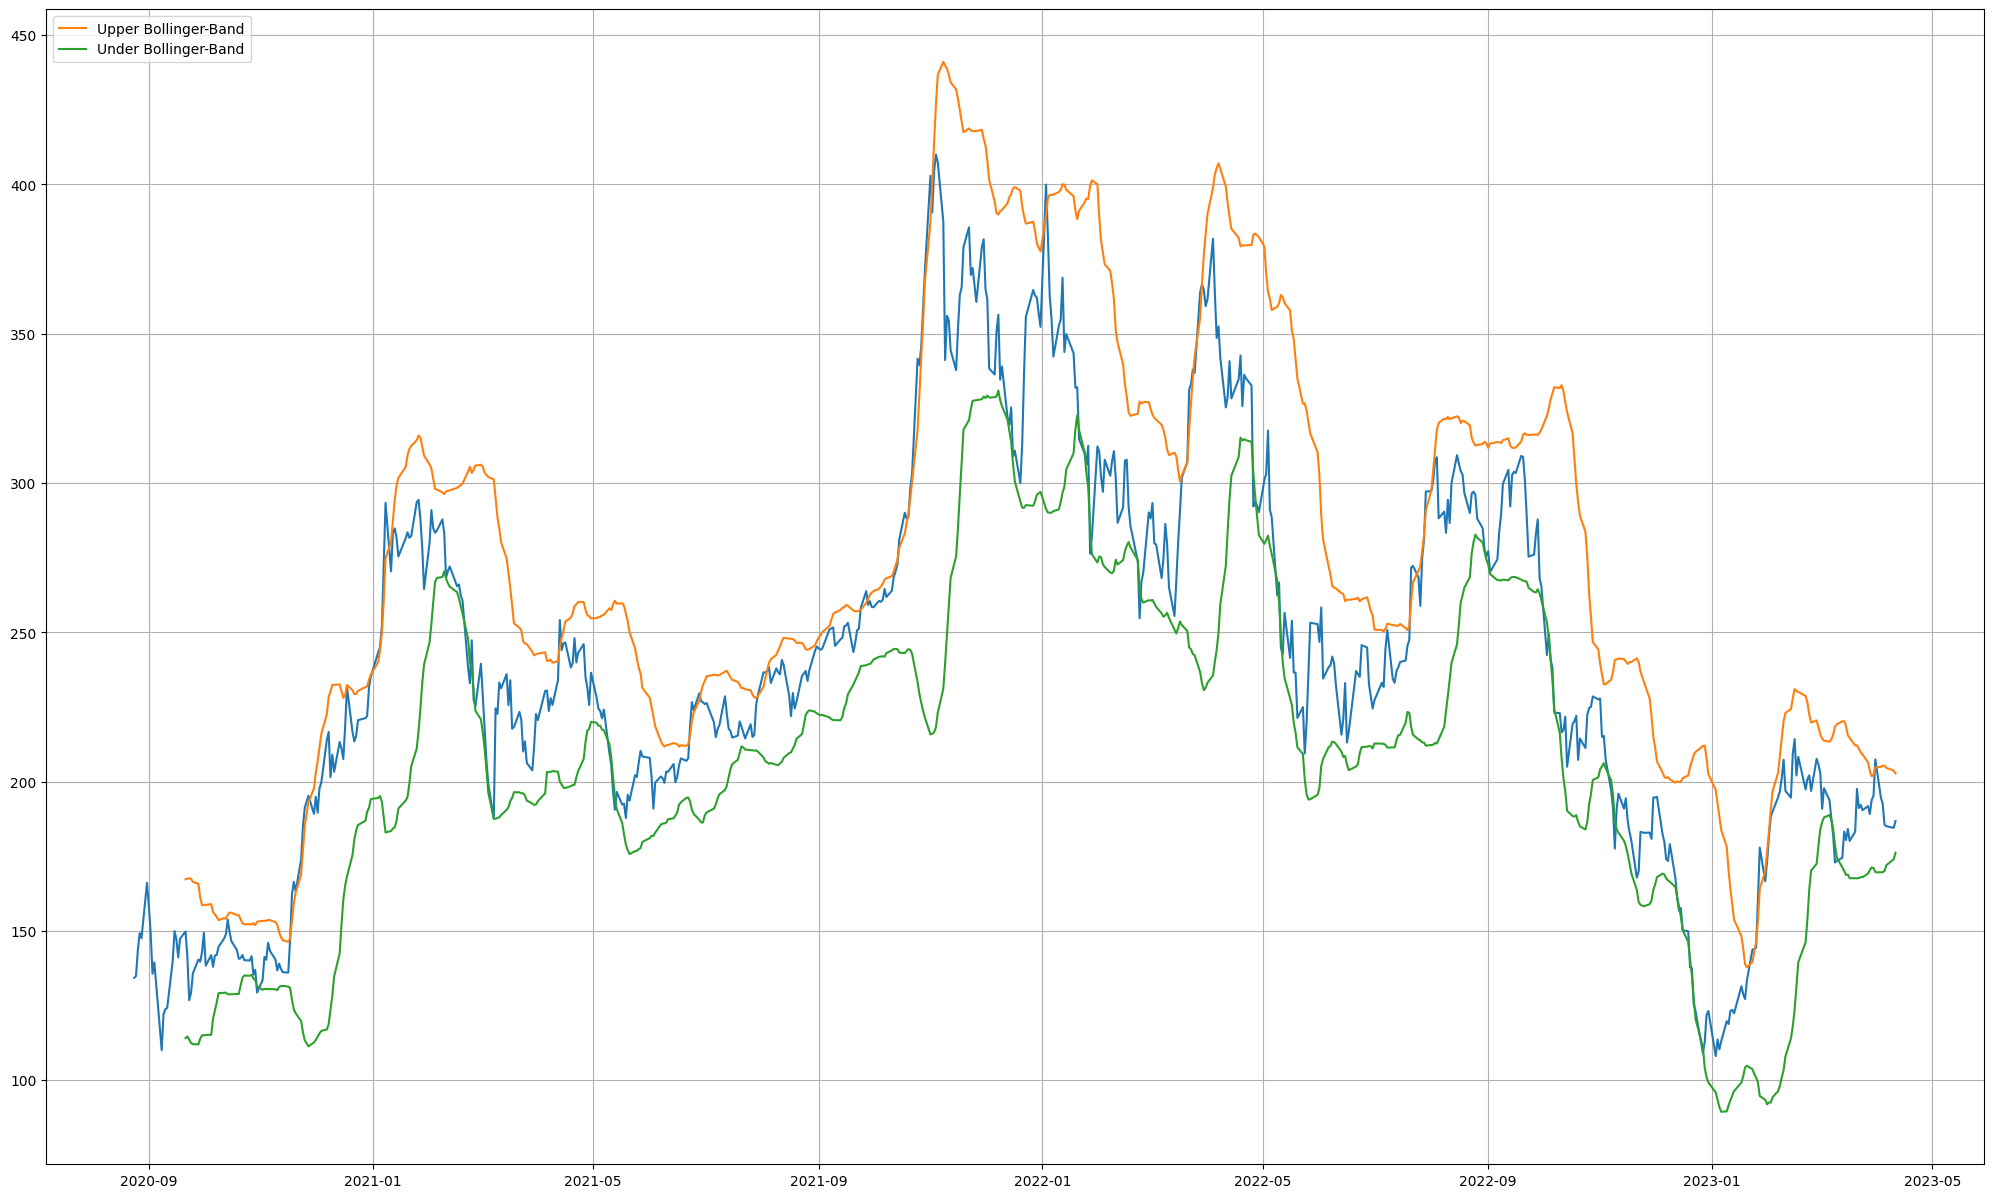


Percentage Of The Daily Price Change


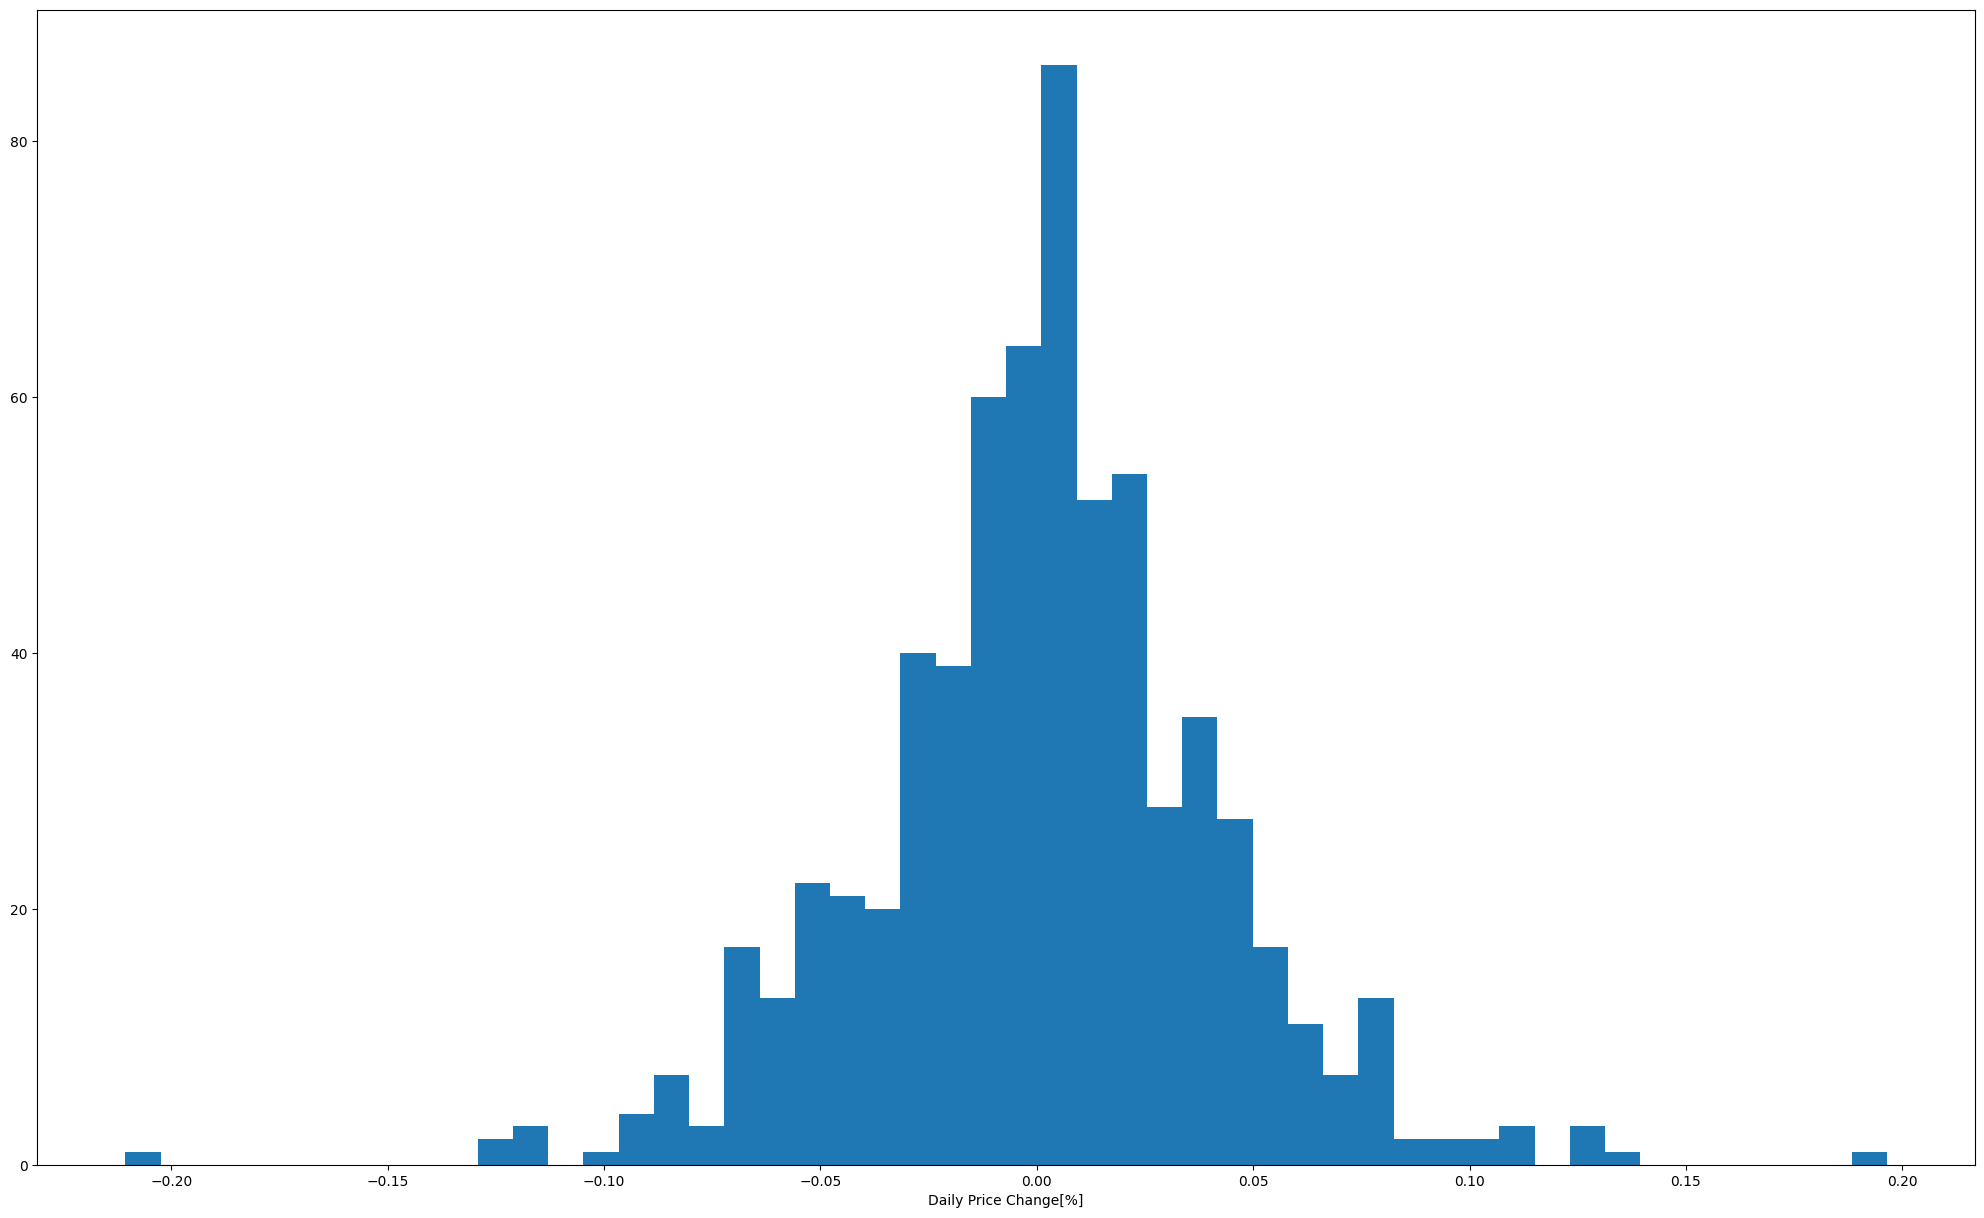


Correlation Between Volume And Adjusted Close


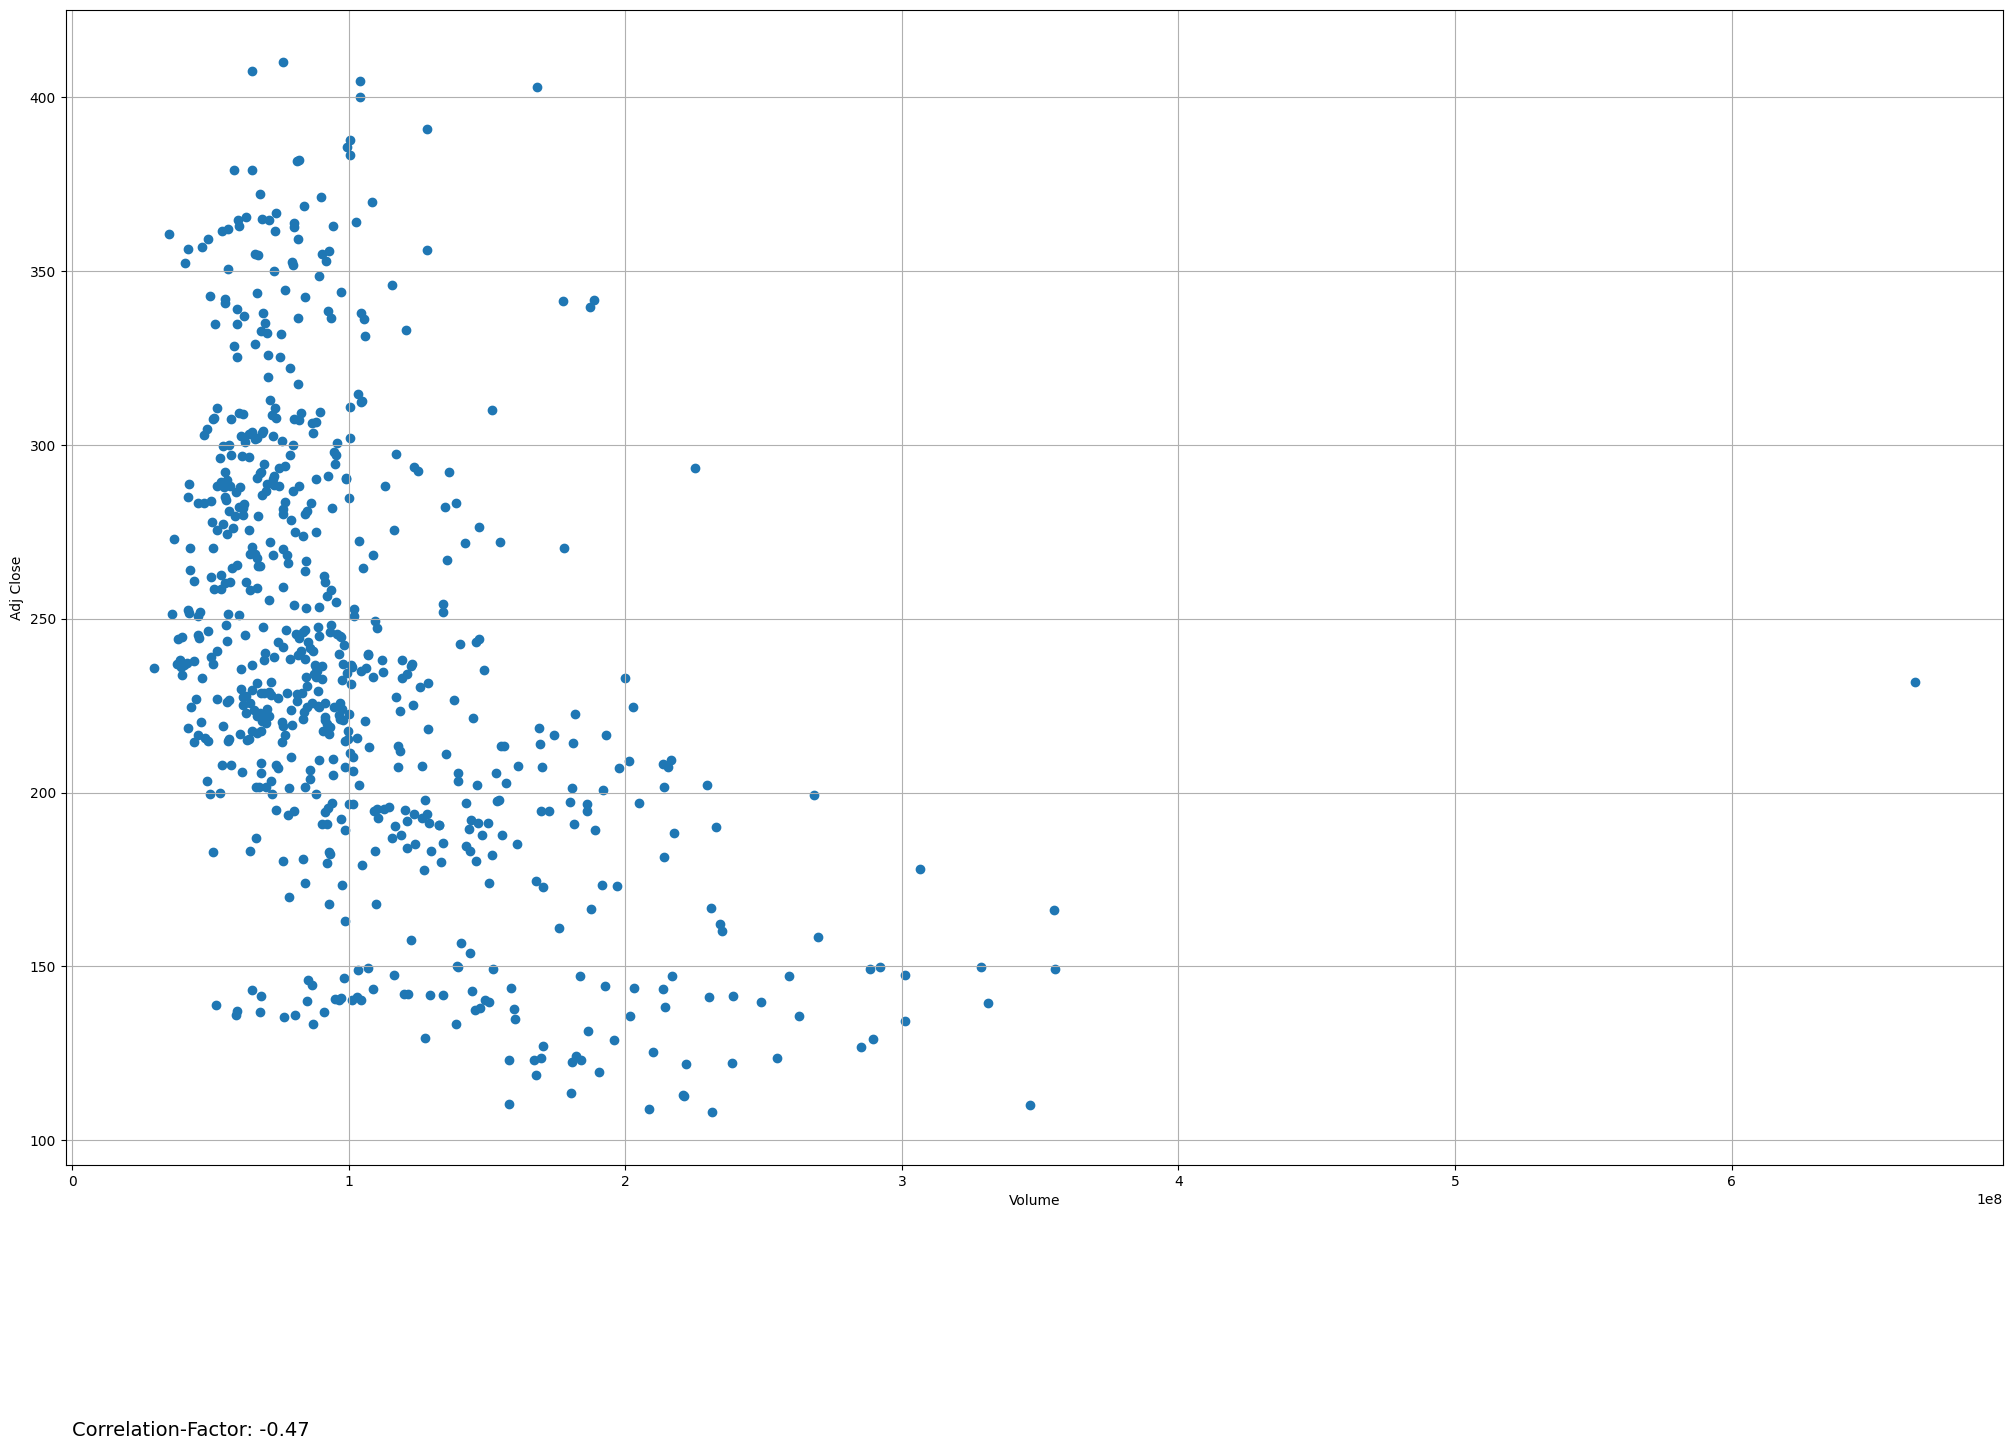


Monthly mean value of "Adjusted Close"


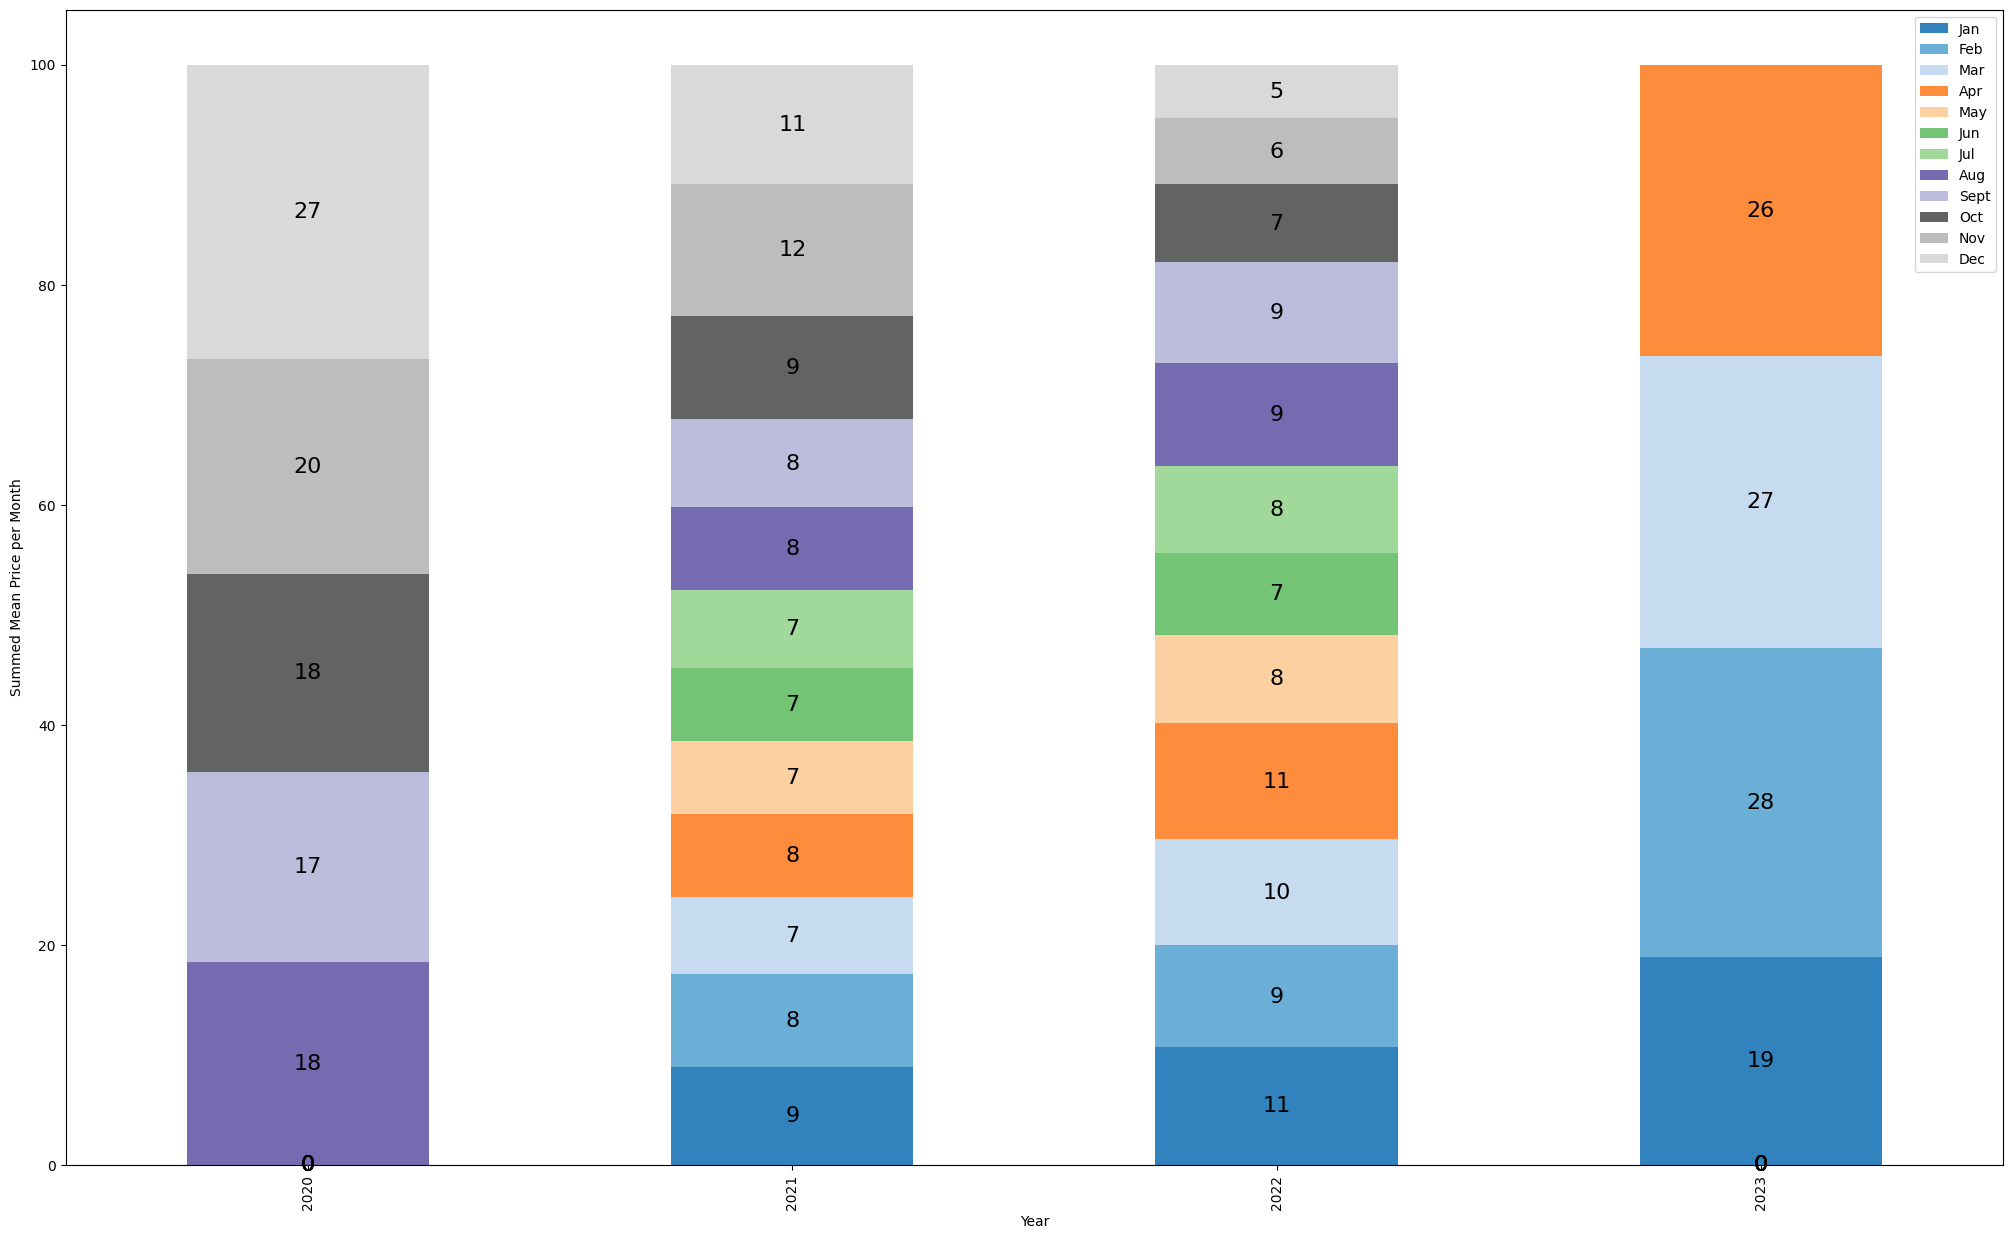

In [303]:
# show all relevant information for stock 'TSLA'
# first 5 rows of the df
print('TLSA')
print('Dataframe')
print(df_tsla.head())
# shape of the df
print()
print('Number Rows & Columns')
print(df_tsla.shape)
# statistical values
print()
print('Statistic Values')
print(df_tsla.describe())
# nan values
print()
print('NaN Values')
print(df_tsla.isna().sum())
# datatypes
print()
print('Data Types')
print(df_tsla.dtypes)

# plotting all columns to get an overview about the data (outlier)
print()
print('Column Plots For Outlier Detection')
df_tsla.plot(subplots=True, figsize=(25,15));
plt.show()

# plot high and low (as rolling averages) in one plot
print()
print('Rolling Mean')

# define area to calculate rolling average
window_size = 20

plt.figure(figsize=(25, 15))
# calculate the rolling average
rolling_mean_high = df_tsla['High'].rolling(window_size).mean()
rolling_mean_low = df_tsla['Low'].rolling(window_size).mean()

# plot rolling mean variants
plt.plot(rolling_mean_high, label="Rolling Mean High")
plt.plot(rolling_mean_low, label="Rolling Mean Low")
plt.legend(loc='upper left')
plt.ylabel('Stock Price Rolling Average')
plt.grid()
plt.show()

# plot open, close and adj close (as rolling averager) in one plot
plt.figure(figsize=(25, 15))

# calculate the rolling average
rolling_mean_open = df_tsla['Open'].rolling(window_size).mean()
rolling_mean_close = df_tsla['Close'].rolling(window_size).mean()
rolling_mean_adjclose = df_tsla['Adj Close'].rolling(window_size).mean()

# plot rolling mean variants
plt.plot(rolling_mean_open, label="Rolling Mean Open")
plt.plot(rolling_mean_close, label="Rolling Mean Close")
plt.plot(rolling_mean_adjclose, label="Rolling Mean Adj Close")
plt.legend(loc='upper left')
plt.ylabel('Stock Price Rolling Average')
plt.grid()
plt.show()

# plot Bollinger-Band 
print()
print('Bollinger-Band')

# calculate the standard deviation
std = df_tsla["Adj Close"].rolling(window=window_size).std()

# calculate Bollinger-Band 
upper_band = rolling_mean_adjclose + 2*std
lower_band = rolling_mean_adjclose - 2*std

plt.figure(figsize=(25, 15))
plt.plot(df_tsla.index, df_tsla['Adj Close'])
plt.plot(upper_band, label="Upper Bollinger-Band")
plt.plot(lower_band, label="Under Bollinger-Band")
plt.legend(loc='upper left')
plt.grid()
plt.show()

# plot the percentage of the daily price change
print()
print('Percentage Of The Daily Price Change')
# calculate the percentage of the daily price change
daily_pct_change = df_tsla['Adj Close'].pct_change()

plt.figure(figsize=(25, 15))
# histogram for the daily price change
daily_pct_change.hist(bins=50)
plt.xlabel('Daily Price Change[%]')
plt.grid()
plt.show()

# plot correlation between volume and adjusted close
print()
print('Correlation Between Volume And Adjusted Close')

plt.figure(figsize=(25, 15))
# scatter plot for correlation
plt.scatter(df_tsla['Volume'], df_tsla['Adj Close'])
plt.text(
    10, 15, 'Correlation-Factor: '+str(
        round(np.corrcoef(df_tsla['Volume'],df_tsla['Adj Close'])[1][0],2)
    ), fontsize=14
)

plt.grid()
plt.xlabel('Volume')
plt.ylabel('Adj Close')
plt.show()

# plot the monthly mean value of 'Adjusted Close'
print()
print('Monthly mean value of "Adjusted Close"')

# list with all month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# calculate the mean price per month
monthly_mean = df_tsla['Adj Close'].resample('M').mean()

# create list with all years
year = monthly_mean.index.year.unique().tolist()

# create new empty dataframe to fill with the means per year and month
new_df = pd.DataFrame(index=year, columns=sorted(monthly_mean.index.month.unique().tolist()))

# fill nan with 0
new_df.fillna(0)

#fill the new df with the means
for row, date in enumerate(monthly_mean.index):
    new_df.loc[date.year, date.month] = monthly_mean[row]

# calculate the precantage
percent_df = new_df.div(new_df.sum(axis=1), axis=0) * 100

# plot a stacked bar chart with percentages
ax = percent_df.plot(kind='bar', stacked=True, figsize=(25,15), colormap='tab20c')

# loop through each bar
for i in ax.containers:
    # loop through the bar stacks
    for j in i:
        # define the position of the text
        x = j.get_x() + j.get_width() / 2
        y = j.get_y() + j.get_height() / 2
        value = j.get_height()
        # show text
        ax.text(x, y, round(value), ha='center', va='center', fontsize=16, color='black')

plt.xlabel('Year')
plt.ylabel('Summed Mean Price per Month')
plt.legend(labels=months)
plt.show()

BTC-USD
Dataframe
                    Open          High           Low         Close  \
Date                                                                 
2021-01-03  32129.408203  34608.558594  32052.316406  32782.023438   
2021-01-04  32810.949219  33440.218750  28722.755859  31971.914062   
2021-01-05  31977.041016  34437.589844  30221.187500  33992.429688   
2021-01-06  34013.613281  36879.699219  33514.035156  36824.363281   
2021-01-07  36833.875000  40180.367188  36491.191406  39371.042969   

               Adj Close       Volume  
Date                                   
2021-01-03  32782.023438  78665235202  
2021-01-04  31971.914062  81163475344  
2021-01-05  33992.429688  67547324782  
2021-01-06  36824.363281  75289433811  
2021-01-07  39371.042969  84762141031  

Number Rows & Columns
(828, 6)

Statistic Values
               Open          High           Low         Close     Adj Close  \
count    828.000000    828.000000    828.000000    828.000000    828.000000   
mea

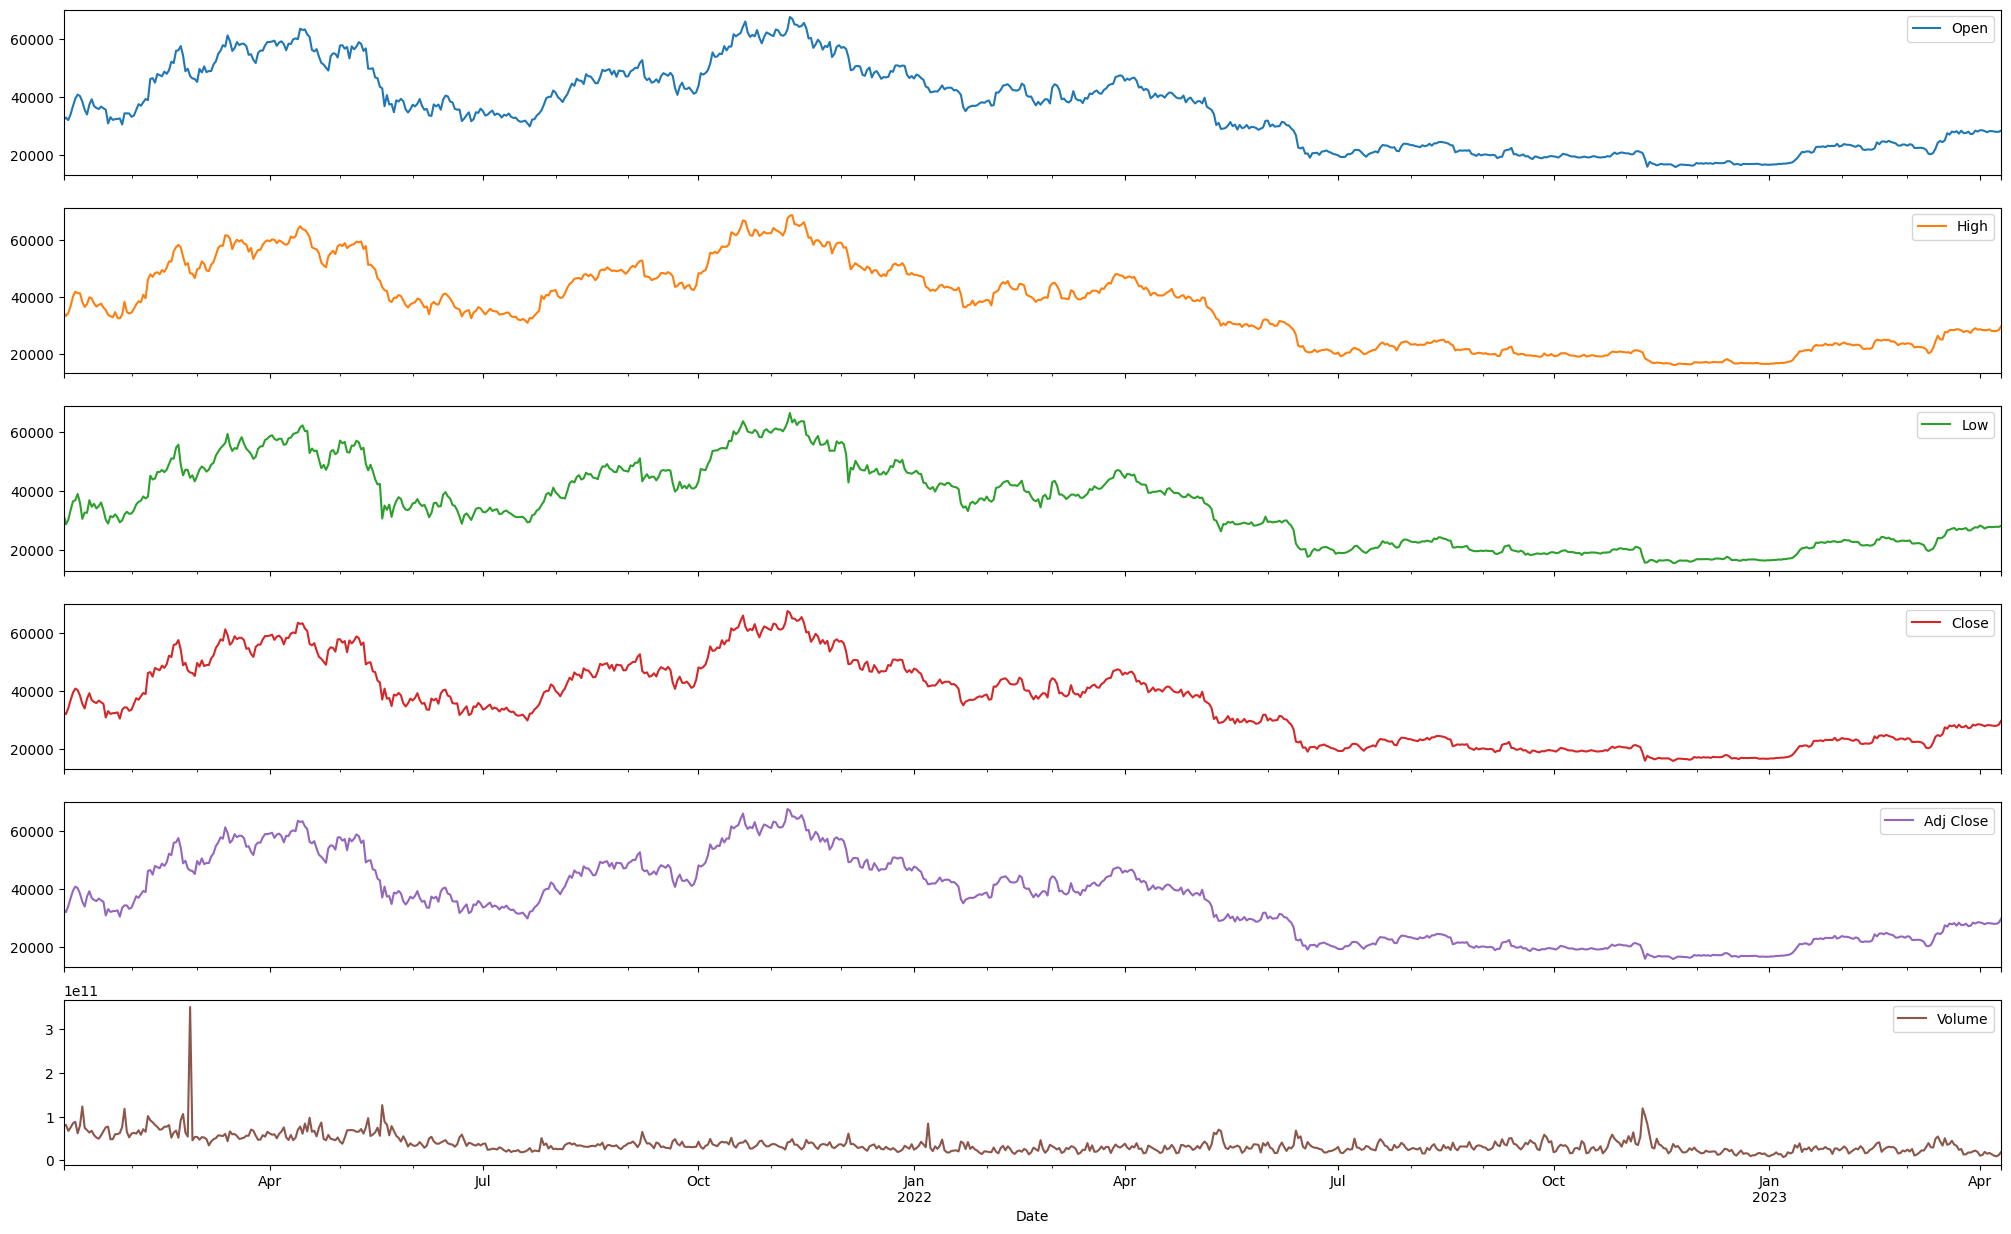


Rolling Mean


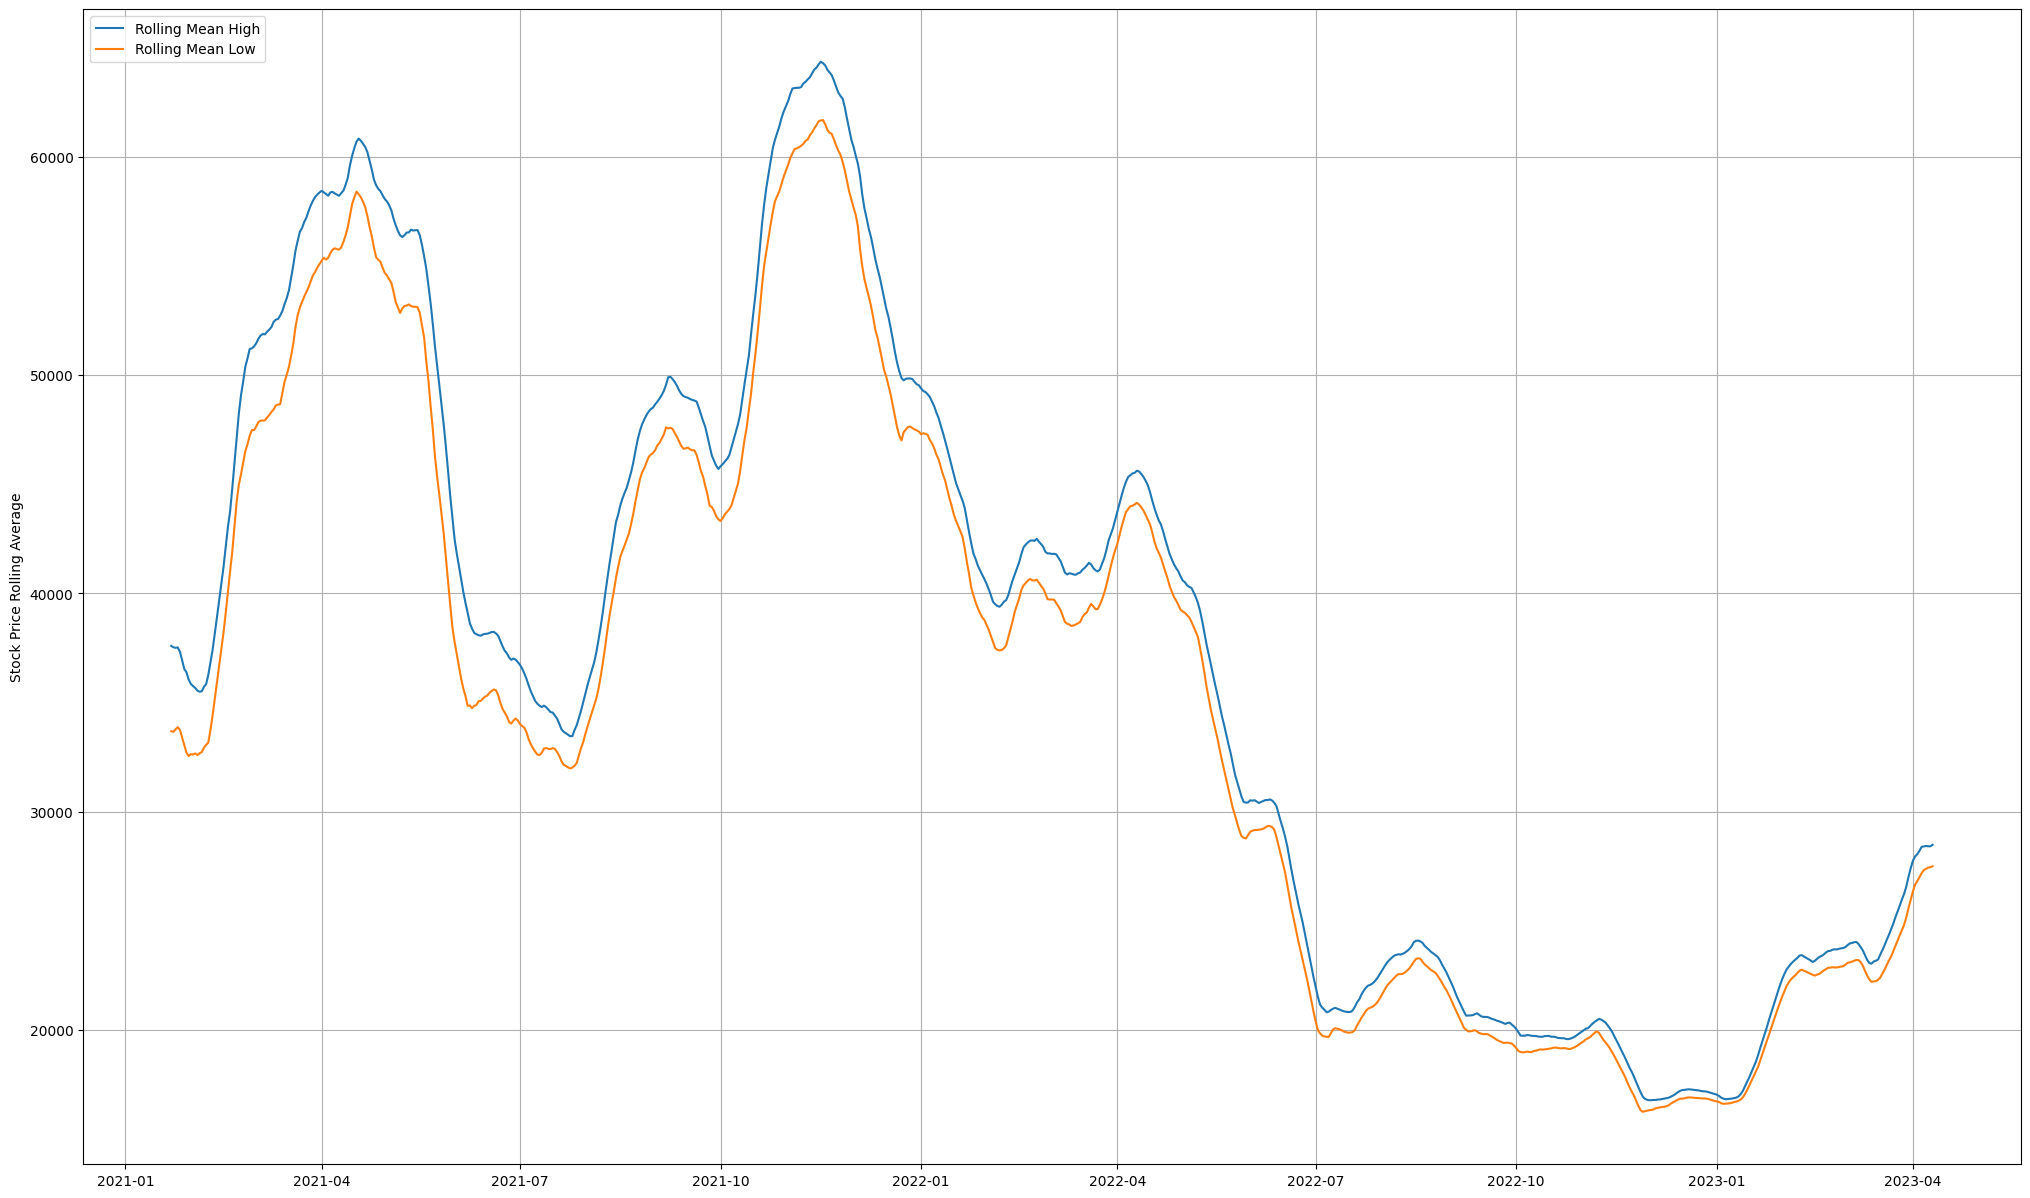

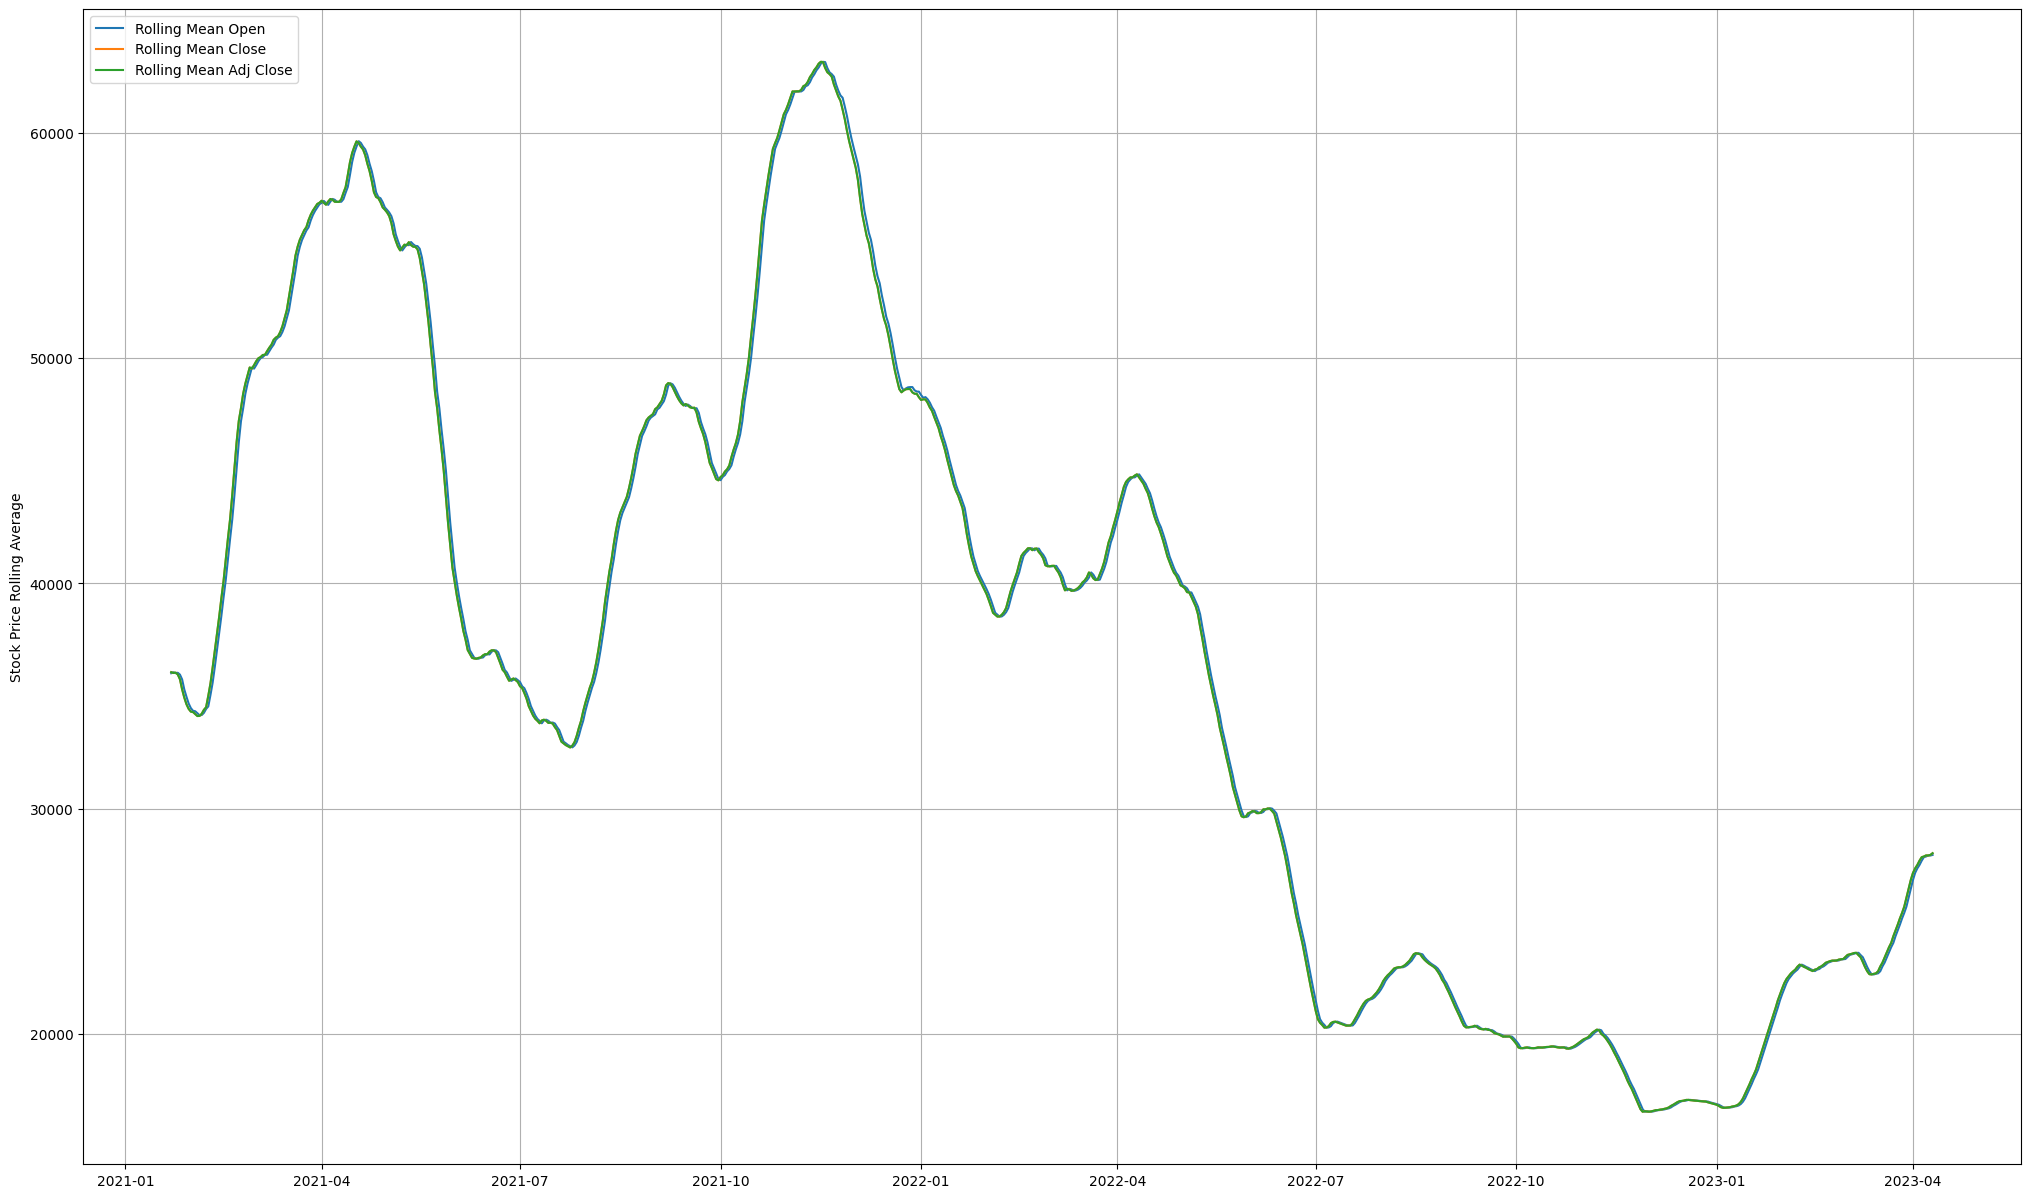


Bollinger-Band


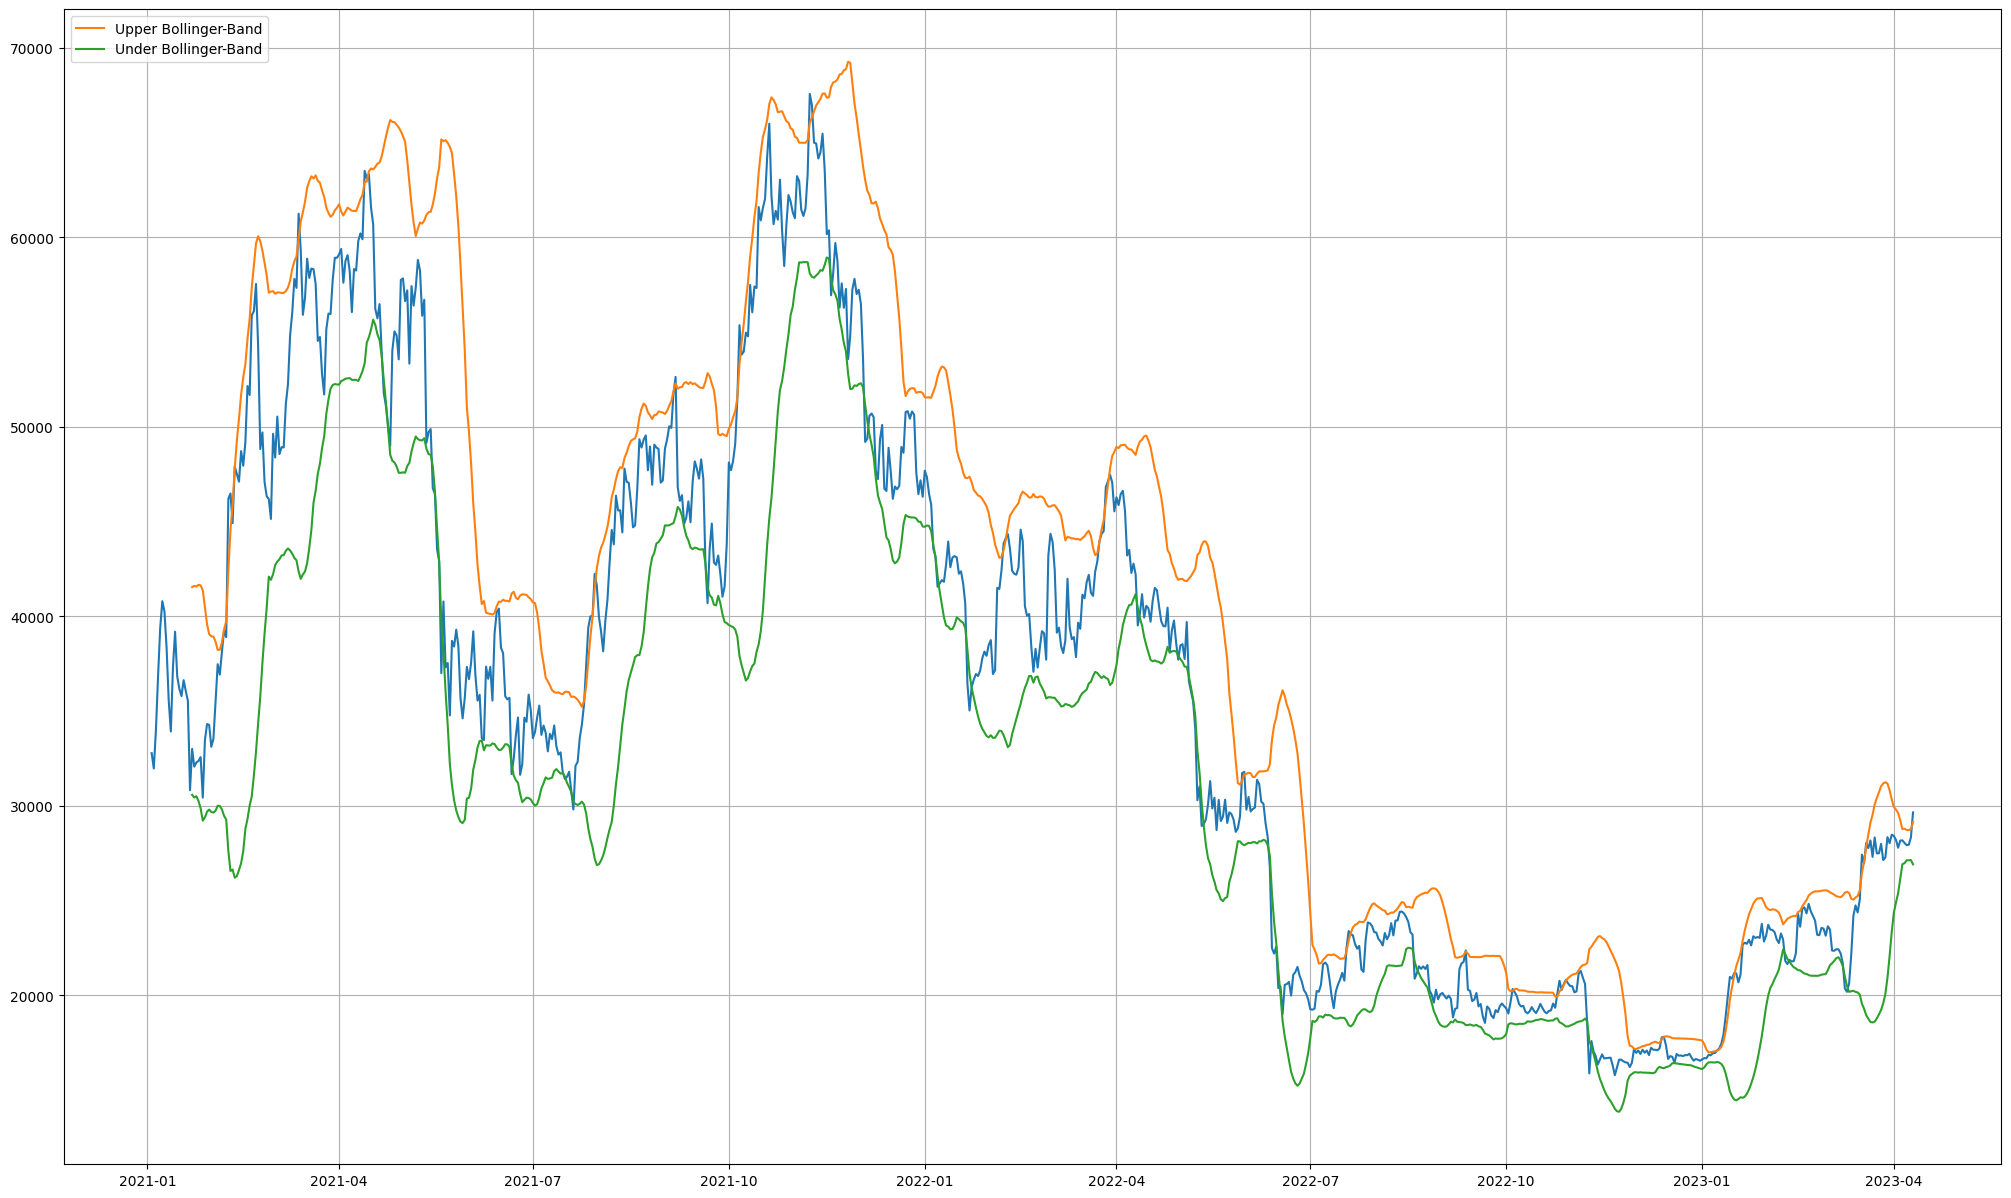


Percentage Of The Daily Price Change


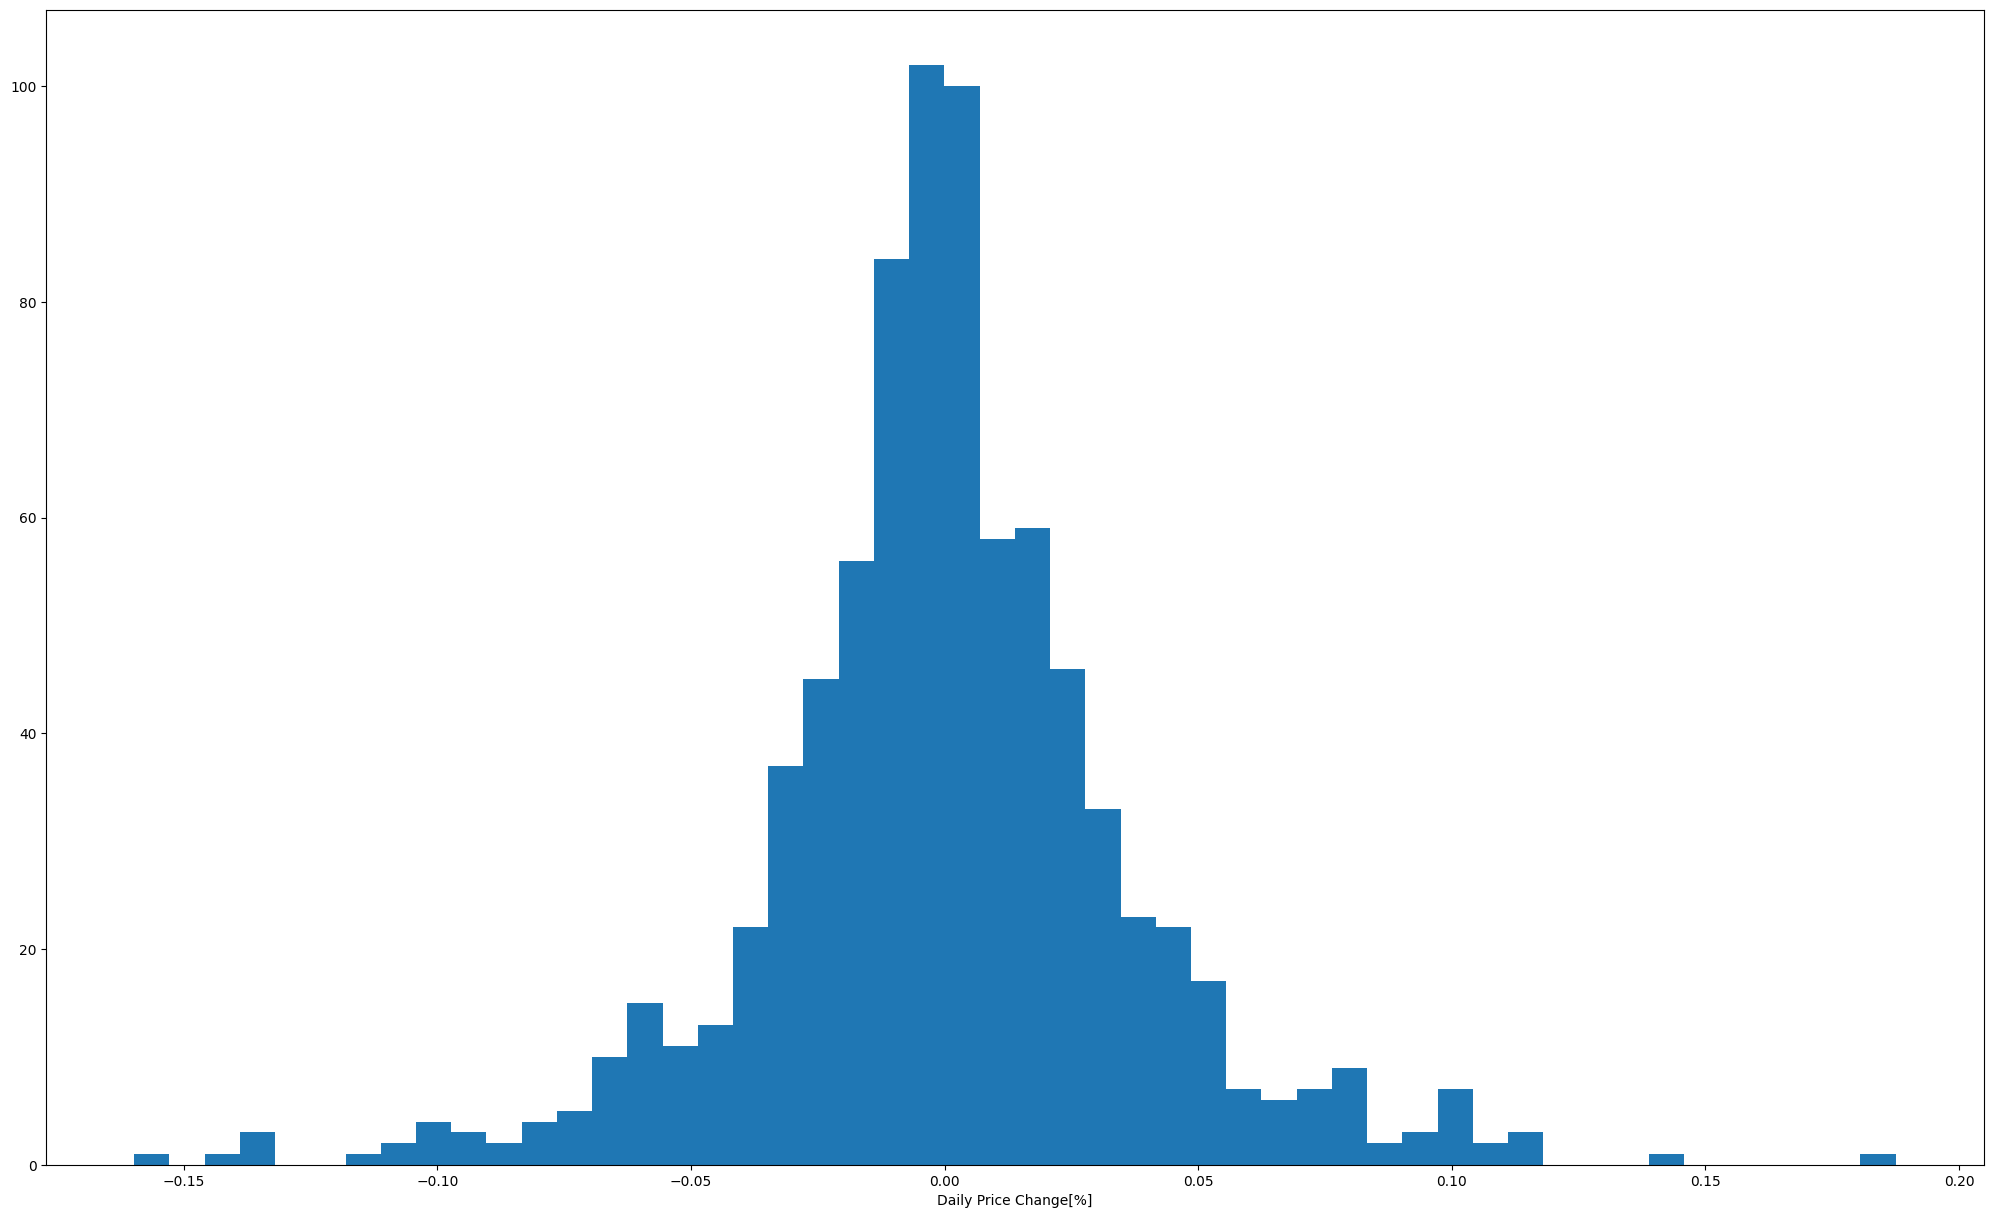


Correlation Between Volume And Adjusted Close


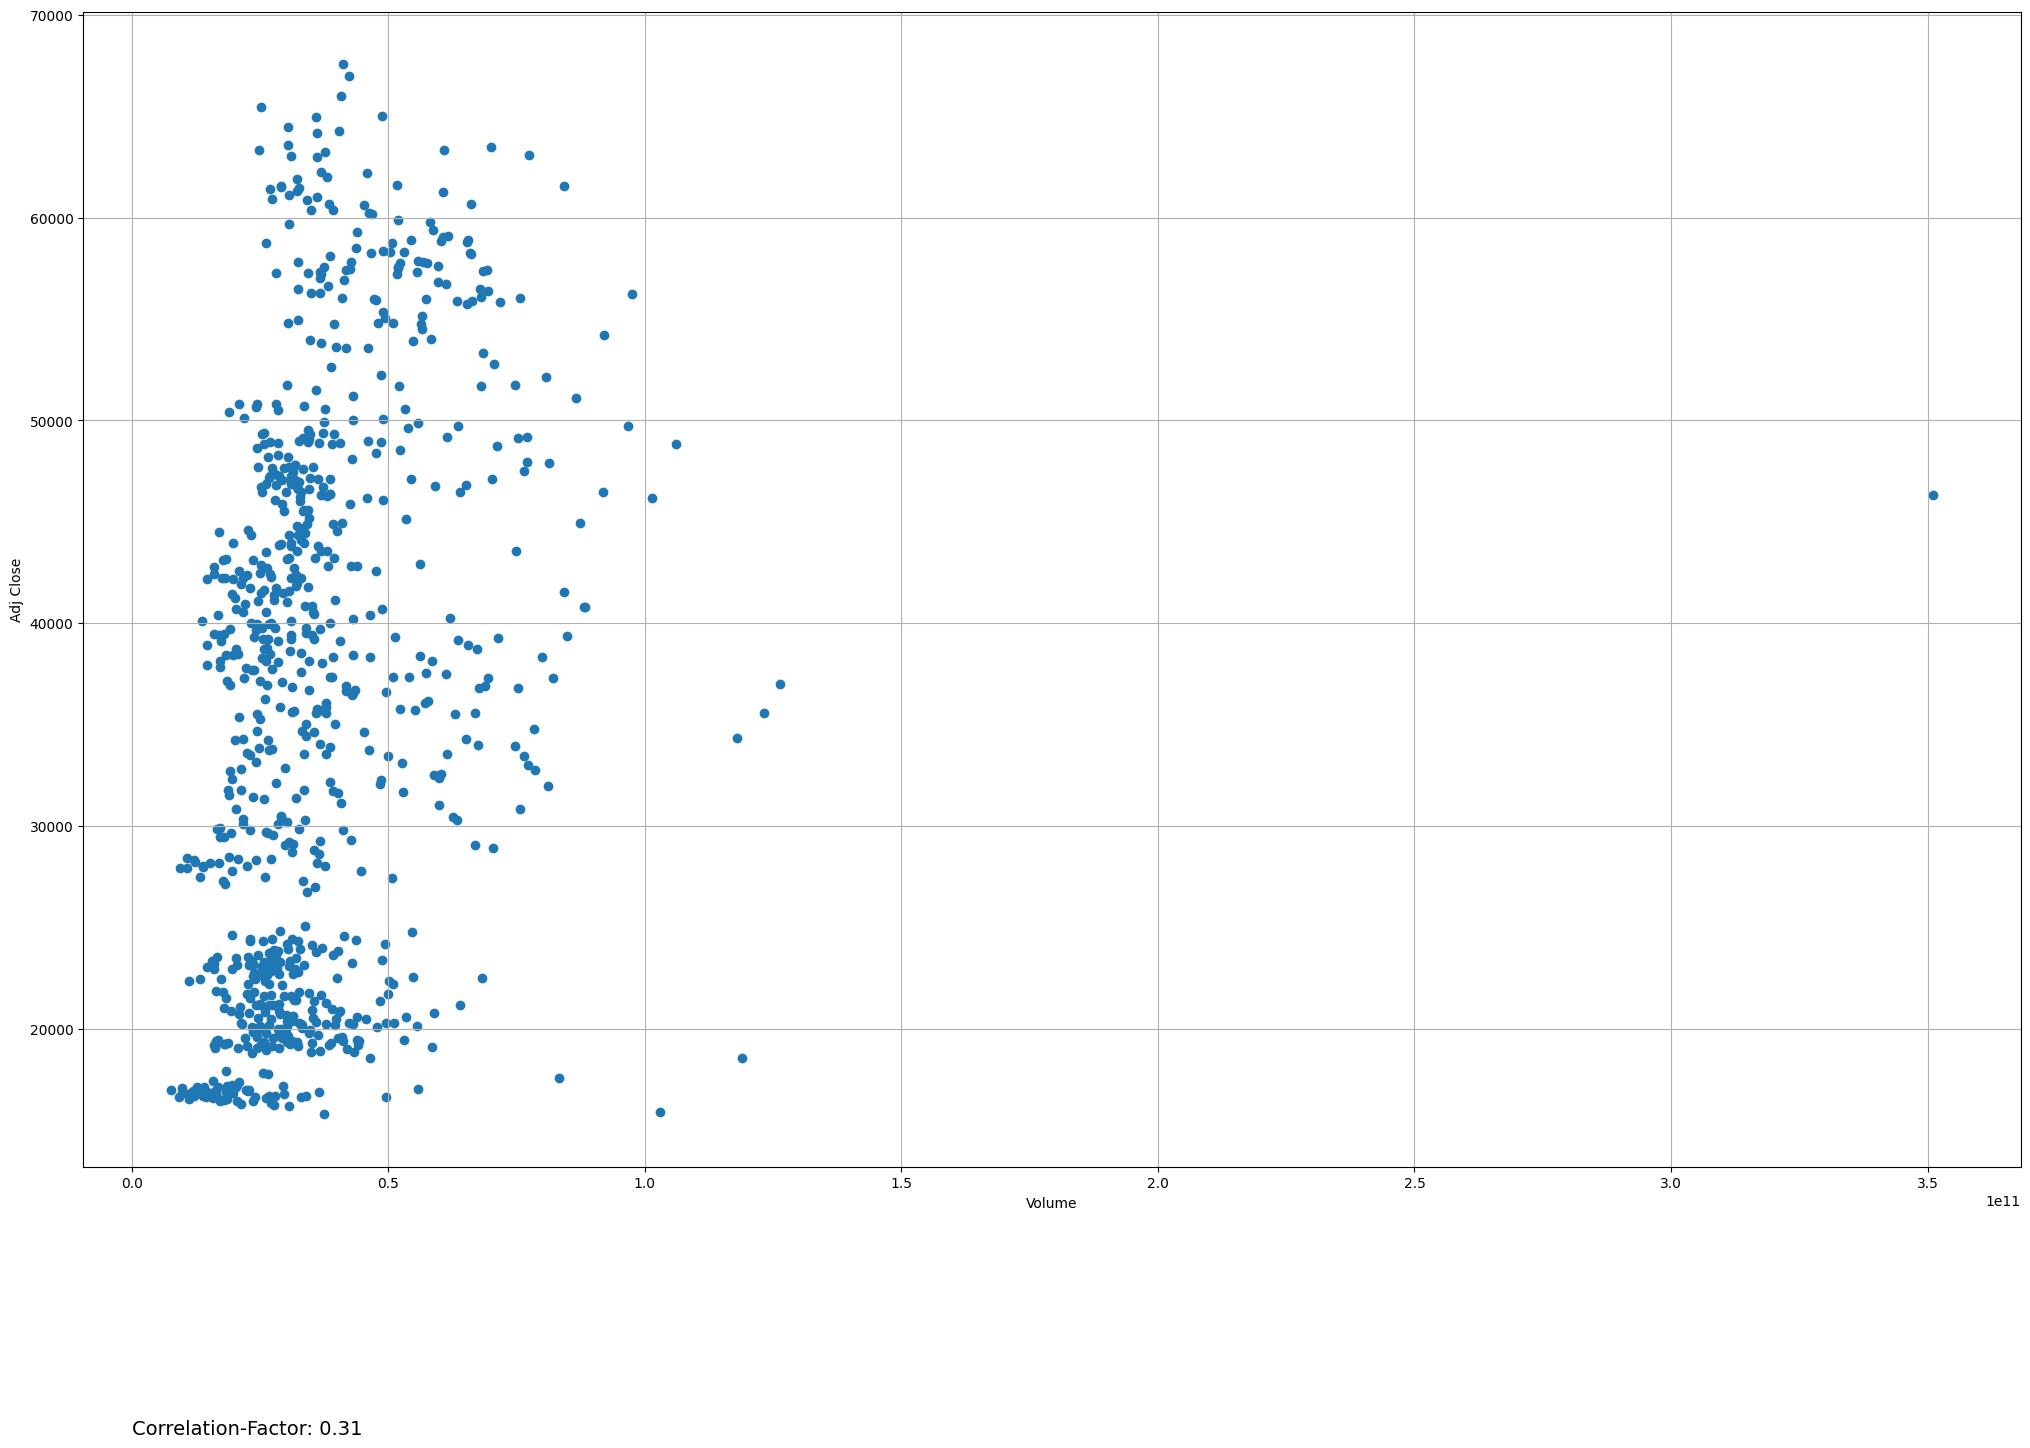


Monthly mean value of "Adjusted Close"


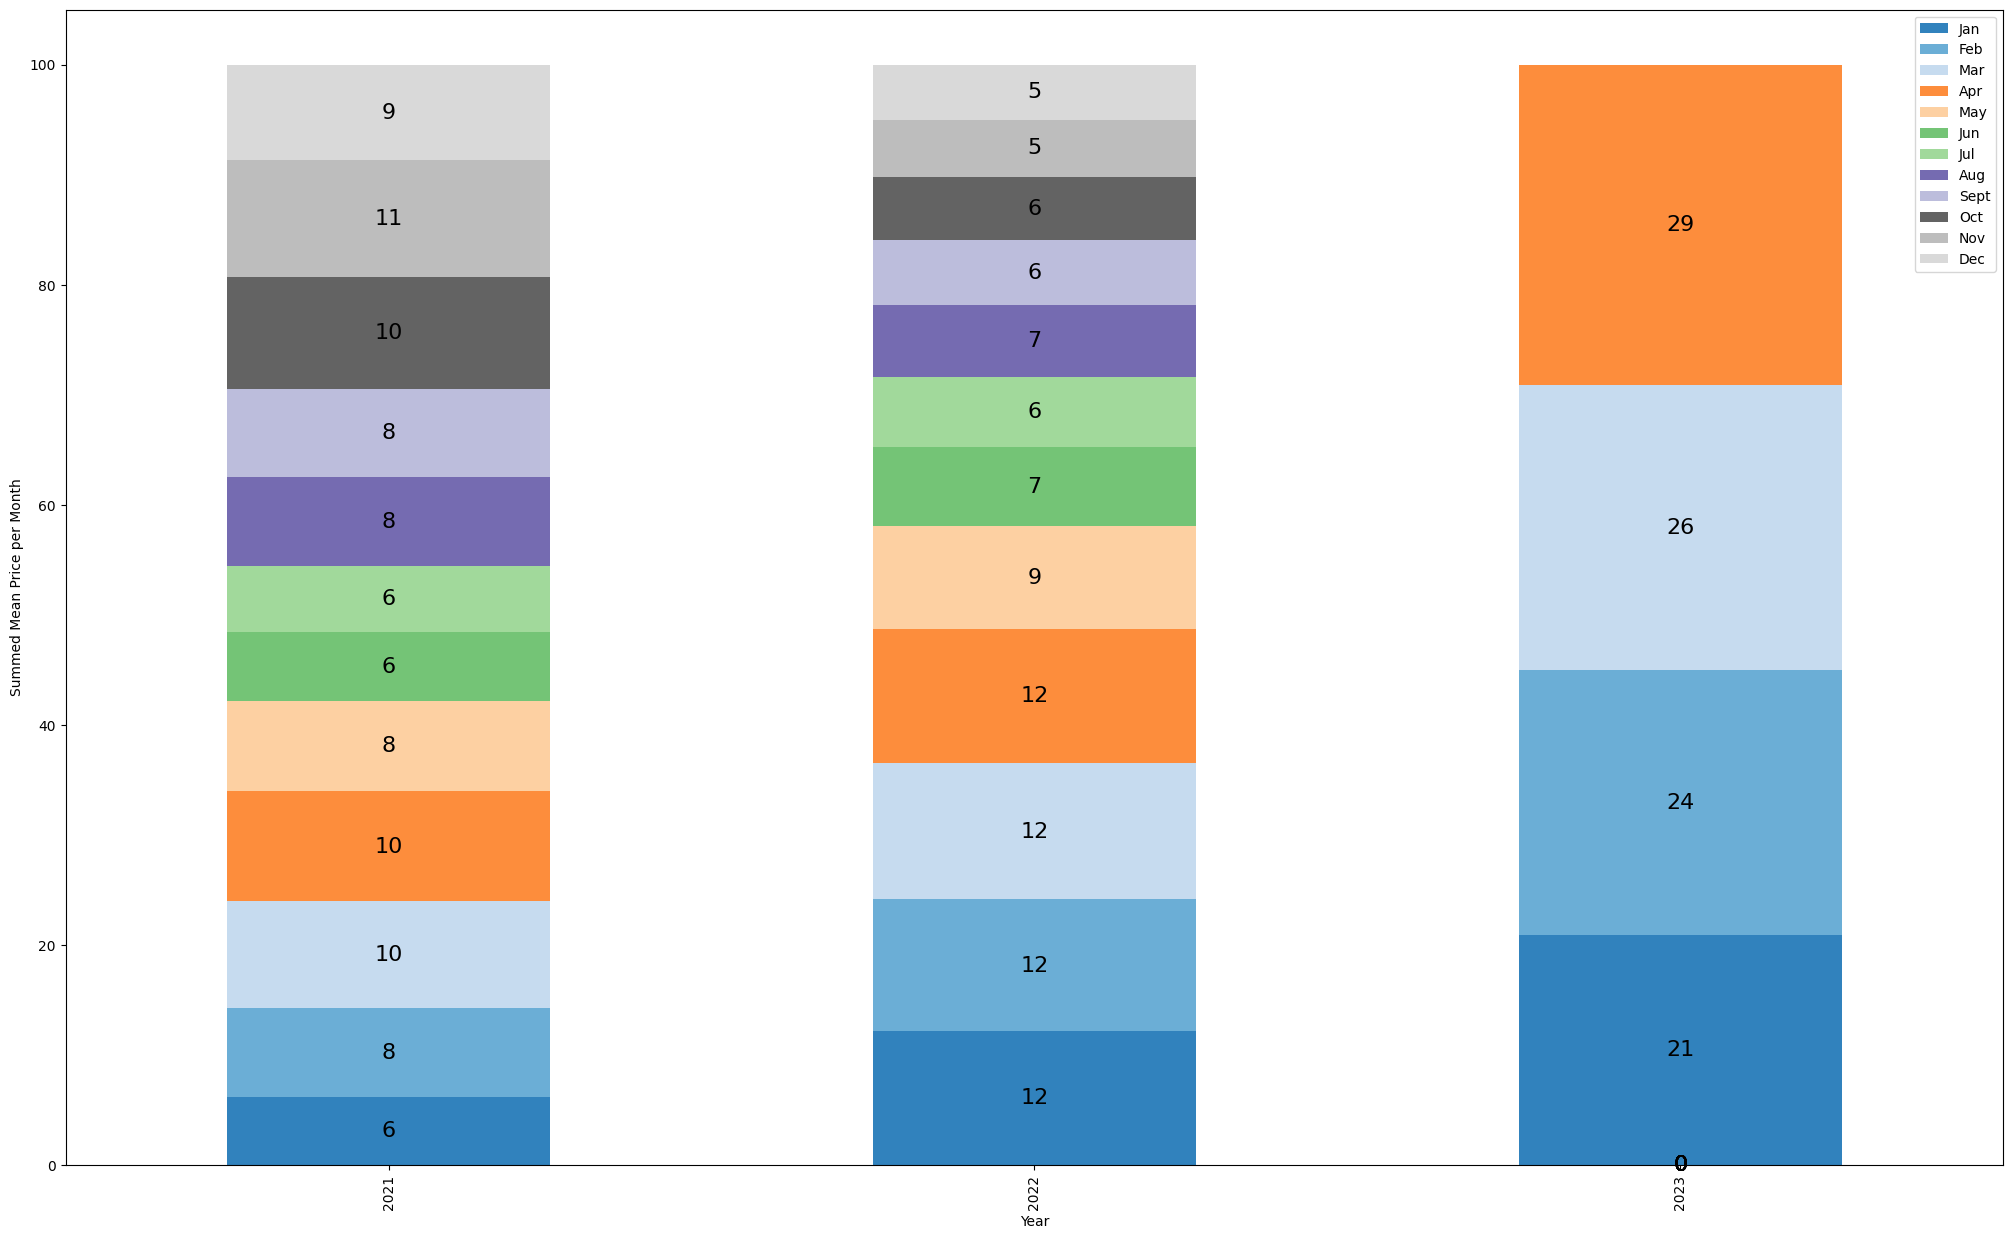

In [304]:
# show all relevant information for stock 'BTC-USD'
# first 5 rows of the df
print('BTC-USD')
print('Dataframe')
print(df_btc.head())
# shape of the df
print()
print('Number Rows & Columns')
print(df_btc.shape)
# statistical values
print()
print('Statistic Values')
print(df_btc.describe())
# nan values
print()
print('NaN Values')
print(df_btc.isna().sum())
# datatypes
print()
print('Data Types')
print(df_btc.dtypes)

# plotting all columns to get an overview about the data (outlier)
print()
print('Column Plots For Outlier Detection')
df_btc.plot(subplots=True, figsize=(25,15));
plt.show()

# plot high and low (as rolling averages) in one plot
print()
print('Rolling Mean')

# define area to calculate rolling average
window_size = 20

plt.figure(figsize=(25, 15))
# calculate the rolling average
rolling_mean_high = df_btc['High'].rolling(window_size).mean()
rolling_mean_low = df_btc['Low'].rolling(window_size).mean()

# plot rolling mean variants
plt.plot(rolling_mean_high, label="Rolling Mean High")
plt.plot(rolling_mean_low, label="Rolling Mean Low")
plt.legend(loc='upper left')
plt.ylabel('Stock Price Rolling Average')
plt.grid()
plt.show()

# plot open, close and adj close (as rolling averager) in one plot
plt.figure(figsize=(25, 15))

# calculate the rolling average
rolling_mean_open = df_btc['Open'].rolling(window_size).mean()
rolling_mean_close = df_btc['Close'].rolling(window_size).mean()
rolling_mean_adjclose = df_btc['Adj Close'].rolling(window_size).mean()

# plot rolling mean variants
plt.plot(rolling_mean_open, label="Rolling Mean Open")
plt.plot(rolling_mean_close, label="Rolling Mean Close")
plt.plot(rolling_mean_adjclose, label="Rolling Mean Adj Close")
plt.legend(loc='upper left')
plt.ylabel('Stock Price Rolling Average')
plt.grid()
plt.show()

# plot Bollinger-Band 
print()
print('Bollinger-Band')

# calculate the standard deviation
std = df_btc["Adj Close"].rolling(window=window_size).std()

# calculate Bollinger-Band 
upper_band = rolling_mean_adjclose + 2*std
lower_band = rolling_mean_adjclose - 2*std

plt.figure(figsize=(25, 15))
plt.plot(df_btc.index, df_btc['Adj Close'])
plt.plot(upper_band, label="Upper Bollinger-Band")
plt.plot(lower_band, label="Under Bollinger-Band")
plt.legend(loc='upper left')
plt.grid()
plt.show()

# plot the percentage of the daily price change
print()
print('Percentage Of The Daily Price Change')
# calculate the percentage of the daily price change
daily_pct_change = df_btc['Adj Close'].pct_change()

plt.figure(figsize=(25, 15))
# histogram for the daily price change
daily_pct_change.hist(bins=50)
plt.xlabel('Daily Price Change[%]')
plt.grid()
plt.show()

# plot correlation between volume and adjusted close
print()
print('Correlation Between Volume And Adjusted Close')

plt.figure(figsize=(25, 15))
# scatter plot for correlation
plt.scatter(df_btc['Volume'], df_btc['Adj Close'])
plt.text(
    10, 15, 'Correlation-Factor: '+str(
        round(np.corrcoef(df_btc['Volume'],df_btc['Adj Close'])[1][0],2)
    ), fontsize=14
)

plt.grid()
plt.xlabel('Volume')
plt.ylabel('Adj Close')
plt.show()

# plot the monthly mean value of 'Adjusted Close'
print()
print('Monthly mean value of "Adjusted Close"')

# list with all month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# calculate the mean price per month
monthly_mean = df_btc['Adj Close'].resample('M').mean()

# create list with all years
year = monthly_mean.index.year.unique().tolist()

# create new empty dataframe to fill with the means per year and month
new_df = pd.DataFrame(index=year, columns=sorted(monthly_mean.index.month.unique().tolist()))

# fill nan with 0
new_df.fillna(0)

#fill the new df with the means
for row, date in enumerate(monthly_mean.index):
    new_df.loc[date.year, date.month] = monthly_mean[row]

# calculate the precantage
percent_df = new_df.div(new_df.sum(axis=1), axis=0) * 100

# plot a stacked bar chart with percentages
ax = percent_df.plot(kind='bar', stacked=True, figsize=(25,15), colormap='tab20c')

# loop through each bar
for i in ax.containers:
    # loop through the bar stacks
    for j in i:
        # define the position of the text
        x = j.get_x() + j.get_width() / 2
        y = j.get_y() + j.get_height() / 2
        value = j.get_height()
        # show text
        ax.text(x, y, round(value), ha='center', va='center', fontsize=16, color='black')

plt.xlabel('Year')
plt.ylabel('Summed Mean Price per Month')
plt.legend(labels=months)
plt.show()

JNJ
Dataframe
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-05-13  85.559998  86.070000  85.440002  85.849998  65.444237   6631500
2013-05-14  85.760002  87.080002  85.760002  86.970001  66.298019  10360700
2013-05-15  86.940002  87.879997  86.940002  87.639999  66.808746  13444400
2013-05-16  87.330002  87.769997  87.059998  87.449997  66.663910   9441900
2013-05-17  87.470001  88.199997  87.410004  88.089996  67.151810  11437700

Number Rows & Columns
(2496, 6)

Statistic Values
              Open         High          Low        Close    Adj Close  \
count  2496.000000  2496.000000  2496.000000  2496.000000  2496.000000   
mean    130.827348   131.738530   129.875926   130.837732   116.747412   
std      26.672819    26.918331    26.434732    26.673692    32.206361   
min      82.919998    84.320000    81.790001    82.620003    63.455418   
25%     104.619997   105.252502  

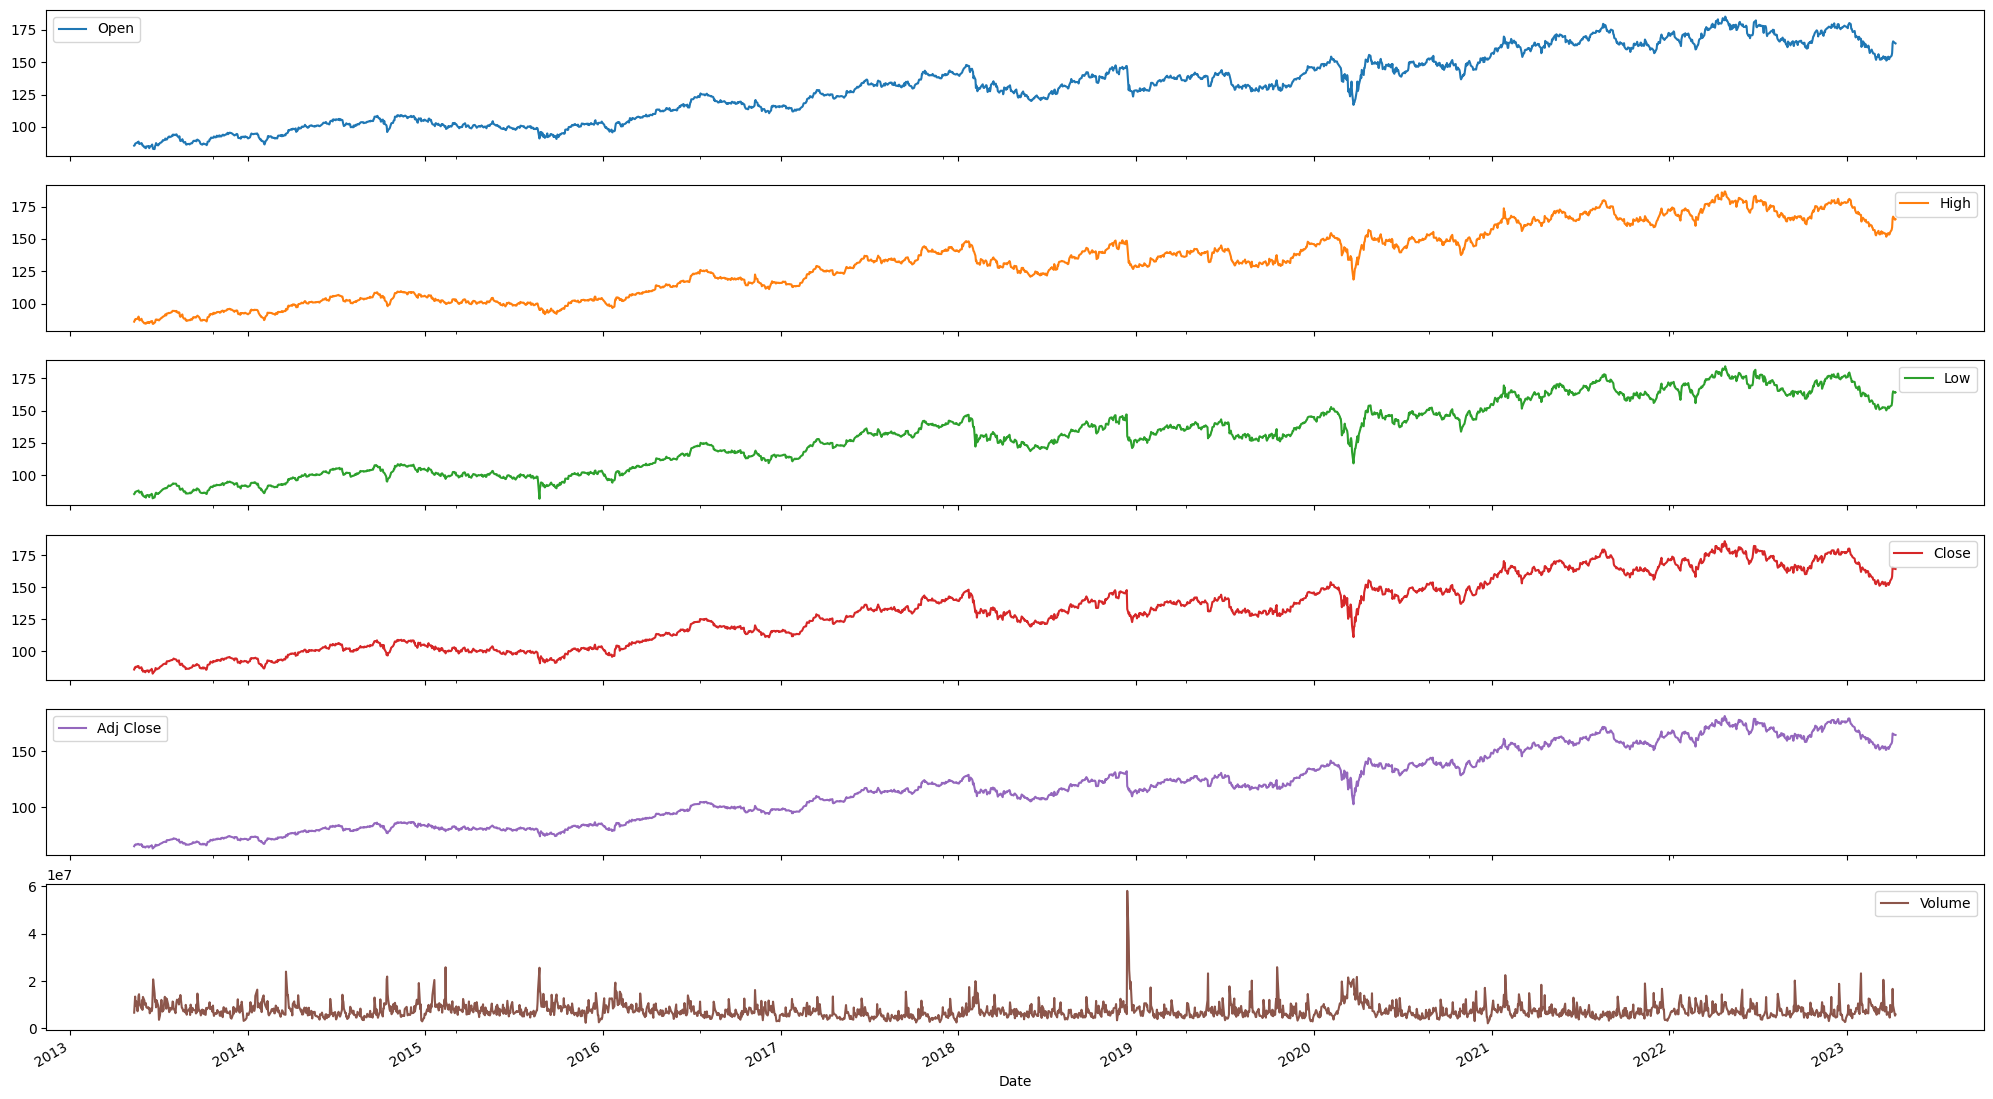


Rolling Mean


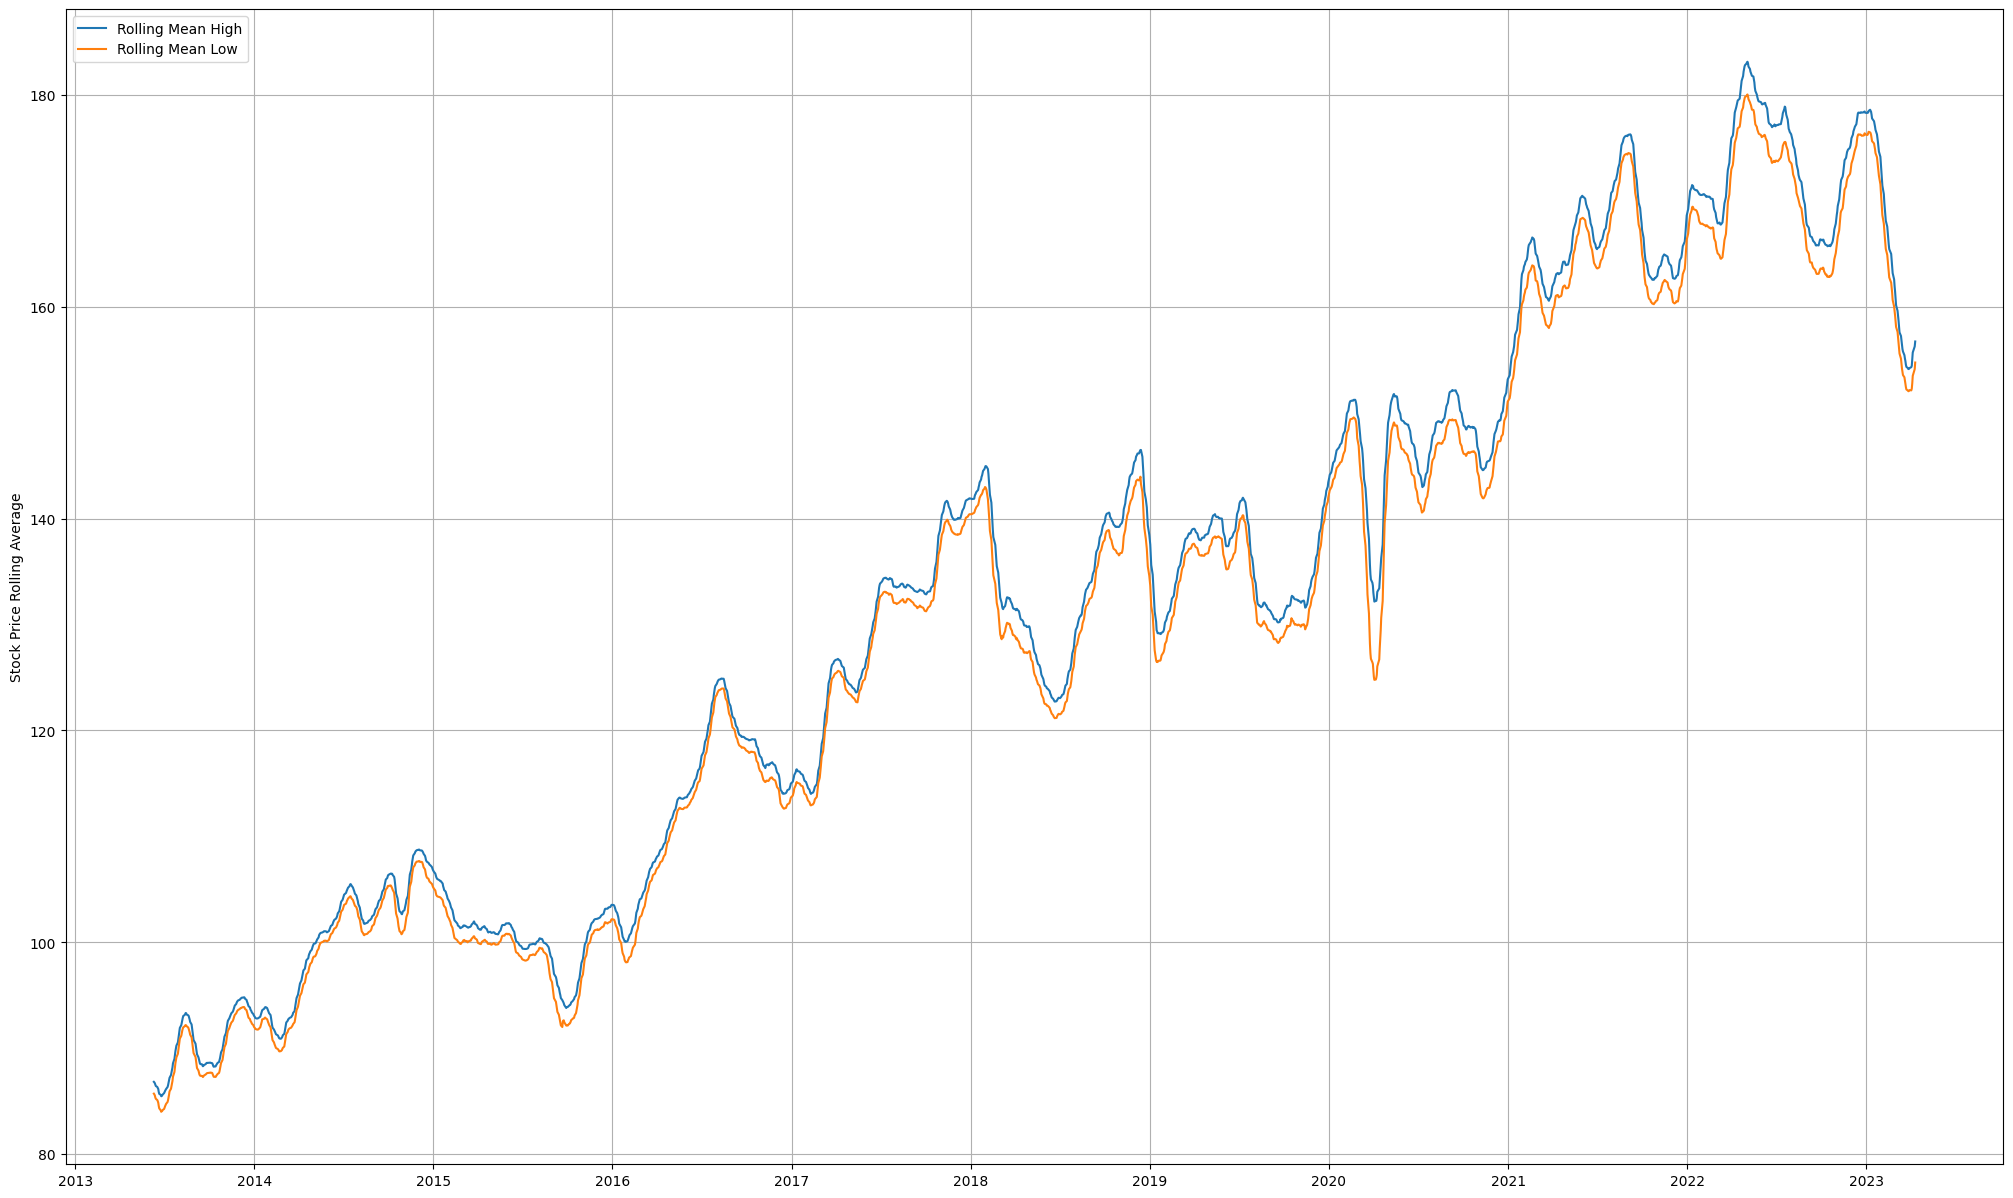

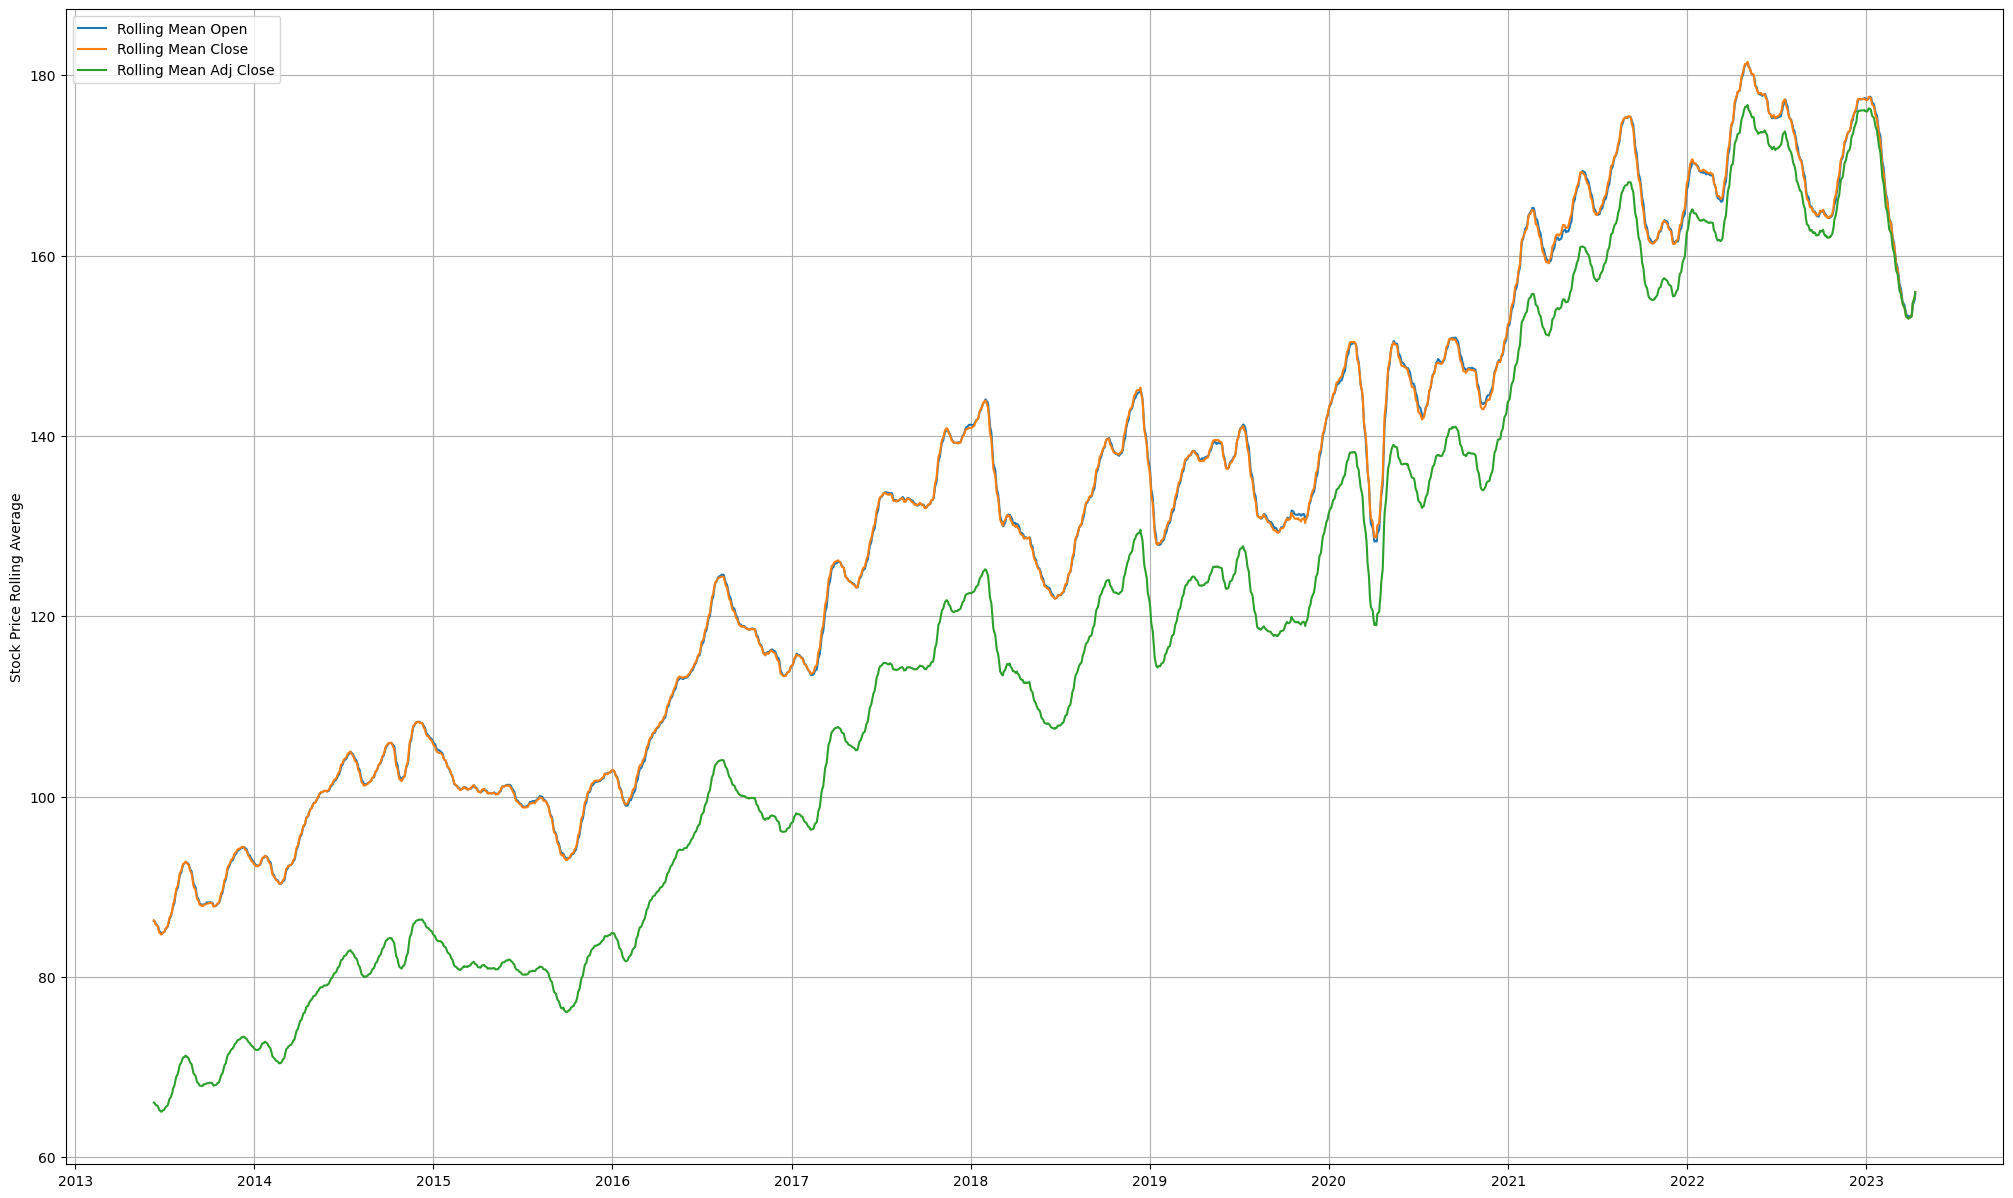


Bollinger-Band


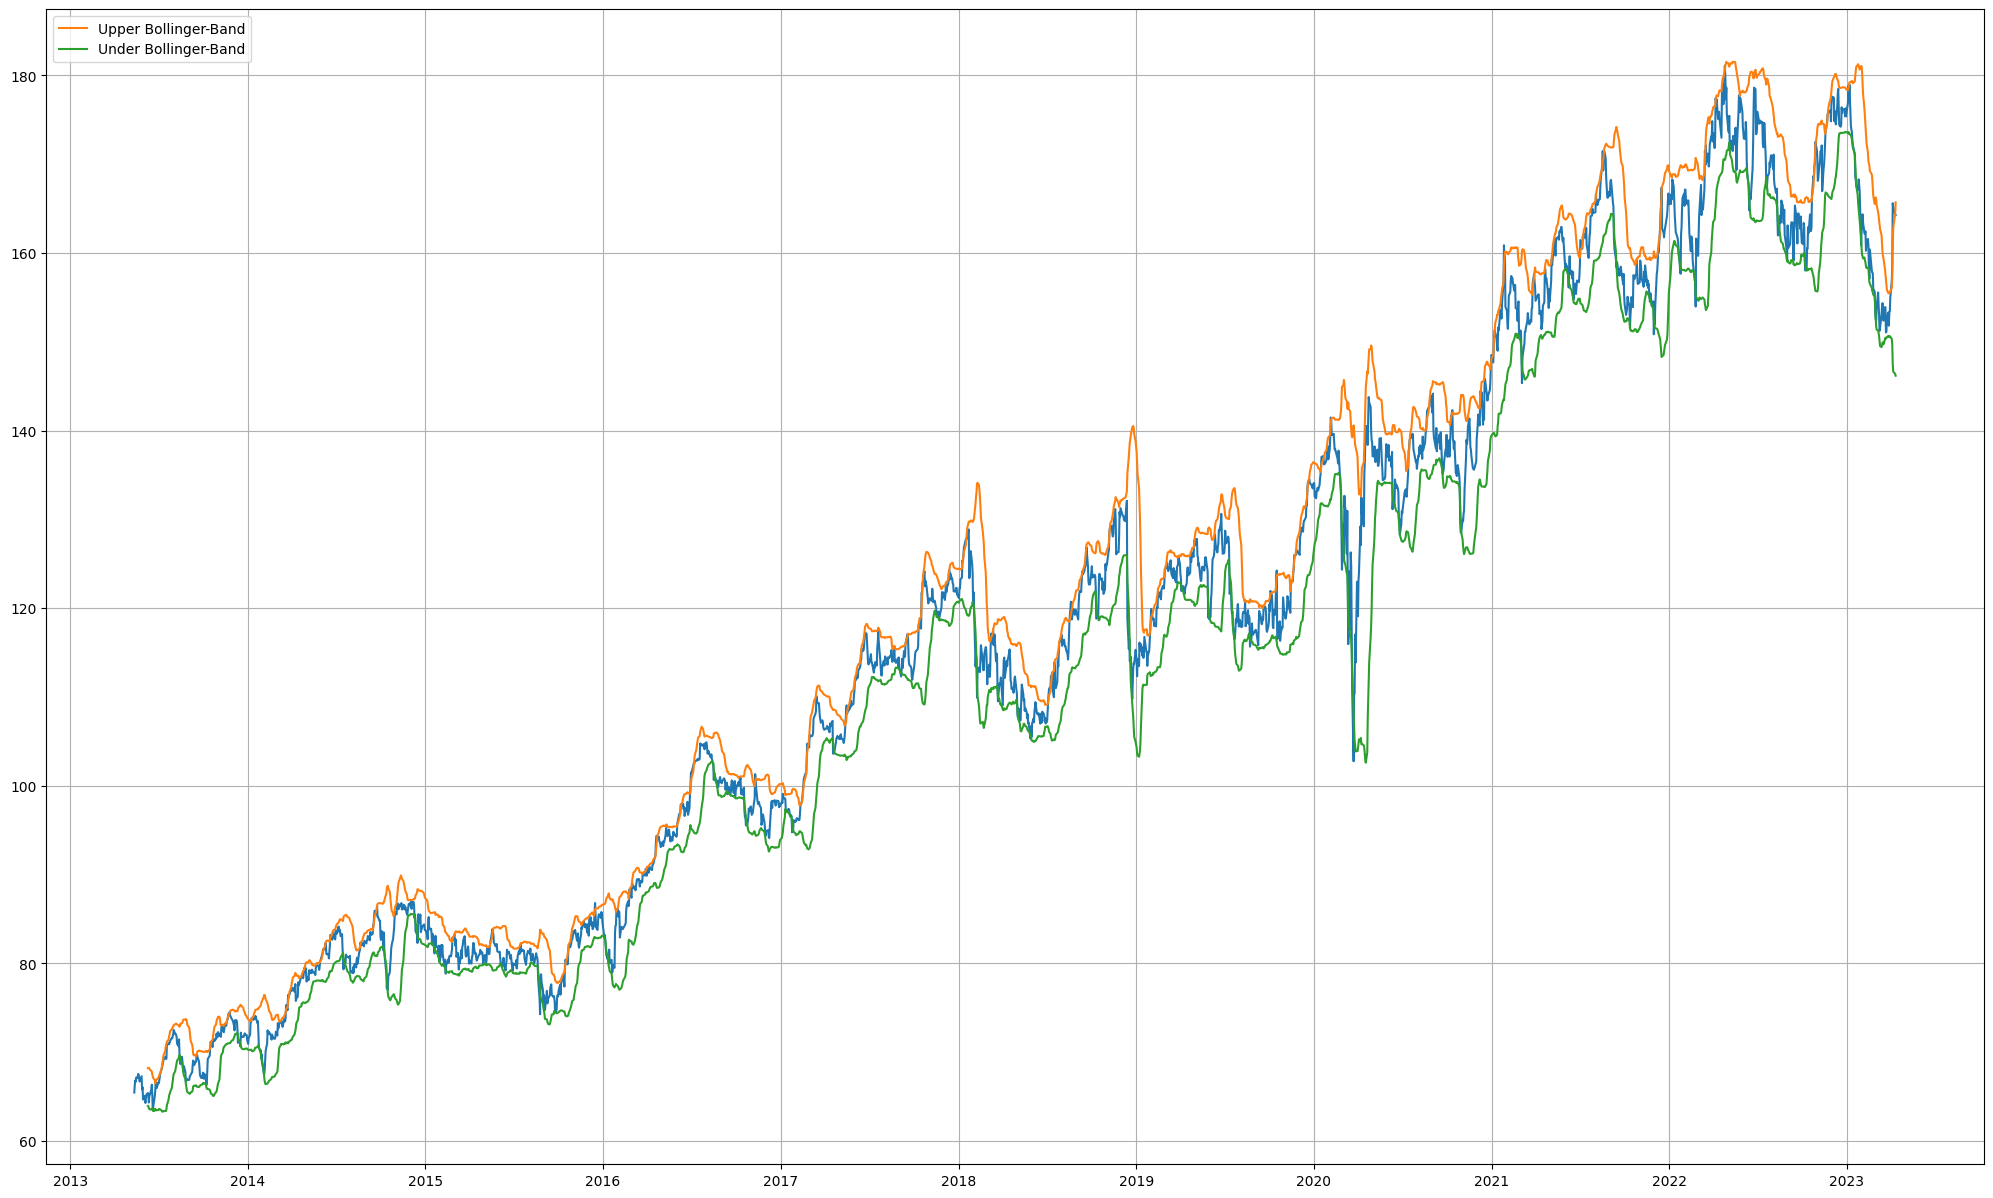


Percentage Of The Daily Price Change


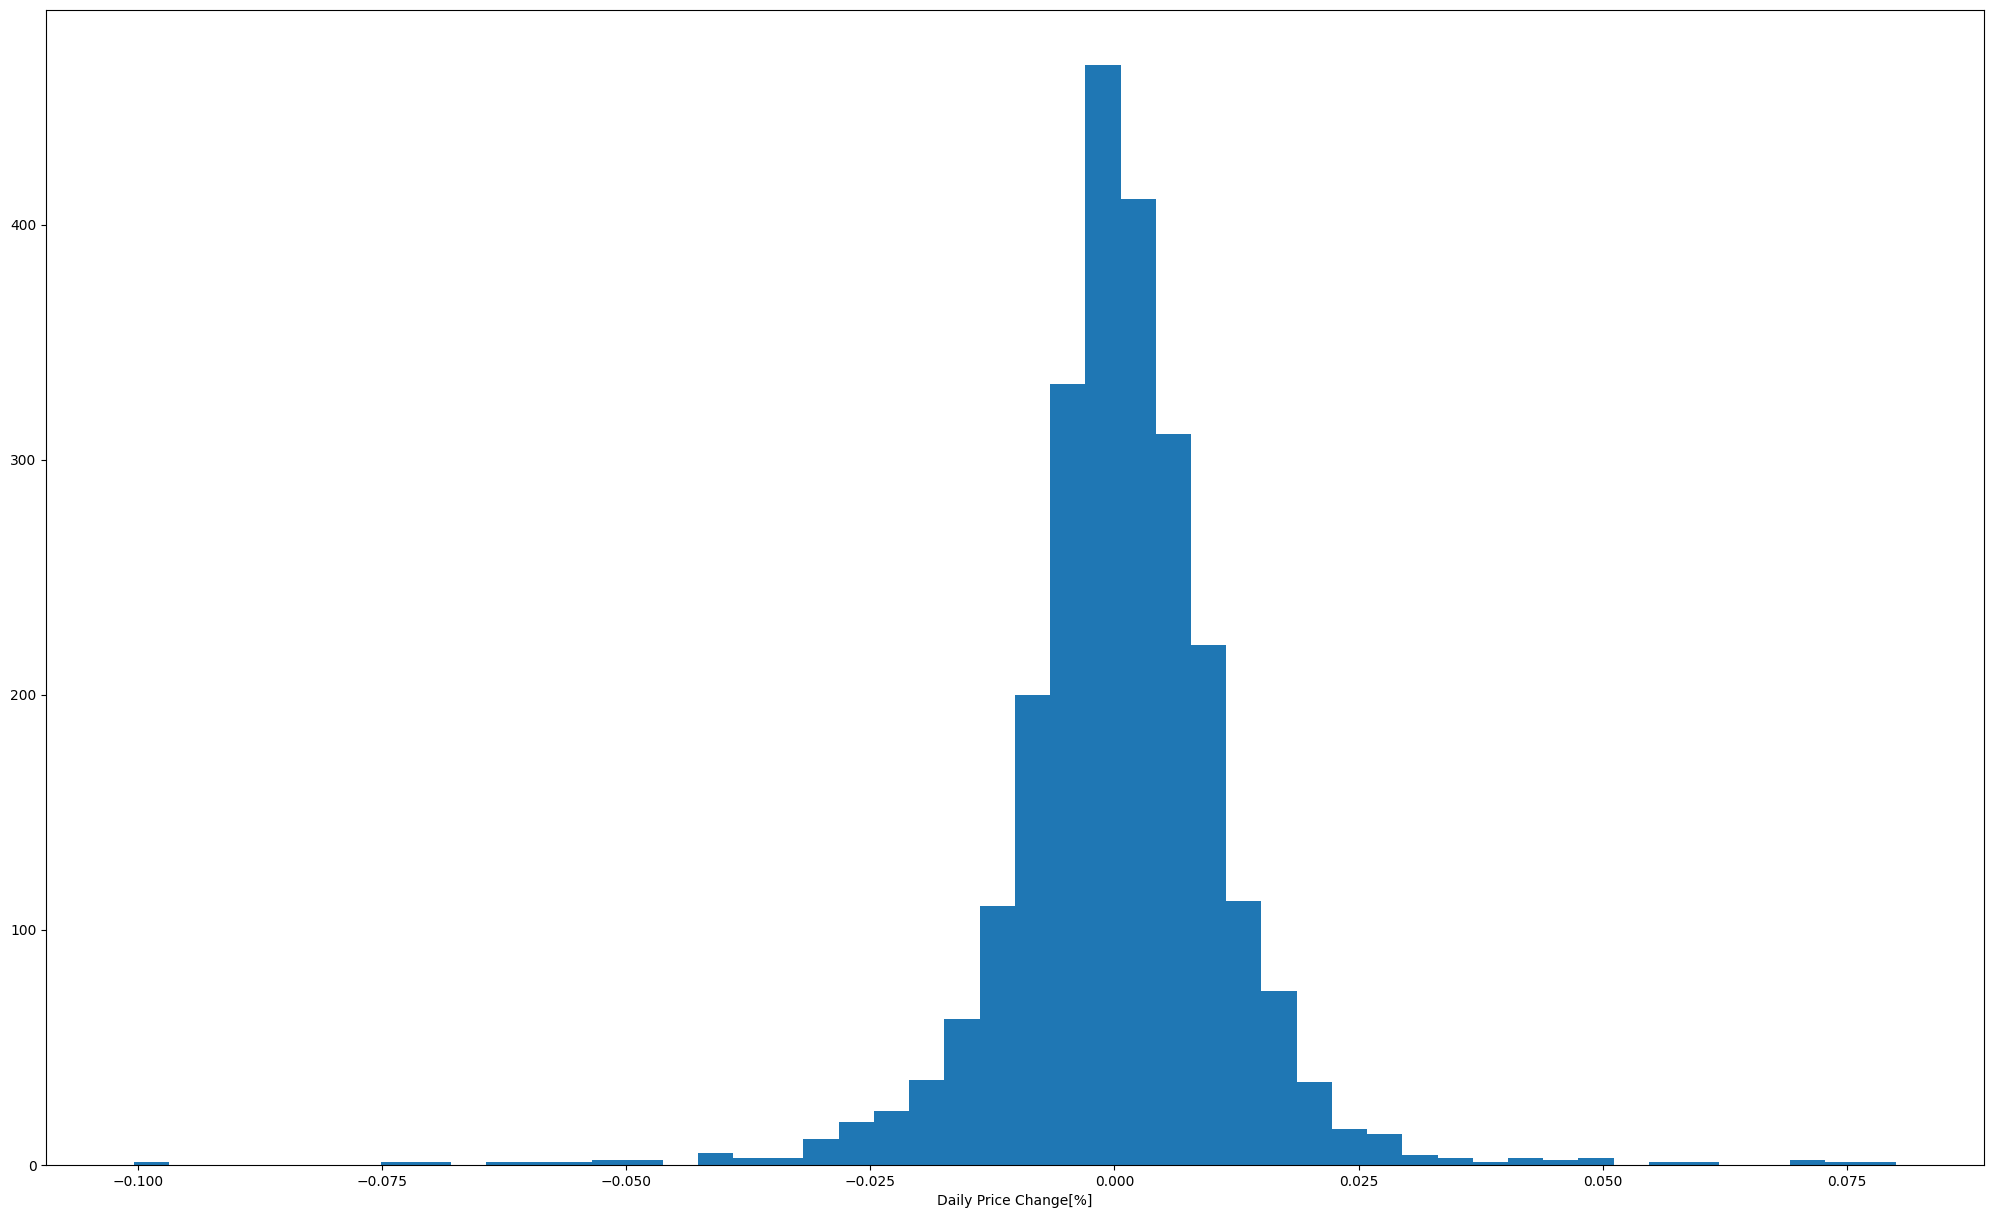


Correlation Between Volume And Adjusted Close


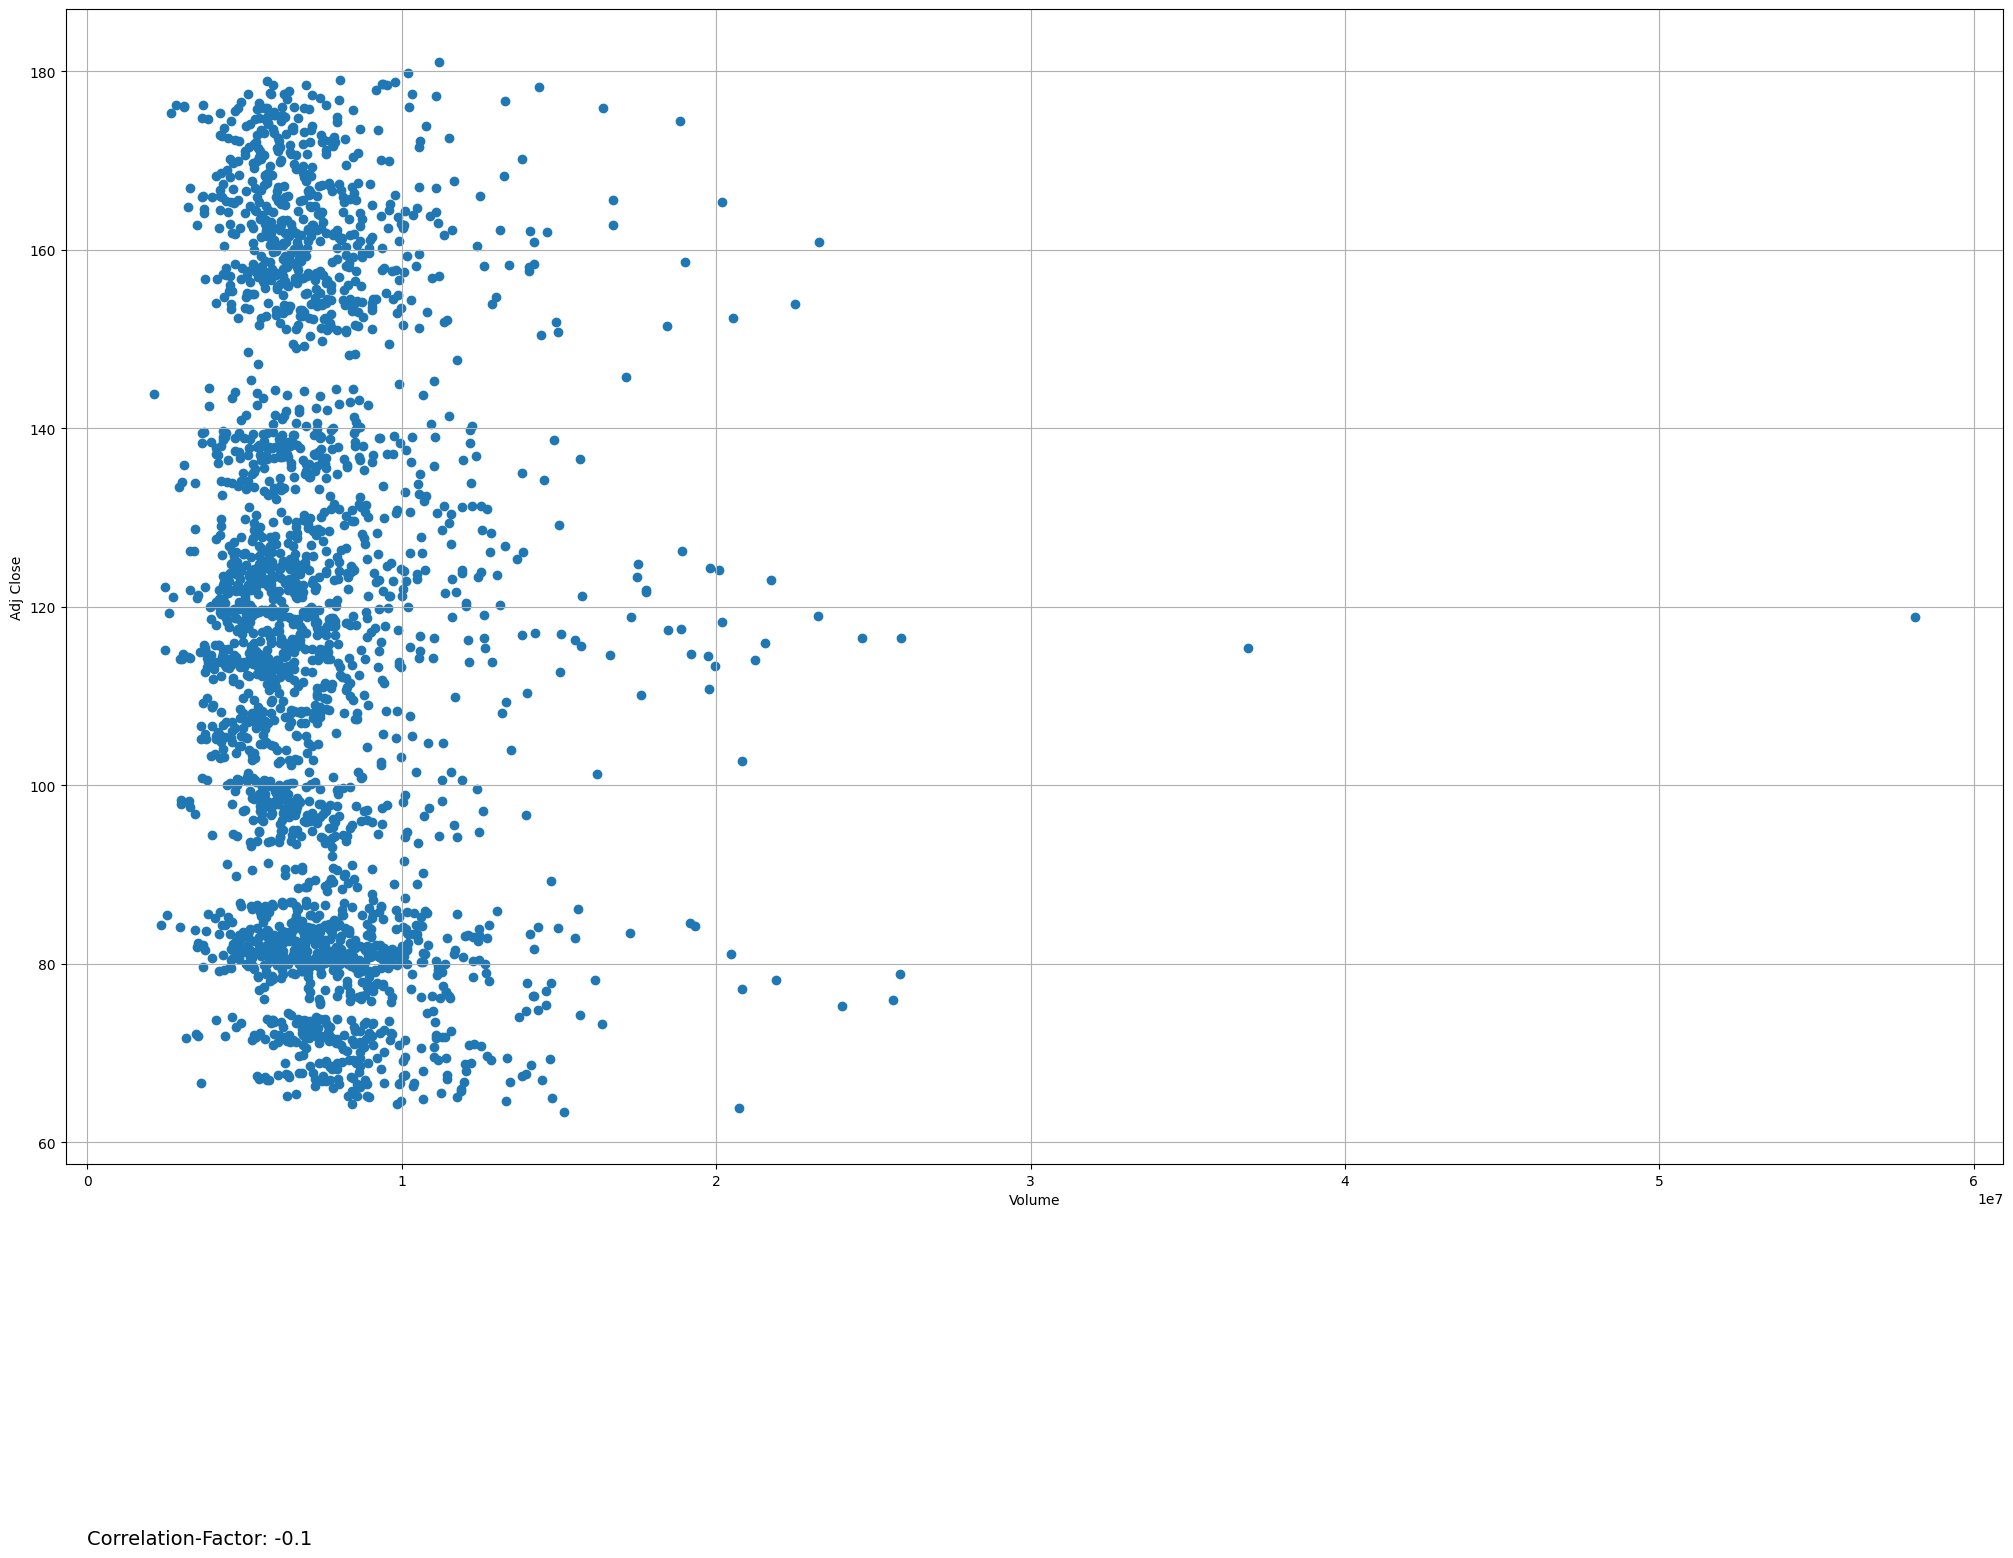


Monthly mean value of "Adjusted Close"


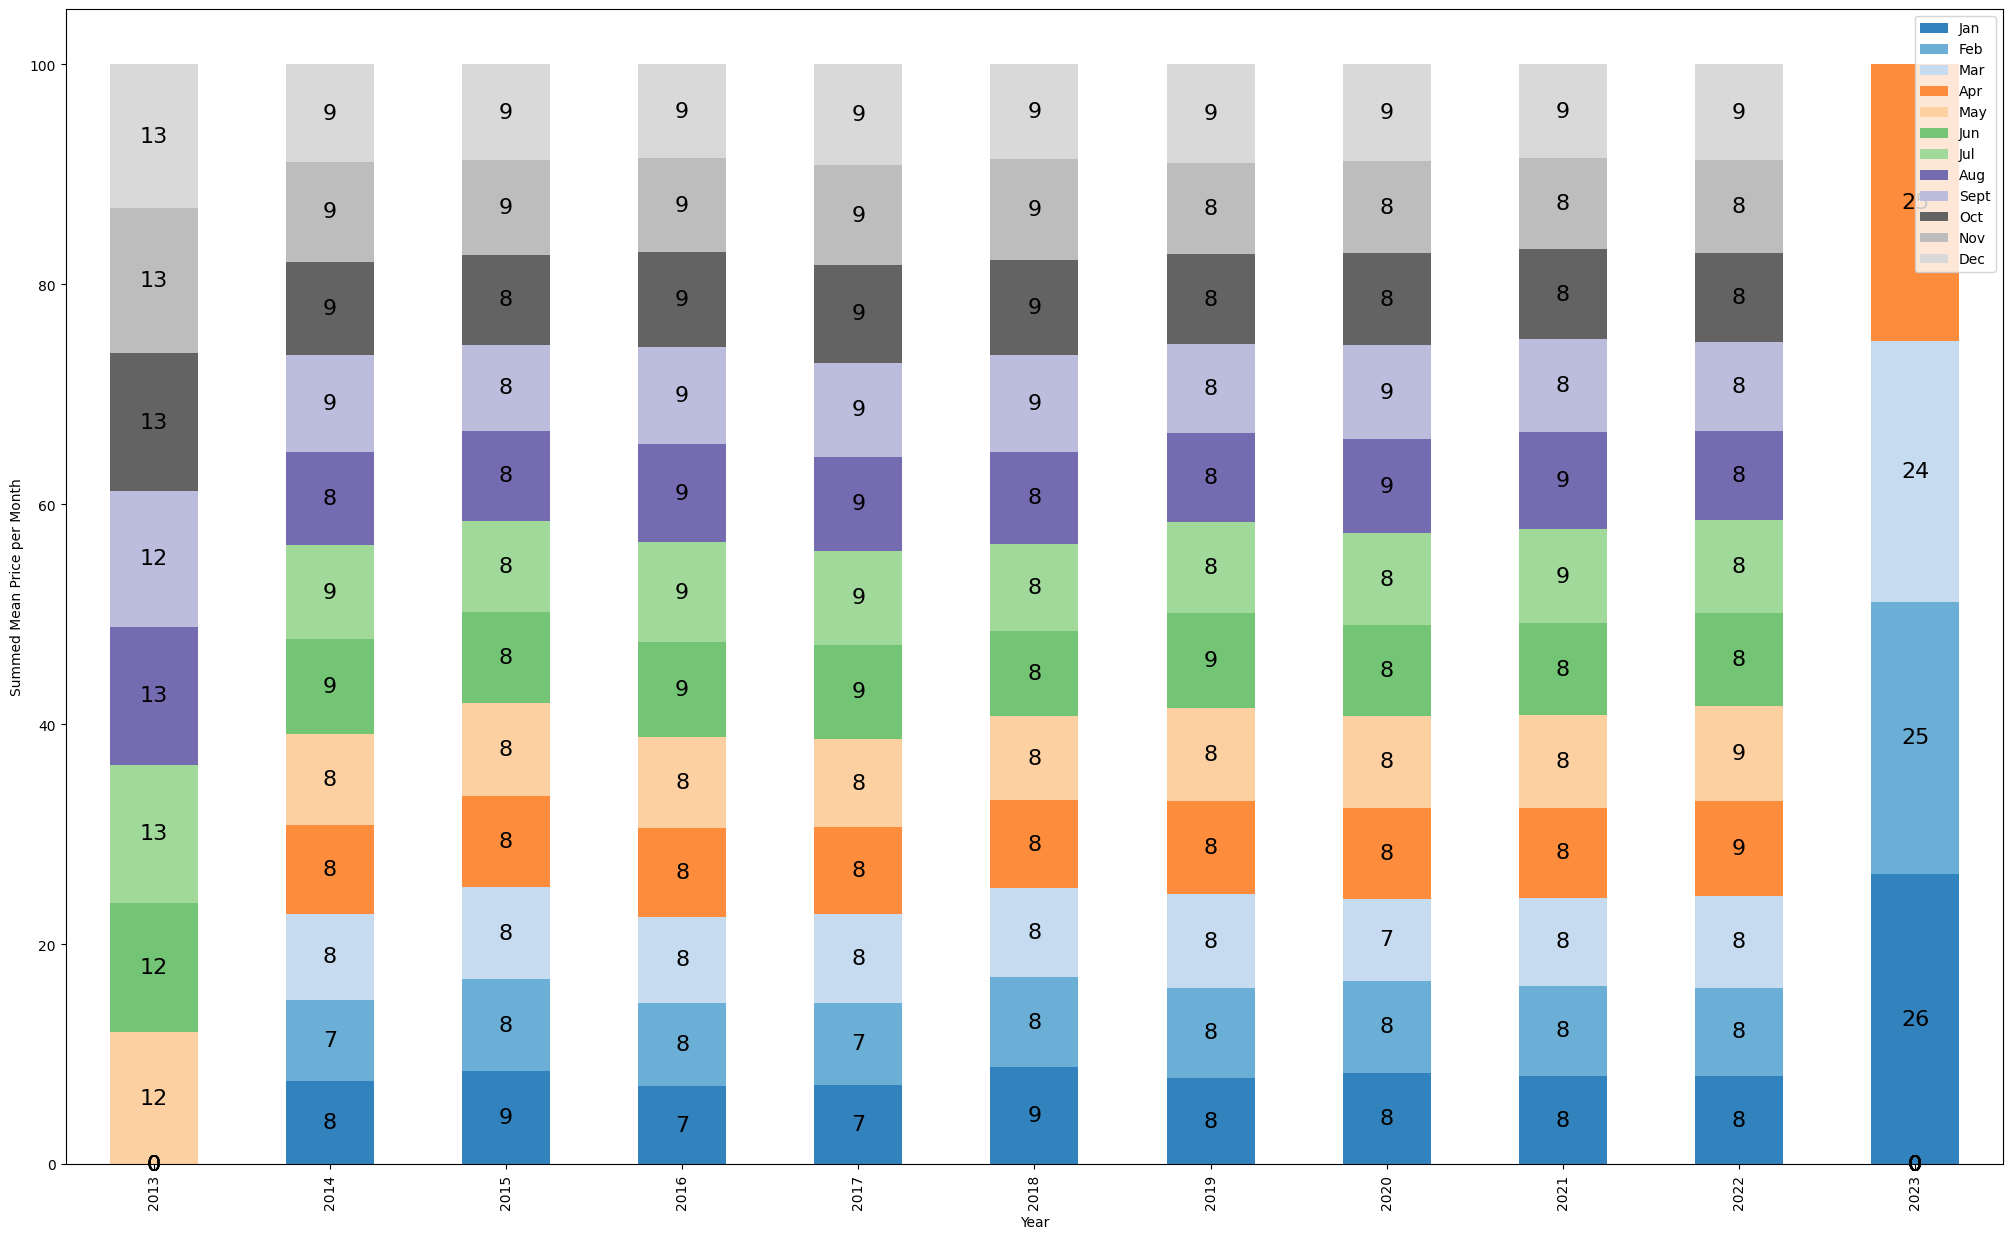

In [305]:
# show all relevant information for stock 'JNJ'
# first 5 rows of the df
print('JNJ')
print('Dataframe')
print(df_jnj.head())
# shape of the df
print()
print('Number Rows & Columns')
print(df_jnj.shape)
# statistical values
print()
print('Statistic Values')
print(df_jnj.describe())
# nan values
print()
print('NaN Values')
print(df_jnj.isna().sum())
# datatypes
print()
print('Data Types')
print(df_jnj.dtypes)

# plotting all columns to get an overview about the data (outlier)
print()
print('Column Plots For Outlier Detection')
df_jnj.plot(subplots=True, figsize=(25,15));
plt.show()

# plot high and low (as rolling averages) in one plot
print()
print('Rolling Mean')

# define area to calculate rolling average
window_size = 20

plt.figure(figsize=(25, 15))
# calculate the rolling average
rolling_mean_high = df_jnj['High'].rolling(window_size).mean()
rolling_mean_low = df_jnj['Low'].rolling(window_size).mean()

# plot rolling mean variants
plt.plot(rolling_mean_high, label="Rolling Mean High")
plt.plot(rolling_mean_low, label="Rolling Mean Low")
plt.legend(loc='upper left')
plt.ylabel('Stock Price Rolling Average')
plt.grid()
plt.show()

# plot open, close and adj close (as rolling averager) in one plot
plt.figure(figsize=(25, 15))

# calculate the rolling average
rolling_mean_open = df_jnj['Open'].rolling(window_size).mean()
rolling_mean_close = df_jnj['Close'].rolling(window_size).mean()
rolling_mean_adjclose = df_jnj['Adj Close'].rolling(window_size).mean()

# plot rolling mean variants
plt.plot(rolling_mean_open, label="Rolling Mean Open")
plt.plot(rolling_mean_close, label="Rolling Mean Close")
plt.plot(rolling_mean_adjclose, label="Rolling Mean Adj Close")
plt.legend(loc='upper left')
plt.ylabel('Stock Price Rolling Average')
plt.grid()
plt.show()

# plot Bollinger-Band 
print()
print('Bollinger-Band')

# calculate the standard deviation
std = df_jnj["Adj Close"].rolling(window=window_size).std()

# calculate Bollinger-Band 
upper_band = rolling_mean_adjclose + 2*std
lower_band = rolling_mean_adjclose - 2*std

plt.figure(figsize=(25, 15))
plt.plot(df_jnj.index, df_jnj['Adj Close'])
plt.plot(upper_band, label="Upper Bollinger-Band")
plt.plot(lower_band, label="Under Bollinger-Band")
plt.legend(loc='upper left')
plt.grid()
plt.show()

# plot the percentage of the daily price change
print()
print('Percentage Of The Daily Price Change')
# calculate the percentage of the daily price change
daily_pct_change = df_jnj['Adj Close'].pct_change()

plt.figure(figsize=(25, 15))
# histogram for the daily price change
daily_pct_change.hist(bins=50)
plt.xlabel('Daily Price Change[%]')
plt.grid()
plt.show()

# plot correlation between volume and adjusted close
print()
print('Correlation Between Volume And Adjusted Close')

plt.figure(figsize=(25, 15))
# scatter plot for correlation
plt.scatter(df_jnj['Volume'], df_jnj['Adj Close'])
plt.text(
    10, 15, 'Correlation-Factor: '+str(
        round(np.corrcoef(df_jnj['Volume'],df_jnj['Adj Close'])[1][0],2)
    ), fontsize=14
)

plt.grid()
plt.xlabel('Volume')
plt.ylabel('Adj Close')
plt.show()

# plot the monthly mean value of 'Adjusted Close'
print()
print('Monthly mean value of "Adjusted Close"')

# list with all month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# calculate the mean price per month
monthly_mean = df_jnj['Adj Close'].resample('M').mean()

# create list with all years
year = monthly_mean.index.year.unique().tolist()

# create new empty dataframe to fill with the means per year and month
new_df = pd.DataFrame(index=year, columns=sorted(monthly_mean.index.month.unique().tolist()))

# fill nan with 0
new_df.fillna(0)

#fill the new df with the means
for row, date in enumerate(monthly_mean.index):
    new_df.loc[date.year, date.month] = monthly_mean[row]

# calculate the precantage
percent_df = new_df.div(new_df.sum(axis=1), axis=0) * 100

# plot a stacked bar chart with percentages
ax = percent_df.plot(kind='bar', stacked=True, figsize=(25,15), colormap='tab20c')

# loop through each bar
for i in ax.containers:
    # loop through the bar stacks
    for j in i:
        # define the position of the text
        x = j.get_x() + j.get_width() / 2
        y = j.get_y() + j.get_height() / 2
        value = j.get_height()
        # show text
        ax.text(x, y, round(value), ha='center', va='center', fontsize=16, color='black')

plt.xlabel('Year')
plt.ylabel('Summed Mean Price per Month')
plt.legend(labels=months)
plt.show()